In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import random
from datetime import datetime
import sys
from importlib import reload
import time
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# runs in windows
# 

In [3]:
# 
# upload tags, reflist, boxes
# 

In [4]:
# tags
tags=pd.read_csv('tags_ano.csv')
tags['LogTime']=pd.to_datetime(tags['LogTime'])
tags['Rssi']=tags['Rssi'].astype(float)
tags.head()

Epc                 LogTime  Rssi  loc
0  epc810 2020-05-04 09:50:40.377 -73.0  out
1  epc809 2020-05-04 09:50:43.277 -72.0  out
2  epc809 2020-05-04 09:50:45.336 -73.0  out
3  epc812 2020-05-04 09:50:46.716 -74.0  out
4  epc809 2020-05-04 09:50:49.356 -71.0  out

In [5]:
tags.tail()

Epc                 LogTime  Rssi loc
1886236  epc12929 2020-06-12 15:33:01.568 -71.0  in
1886237  epc12926 2020-06-12 15:33:01.728 -66.0  in
1886238  epc12929 2020-06-12 15:33:02.068 -70.0  in
1886239  epc12926 2020-06-12 15:33:02.428 -72.0  in
1886240  epc12926 2020-06-12 15:33:02.788 -70.0  in

In [10]:
# reflist
reflist=pd.read_csv('reflist_ano_epc_box.csv') 
reflist['box']=reflist['box'].astype(str)
reflist.head()

Epc     box
0  epc0  box238
1  epc1  box238
2  epc2  box206
3  epc3  box206
4  epc4  box206

In [11]:
# 
windows=pd.read_csv('windows_ano.csv')
windows['window_id']=windows['window_id'].astype(str)
windows['Start']=pd.to_datetime(windows['Start'])
windows['Stop']=pd.to_datetime(windows['Stop'])
windows.head()

window_id                   Start                    Stop
0      box0 2020-05-04 09:50:53.422 2020-05-04 09:50:55.189
1      box1 2020-05-04 09:51:40.317 2020-05-04 09:51:42.091
2      box2 2020-05-04 10:03:20.725 2020-05-04 10:03:22.497
3      box3 2020-05-04 10:06:33.731 2020-05-04 10:06:35.575
4      box4 2020-05-04 10:08:21.239 2020-05-04 10:08:23.002

In [12]:
windows['window_id'].nunique(), reflist['box'].nunique(), len(windows)

(1746, 1734, 1838)

In [13]:
# 
# reflist extra features
# 
Q = reflist.groupby('box')['Epc'].nunique().rename('Q').reset_index(drop=False)
reflist = pd.merge(reflist, Q, on='box')
# 
runs_box = windows.groupby('window_id').size().rename('runs_box').reset_index(drop=False)
reflist = pd.merge(reflist, runs_box, left_on='box', right_on='window_id', how='left')\
            .drop(columns=['window_id'])
reflist.head()

Epc     box  Q  runs_box
0  epc0  box238  2         1
1  epc1  box238  2         1
2  epc2  box206  3         1
3  epc3  box206  3         1
4  epc4  box206  3         1

In [14]:
windows['window_id'].nunique(), reflist['box'].nunique(), len(windows)

(1746, 1734, 1838)

In [15]:
# windows with no corresponding boxes
windows [~windows['window_id'].isin(reflist['box'])]

window_id                   Start                    Stop
24       box24 2020-05-04 15:14:27.636 2020-05-04 15:14:29.336
106     box106 2020-05-06 12:55:32.026 2020-05-06 12:55:33.815
347     box347 2020-05-12 09:34:35.192 2020-05-12 09:34:36.959
487     box484 2020-05-14 10:58:06.061 2020-05-14 10:58:07.826
567     box554 2020-05-15 12:13:38.872 2020-05-15 12:13:40.637
1005    box951 2020-05-27 13:28:15.076 2020-05-27 13:28:16.843
1082   box1022 2020-05-28 13:28:58.739 2020-05-28 13:29:00.634
1083   box1022 2020-05-28 13:30:05.362 2020-05-28 13:30:07.126
1084   box1022 2020-05-28 13:30:46.600 2020-05-28 13:30:48.252
1263   box1197 2020-06-04 10:09:24.547 2020-06-04 10:09:26.275
1271   box1197 2020-06-04 11:24:44.850 2020-06-04 11:24:46.642
1334   box1265 2020-06-05 08:03:23.959 2020-06-05 08:03:25.750
1572   box1495 2020-06-09 12:45:37.043 2020-06-09 12:45:38.805
1575   box1495 2020-06-09 12:52:15.058 2020-06-09 12:52:16.810
1584   box1495 2020-06-09 13:26:54.423 2020-06-09 13:26:56.192
1738   box1652 2020-06-11 14:31:38.196 2020-06-11 14:31:39.967
1814   box1722 2020-06-12 13:45:33.571 2020-06-12 13:45:35.268

In [16]:
# tags_reflist

In [17]:
tags.head()

Epc                 LogTime  Rssi  loc
0  epc810 2020-05-04 09:50:40.377 -73.0  out
1  epc809 2020-05-04 09:50:43.277 -72.0  out
2  epc809 2020-05-04 09:50:45.336 -73.0  out
3  epc812 2020-05-04 09:50:46.716 -74.0  out
4  epc809 2020-05-04 09:50:49.356 -71.0  out

In [18]:
tags_reflist=pd.merge(tags, reflist , on='Epc', how='left')
tags_reflist.head()

Epc                 LogTime  Rssi  loc   box  Q  runs_box
0  epc810 2020-05-04 09:50:40.377 -73.0  out  box0  4         1
1  epc809 2020-05-04 09:50:43.277 -72.0  out  box0  4         1
2  epc809 2020-05-04 09:50:45.336 -73.0  out  box0  4         1
3  epc812 2020-05-04 09:50:46.716 -74.0  out  box0  4         1
4  epc809 2020-05-04 09:50:49.356 -71.0  out  box0  4         1

In [19]:
# 
# windows extra features
# 

In [20]:
windows.head()

window_id                   Start                    Stop
0      box0 2020-05-04 09:50:53.422 2020-05-04 09:50:55.189
1      box1 2020-05-04 09:51:40.317 2020-05-04 09:51:42.091
2      box2 2020-05-04 10:03:20.725 2020-05-04 10:03:22.497
3      box3 2020-05-04 10:06:33.731 2020-05-04 10:06:35.575
4      box4 2020-05-04 10:08:21.239 2020-05-04 10:08:23.002

In [21]:
# Startup
windows['Stop_last']=windows['Stop'].shift(1)
windows.loc[:,'Startup']=windows.loc[:,'Stop_last']\
                                        +(windows.loc[:,'Start']-windows.loc[:,'Stop_last'])/2
Tmin=pd.Series([windows['Start'].min(), tags['LogTime'].min()]).min()
windows.loc[0,'Startup']=Tmin
windows=windows[['window_id', 'Startup', 'Start', 'Stop']]
# Stopdown
windows.loc[:,'Stopdown']=windows.loc[:,'Startup'].shift(-1)
# Tmax=pd.Series([windows['Stop'].max(), tags['LogTime'].max()]).max()
windows.loc[windows.index[-1], 'Stopdown']=windows.loc[windows.index[-1], 'Stop']\
                                                            +pd.Timedelta(seconds=10)
windows.head()

window_id                 Startup                   Start  \
0      box0 2020-05-04 09:50:40.377 2020-05-04 09:50:53.422   
1      box1 2020-05-04 09:51:17.753 2020-05-04 09:51:40.317   
2      box2 2020-05-04 09:57:31.408 2020-05-04 10:03:20.725   
3      box3 2020-05-04 10:04:58.114 2020-05-04 10:06:33.731   
4      box4 2020-05-04 10:07:28.407 2020-05-04 10:08:21.239   

                     Stop                Stopdown  
0 2020-05-04 09:50:55.189 2020-05-04 09:51:17.753  
1 2020-05-04 09:51:42.091 2020-05-04 09:57:31.408  
2 2020-05-04 10:03:22.497 2020-05-04 10:04:58.114  
3 2020-05-04 10:06:35.575 2020-05-04 10:07:28.407  
4 2020-05-04 10:08:23.002 2020-05-04 10:14:11.755

In [22]:
# run_id, runs
def Runs(x):
    x=x.reset_index(drop=True)
    x.loc[:,'run_id']=x.index
    x.loc[:,'runs']=len(x)
    x=x[['window_id', 'run_id', 'Startup', 'Start', 'Stop', 'Stopdown', 'runs']]
    return x

windows=windows.groupby(['window_id']).apply(lambda x:Runs(x))
windows.loc[:,'window_run_id']=windows.apply(lambda x:x['window_id']+'_'+str(x['run_id']), axis=1)
windows=windows[['window_run_id', 'window_id', 'run_id', 'Startup', 'Start', 'Stop', 'Stopdown', 'runs']]
windows=windows.sort_values('Start', ascending=True).reset_index(drop=True)
windows.head()

window_run_id window_id  run_id                 Startup  \
0        box0_0      box0       0 2020-05-04 09:50:40.377   
1        box1_0      box1       0 2020-05-04 09:51:17.753   
2        box2_0      box2       0 2020-05-04 09:57:31.408   
3        box3_0      box3       0 2020-05-04 10:04:58.114   
4        box4_0      box4       0 2020-05-04 10:07:28.407   

                    Start                    Stop                Stopdown  \
0 2020-05-04 09:50:53.422 2020-05-04 09:50:55.189 2020-05-04 09:51:17.753   
1 2020-05-04 09:51:40.317 2020-05-04 09:51:42.091 2020-05-04 09:57:31.408   
2 2020-05-04 10:03:20.725 2020-05-04 10:03:22.497 2020-05-04 10:04:58.114   
3 2020-05-04 10:06:33.731 2020-05-04 10:06:35.575 2020-05-04 10:07:28.407   
4 2020-05-04 10:08:21.239 2020-05-04 10:08:23.002 2020-05-04 10:14:11.755   

   runs  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0

In [23]:
windows.head()

window_run_id window_id  run_id                 Startup  \
0        box0_0      box0       0 2020-05-04 09:50:40.377   
1        box1_0      box1       0 2020-05-04 09:51:17.753   
2        box2_0      box2       0 2020-05-04 09:57:31.408   
3        box3_0      box3       0 2020-05-04 10:04:58.114   
4        box4_0      box4       0 2020-05-04 10:07:28.407   

                    Start                    Stop                Stopdown  \
0 2020-05-04 09:50:53.422 2020-05-04 09:50:55.189 2020-05-04 09:51:17.753   
1 2020-05-04 09:51:40.317 2020-05-04 09:51:42.091 2020-05-04 09:57:31.408   
2 2020-05-04 10:03:20.725 2020-05-04 10:03:22.497 2020-05-04 10:04:58.114   
3 2020-05-04 10:06:33.731 2020-05-04 10:06:35.575 2020-05-04 10:07:28.407   
4 2020-05-04 10:08:21.239 2020-05-04 10:08:23.002 2020-05-04 10:14:11.755   

   runs  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0

In [24]:
# 
#   tags_windows
# 
def TagsWindows(tags, steps):
#   slices
    slices=windows[['window_run_id', 'Startup', 'Start', 'Stop']]
    slices=slices.set_index(['window_run_id']).stack()\
            .reset_index(drop=False).rename(columns={'level_1':'slice_id', 0:'sliceStart'})
    slices['sliceStop'] = slices['sliceStart'].shift(-1)
    Tmax=pd.Series([tags['LogTime'].max(), windows['Stop'].max()]).max()
    slices.loc[len(slices)-1, 'sliceStop'] = Tmax
    slices=slices.sort_values('sliceStart', ascending=True).reset_index(drop=True)
#   subslices
    subslices=pd.DataFrame()
    for i, row in slices.iterrows():
        window_run_id=row['window_run_id']
        slice_id=row['slice_id']
        sliceStart=row['sliceStart']
        sliceStop=row['sliceStop']
        temp=pd.DataFrame(index=pd.date_range(start=sliceStart, end=sliceStop, periods=steps, closed='left')).reset_index(drop=False)
        temp.loc[:,'window_run_id']=window_run_id
        temp.loc[:,'slice_id']=slice_id
        temp.loc[:,'subslice_id']=temp.index
        subslices=subslices.append(temp)
#     
    subslices=subslices.rename(columns={'index':'subsliceStart'})
    subslices.loc[:,'slice_id'] = subslices.loc[:,'slice_id'].map({'Startup':'up', 'Start':'mid', 'Stop': 'down'})
    subslices.loc[:,'subslice_id'] = subslices.loc[:,'slice_id']+'_'+subslices.loc[:,'subslice_id'].astype(str)
    subslices=subslices[['window_run_id', 'subslice_id', 'subsliceStart']]\
                .sort_values('subsliceStart', ascending=True).reset_index(drop=True)
# 
    subslices=pd.merge(subslices, windows[['window_run_id', 'runs']], on='window_run_id', how='left')
#   tags_subslices
    tags = tags.sort_values('LogTime').reset_index(drop=True)
    subslices=subslices.sort_values('subsliceStart', ascending=True).reset_index(drop=True)
    tags_subslices = pd.merge_asof(tags, subslices, left_on='LogTime', right_on='subsliceStart', direction='backward')
    tags_subslices = tags_subslices.drop(columns=['subsliceStart'])
    return tags_subslices, subslices

In [25]:
# 
# tags_windows
# 
steps=4
tags_windows, subslices = TagsWindows(tags_reflist, steps)

In [26]:
tags_windows[:10]

Epc                 LogTime  Rssi  loc   box  Q  runs_box window_run_id  \
0  epc810 2020-05-04 09:50:40.377 -73.0  out  box0  4         1        box0_0   
1  epc809 2020-05-04 09:50:43.277 -72.0  out  box0  4         1        box0_0   
2  epc809 2020-05-04 09:50:45.336 -73.0  out  box0  4         1        box0_0   
3  epc812 2020-05-04 09:50:46.716 -74.0  out  box0  4         1        box0_0   
4  epc809 2020-05-04 09:50:49.356 -71.0  out  box0  4         1        box0_0   
5  epc812 2020-05-04 09:50:49.916 -73.0  out  box0  4         1        box0_0   
6  epc809 2020-05-04 09:50:50.017 -64.0  out  box0  4         1        box0_0   
7  epc812 2020-05-04 09:50:50.157 -66.0  out  box0  4         1        box0_0   
8  epc809 2020-05-04 09:50:50.357 -61.0  out  box0  4         1        box0_0   
9  epc812 2020-05-04 09:50:50.497 -65.0  out  box0  4         1        box0_0   

  subslice_id  runs  
0        up_0   1.0  
1        up_0   1.0  
2        up_1   1.0  
3        up_1   1.0  
4        up_2   1.0  
5        up_2   1.0  
6        up_2   1.0  
7        up_2   1.0  
8        up_2   1.0  
9        up_2   1.0

In [27]:
subslices[:10]

window_run_id subslice_id                 subsliceStart  runs
0        box0_0        up_0 2020-05-04 09:50:40.377000000   1.0
1        box0_0        up_1 2020-05-04 09:50:44.725333333   1.0
2        box0_0        up_2 2020-05-04 09:50:49.073666666   1.0
3        box0_0       mid_0 2020-05-04 09:50:53.422000000   1.0
4        box0_0       mid_1 2020-05-04 09:50:54.011000000   1.0
5        box0_0       mid_2 2020-05-04 09:50:54.600000000   1.0
6        box0_0      down_0 2020-05-04 09:50:55.189000000   1.0
7        box0_0      down_1 2020-05-04 09:51:02.710333333   1.0
8        box0_0      down_2 2020-05-04 09:51:10.231666666   1.0
9        box1_0        up_0 2020-05-04 09:51:17.753000000   1.0

In [28]:
subslices['subslice_id'].unique()

array(['up_0', 'up_1', 'up_2', 'mid_0', 'mid_1', 'mid_2', 'down_0',
       'down_1', 'down_2'], dtype=object)

In [29]:
len(tags), len(tags_reflist), len(tags_windows) 

(1886241, 1886241, 1886241)

In [30]:
#
# visualization
# 

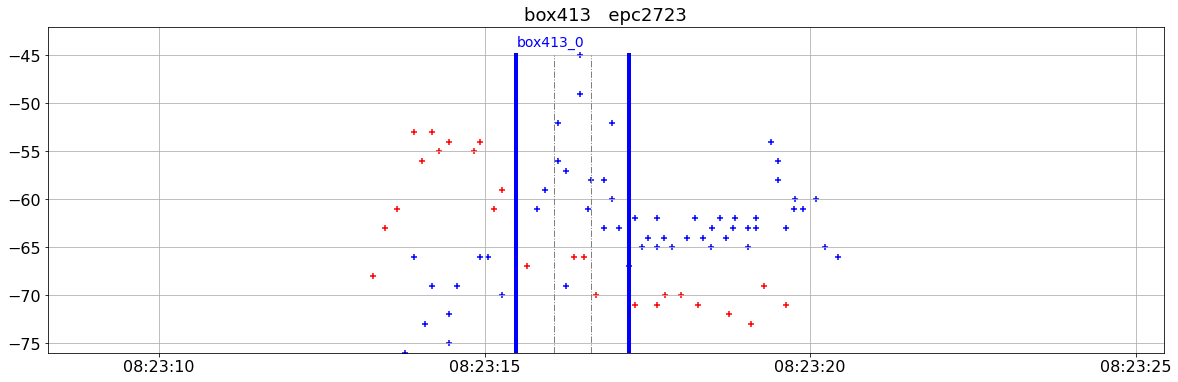

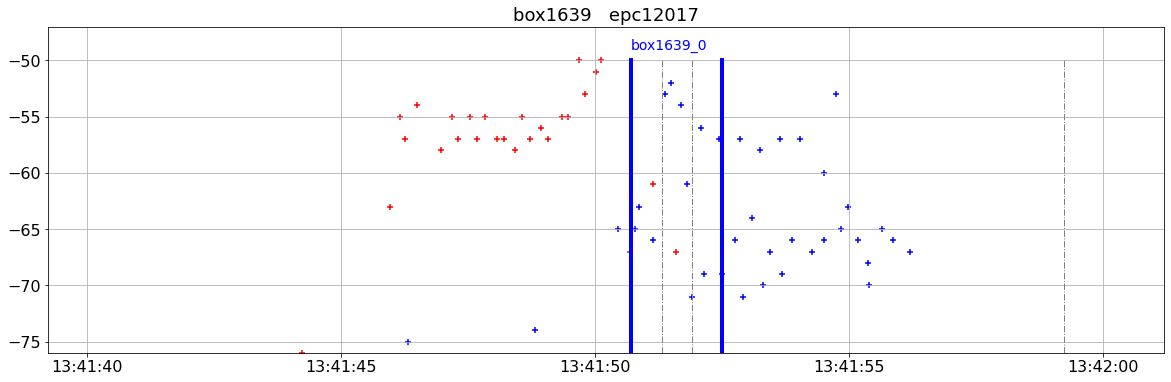

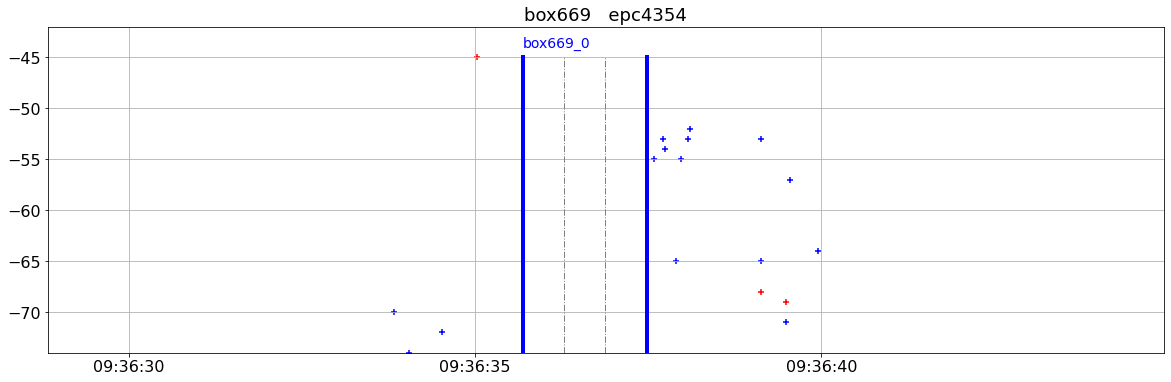

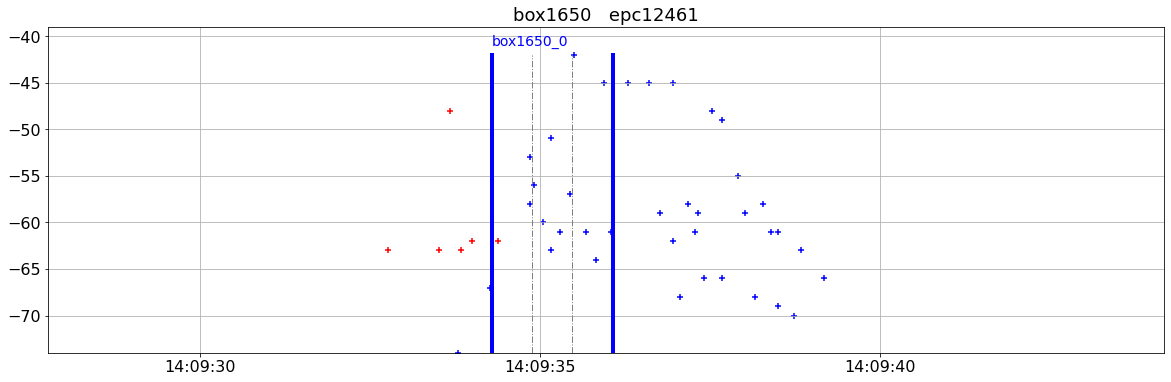

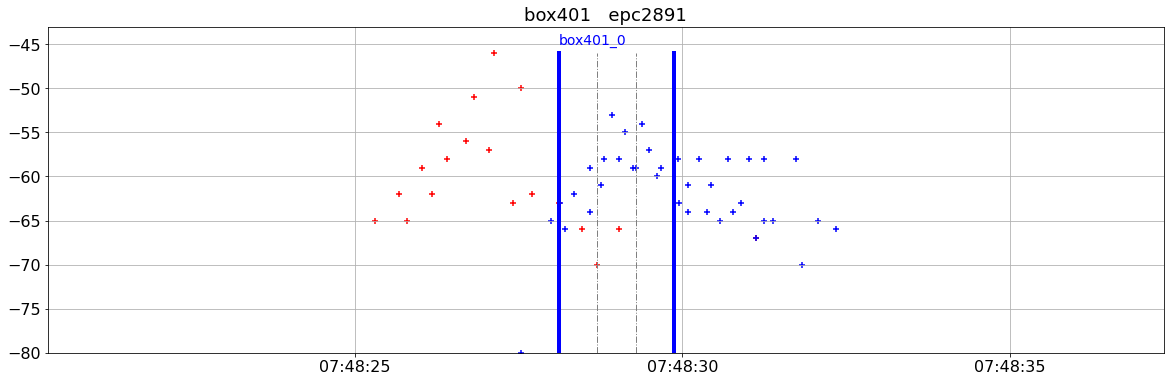

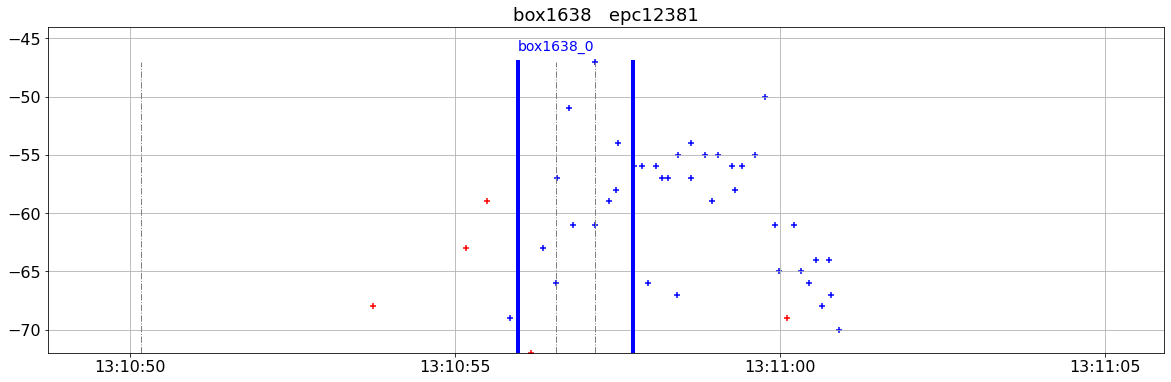

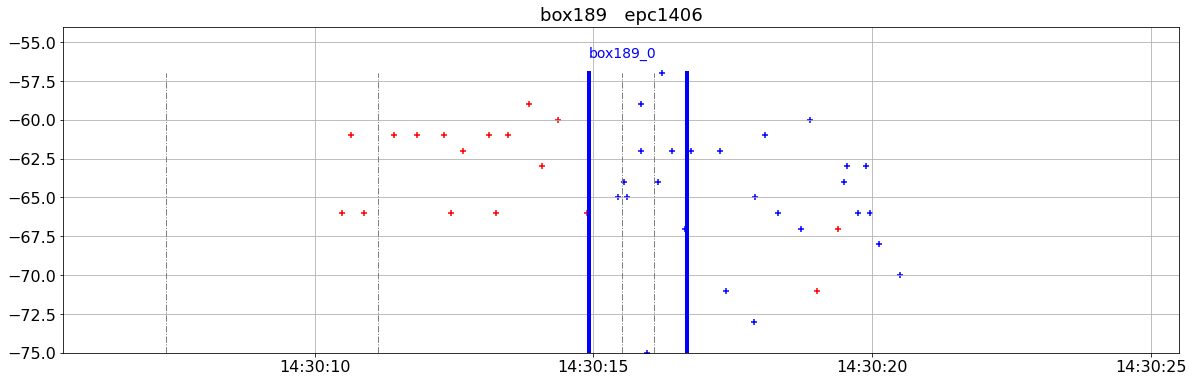

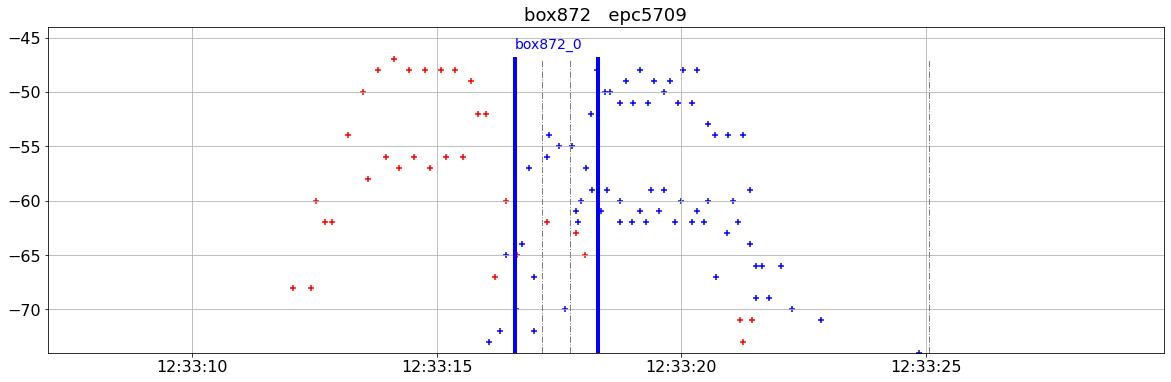

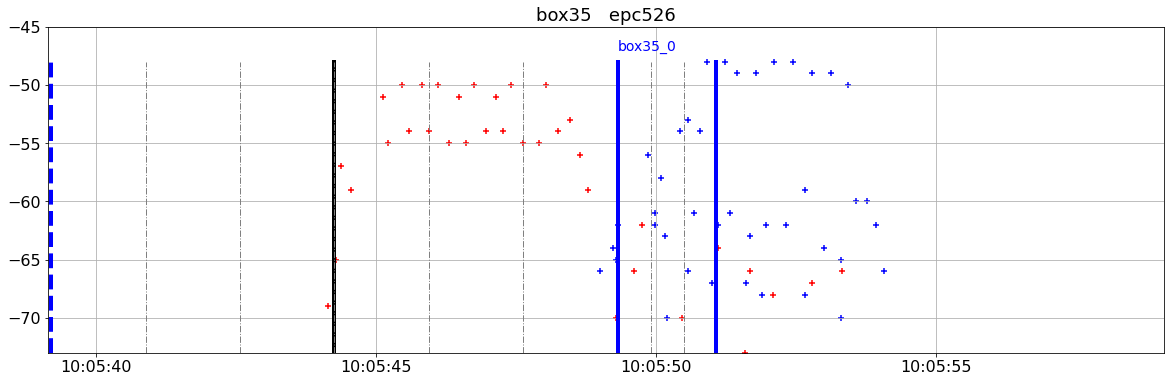

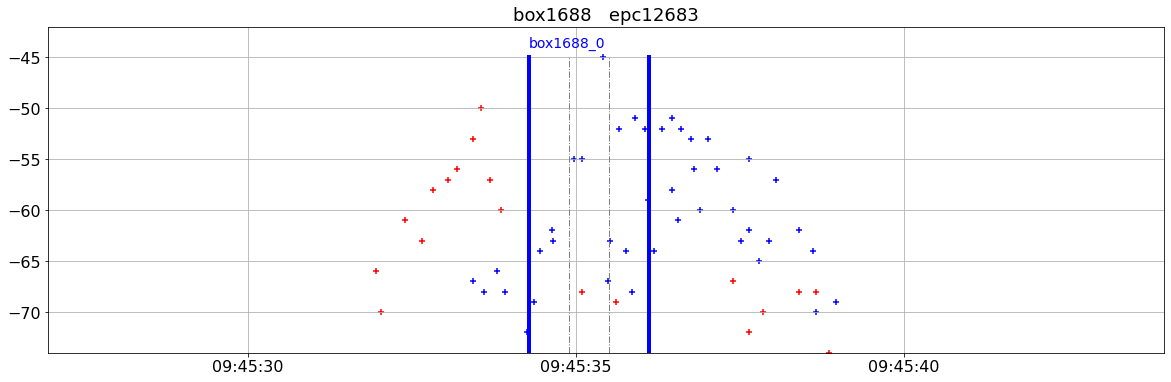

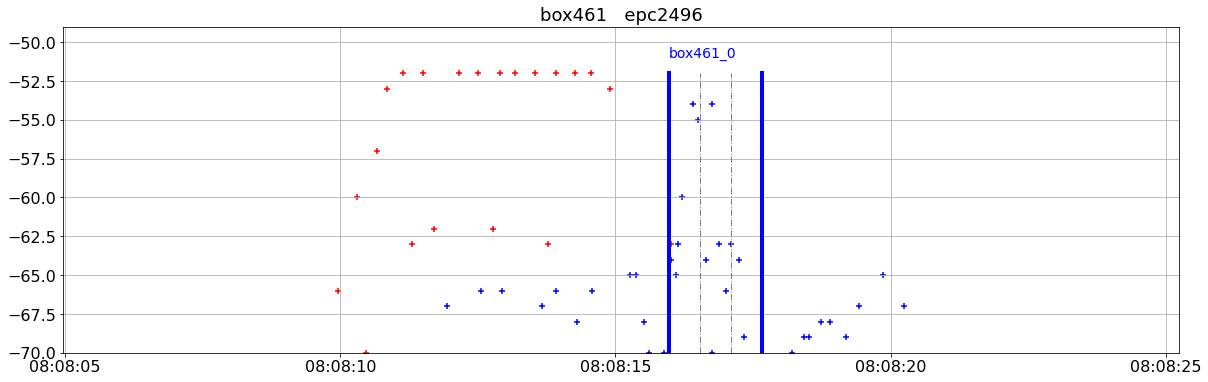

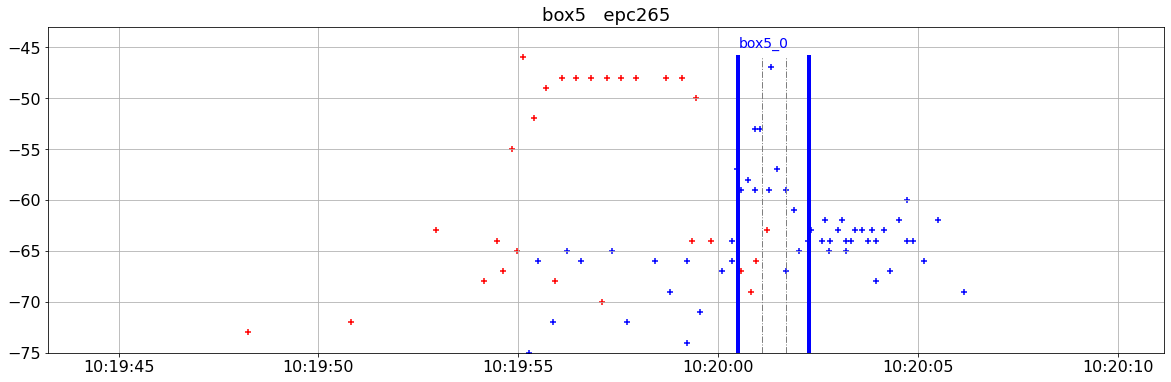

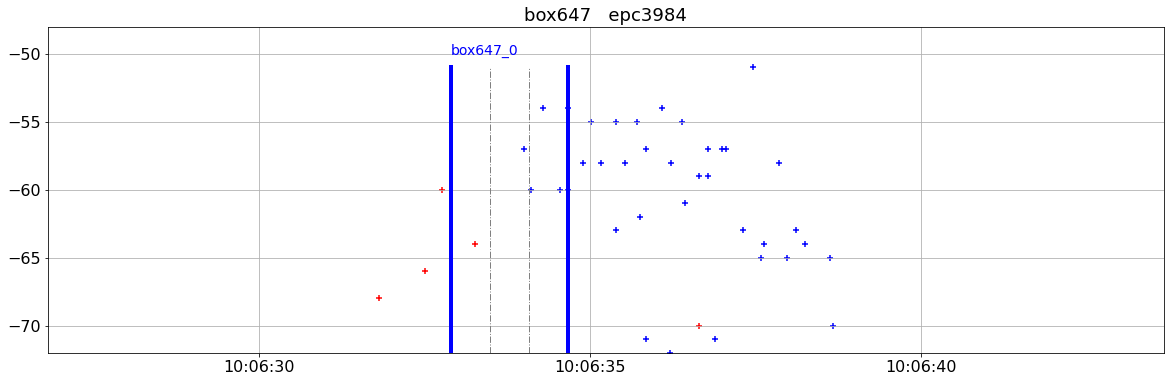

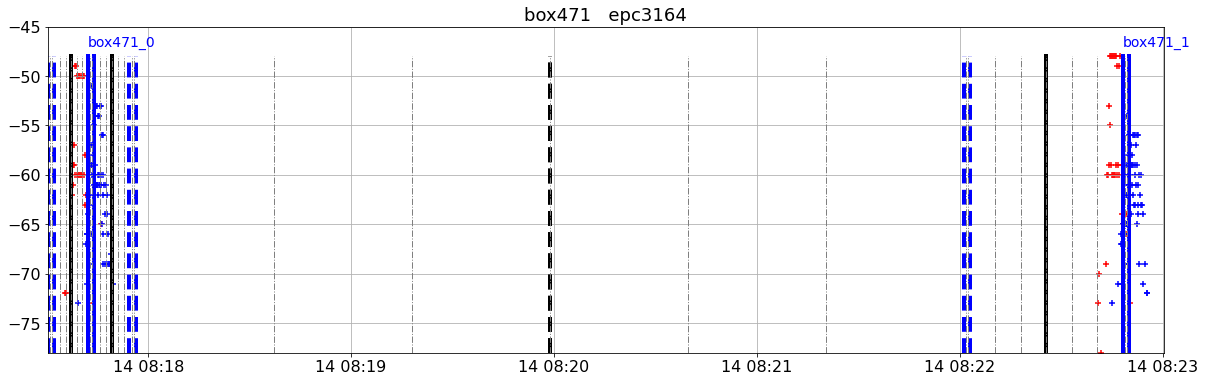

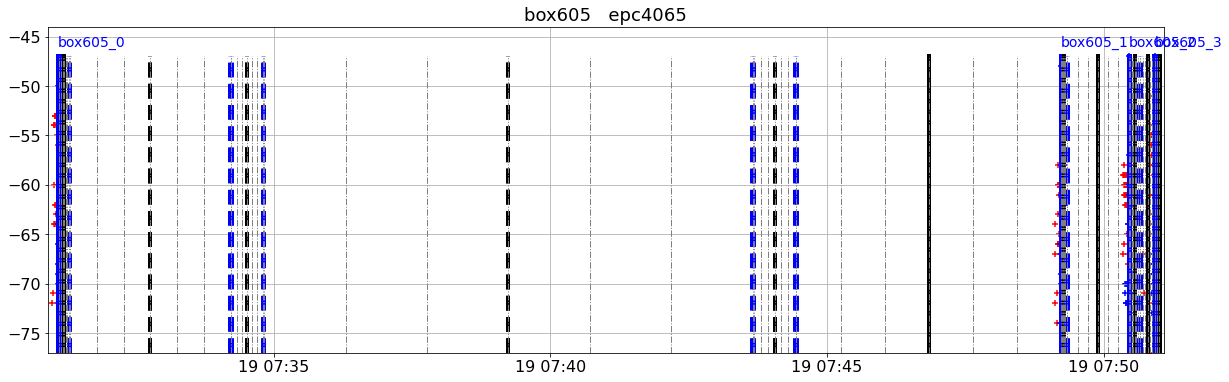

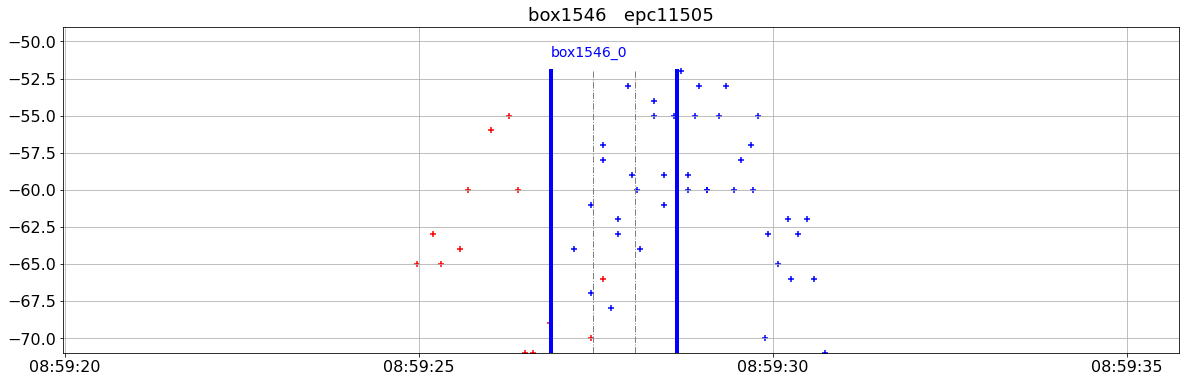

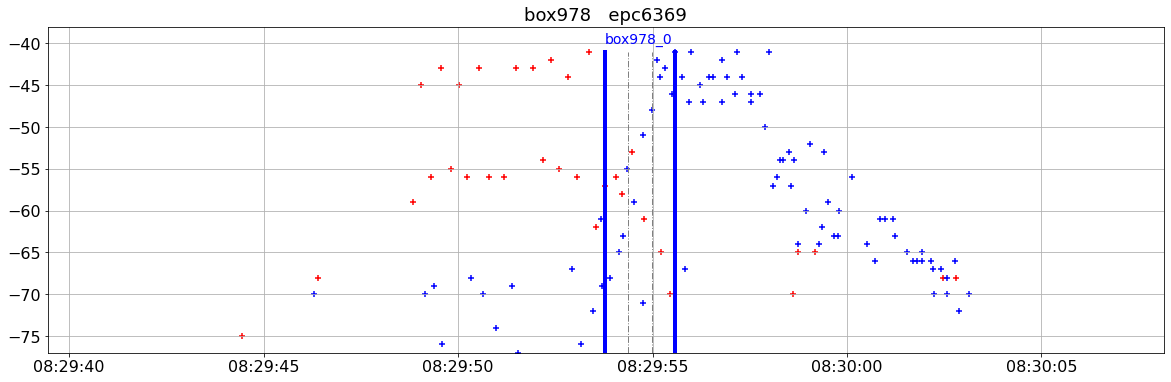

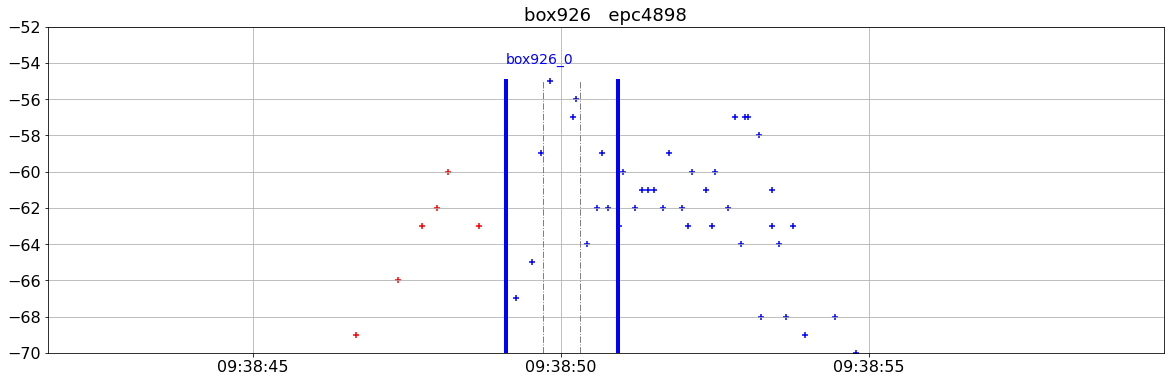

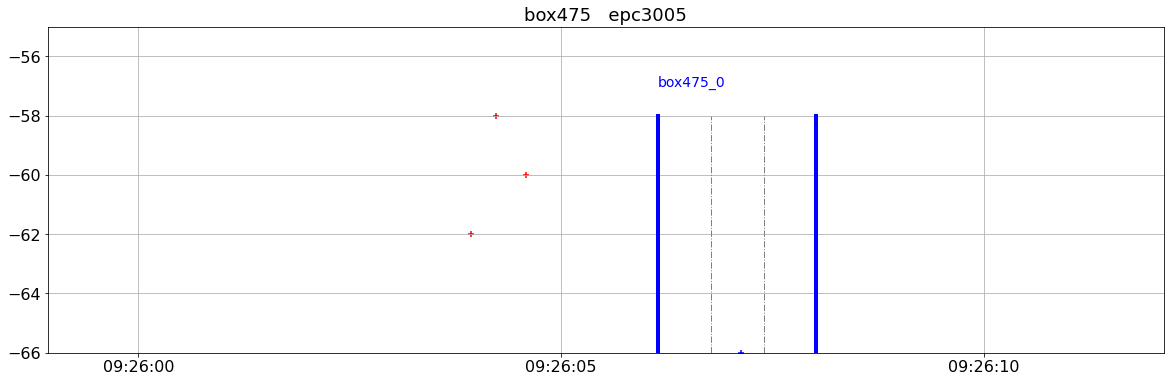

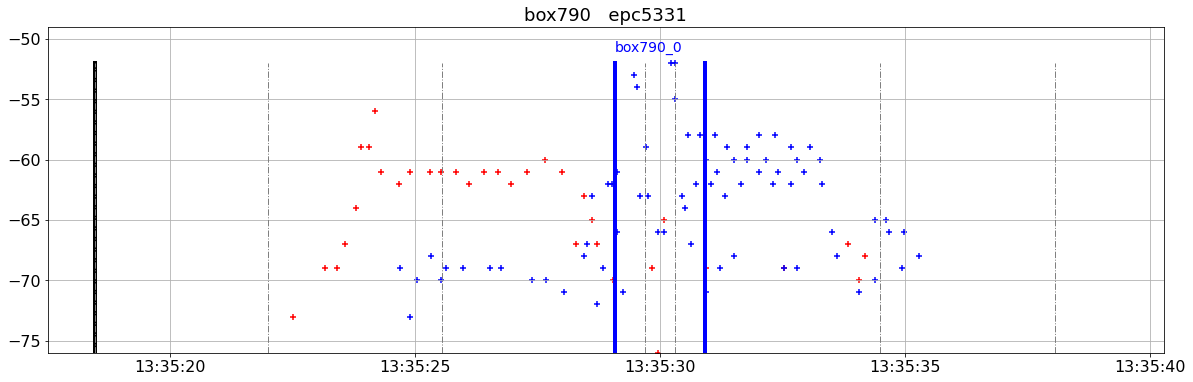

In [31]:
# 
# random Epc
# 
epc_bool=True
box_bool=False
window_bool=False
subslice_bool=False
windows_displayed=[]
subslices_displayed=[]

for i, row in tags_windows.drop_duplicates(['Epc']).sample(20).iterrows():
# tags
    Epc=row['Epc']
    window_run_id=row['window_run_id']
    tags_epc=tags_windows[tags_windows['Epc']==Epc]
    Tmin=tags_epc['LogTime'].min()
    Tmax=tags_epc['LogTime'].max()
    rssi_min=tags_epc['Rssi'].min()
    rssi_max=tags_epc['Rssi'].max()
# windows
    Startup_min=windows[windows['Startup']<Tmin]['Startup'].max()
    Stopdown_max=windows[windows['Stopdown']>Tmax]['Stopdown'].min()
    windows_epc=windows[(windows['Startup']>=Startup_min)&(windows['Stopdown']<=Stopdown_max)]
    windows_displayed=[]
# subslices
    subslices_epc=subslices[subslices['window_run_id'].isin(windows_epc['window_run_id'])]
# Tmin, Tmax
#     Tmin_displayed=pd.Series([Tmin, Startup_min]).min()
#     Tmax_displayed=pd.Series([Tmax, Stopdown_max]).max()
    Tmin_displayed=Tmin
    Tmax_displayed=Tmax
#     print(Tmin_displayed, Tmax_displayed)
 
    visu_new(tags_epc, Tmin_displayed, Tmax_displayed, rssi_min, rssi_max, windows_epc, windows_displayed, subslices_epc, \
             epc_bool, box_bool, window_bool)

In [32]:
# 
# Epc detected in several windows
# 

In [33]:
# restriction to boxes with 1 run only
box_1run=windows[windows['runs']==1]['window_id'].unique()
box_1run_windows=tags_windows[tags_windows['box'].isin(box_1run)].groupby('box')['window_run_id'].nunique()\
        .rename('windows').reset_index(drop=False).sort_values('windows', ascending=False)
box_1run_windows[box_1run_windows['windows']==5]
# 
Epc_1run_windows = tags_windows [tags_windows['box'].isin(box_1run)]\
                    .groupby('Epc')['window_run_id'].nunique()\
                    .rename('windows').reset_index(drop=False).sort_values('windows', ascending=False)
Epc_1run_windows.head()

Epc  windows
2198  epc12000        5
5960   epc3728        4
9226    epc681        4
7344   epc5055        3
5532   epc3335        3

In [34]:
# tags detected in more than 1 window
Epc_1run_windows [Epc_1run_windows['windows']>=2] ['Epc'].nunique()

1312

epc12000 5
2020-06-12 08:13:42.372000 2020-06-12 08:28:53.189000


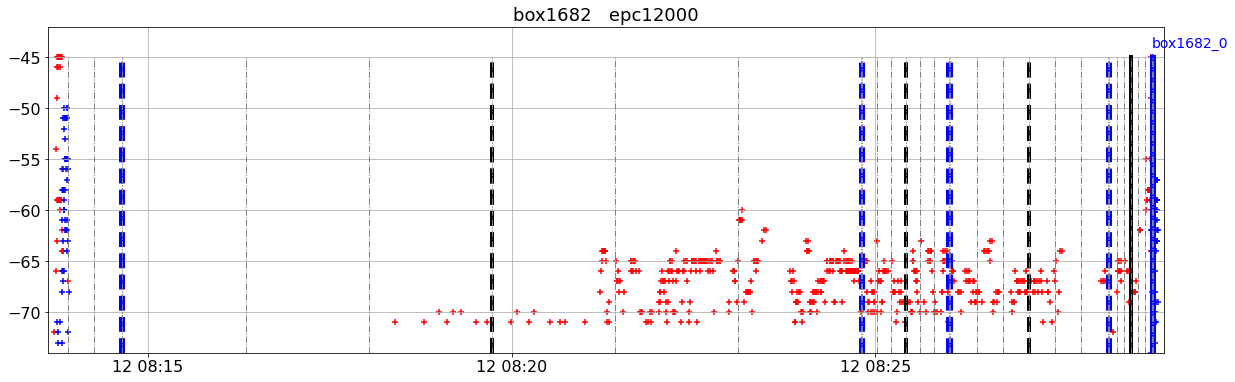

epc3728 4
2020-05-15 07:07:13.589000 2020-05-15 07:22:24.706000


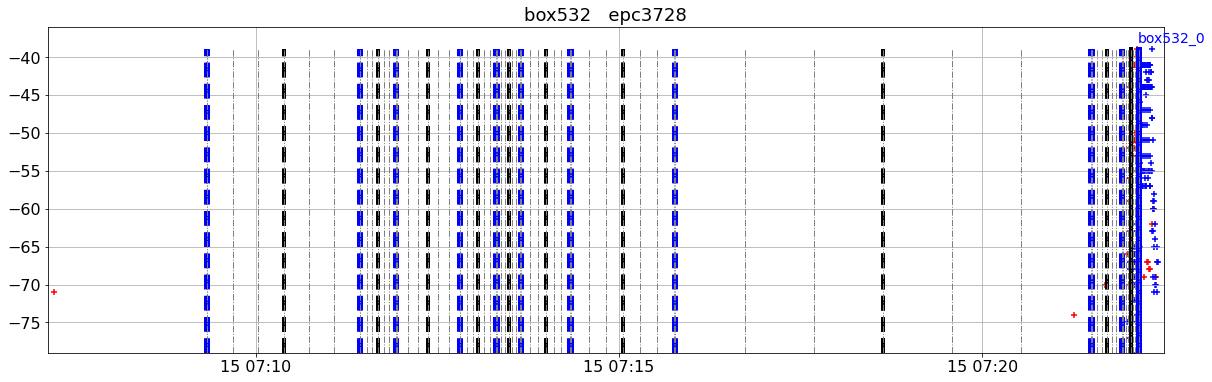

epc681 4
2020-05-04 12:45:04.051000 2020-05-04 12:48:44.315000


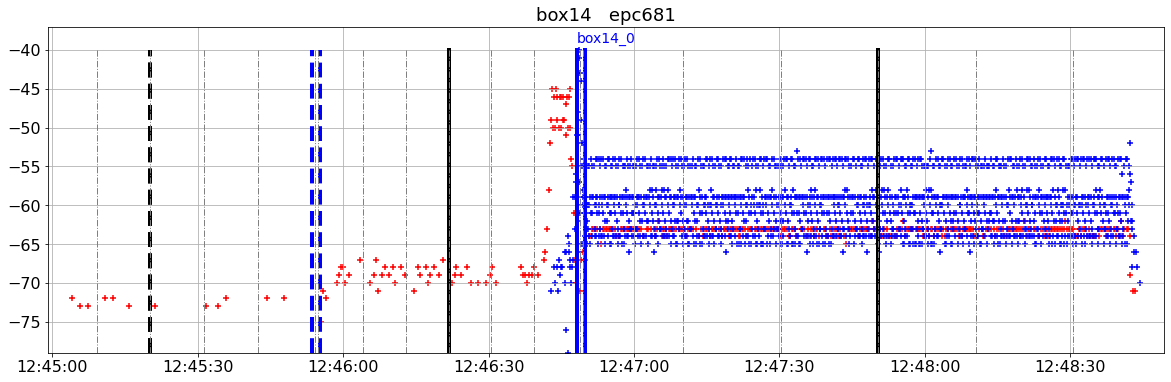

epc5055 3
2020-05-27 14:50:54.357000 2020-05-27 14:51:07.136000


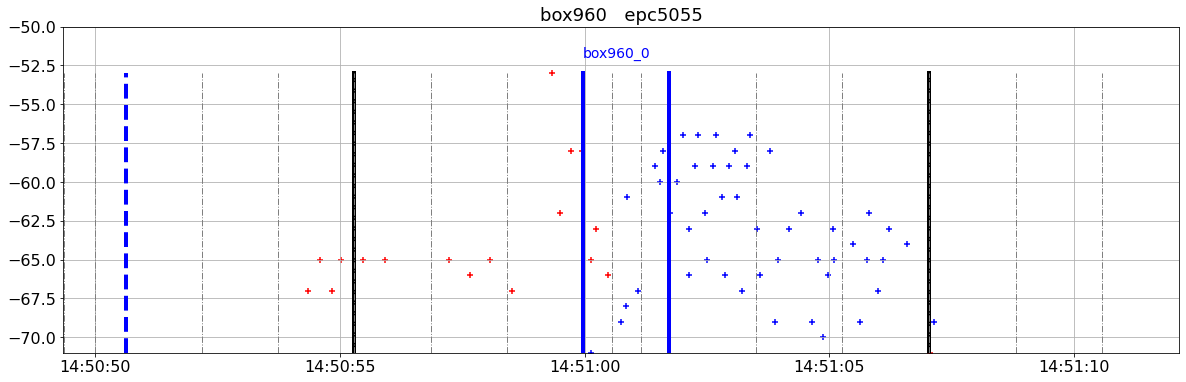

epc3335 3
2020-05-14 10:58:36.973000 2020-05-14 11:04:32.980000


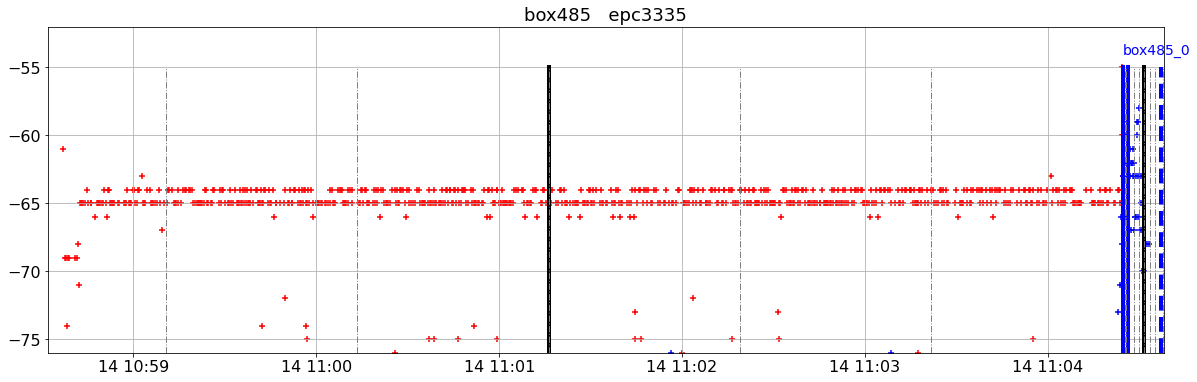

epc12371 3
2020-06-11 14:04:25.252000 2020-06-11 14:05:01.653000


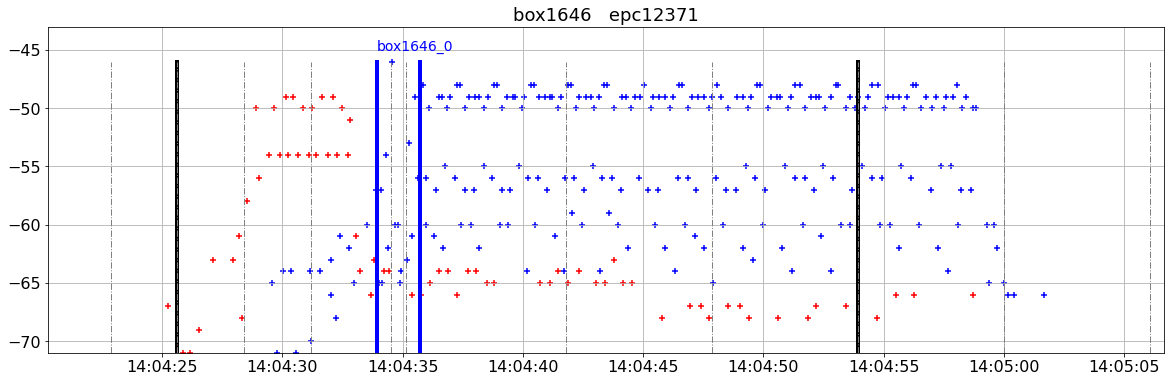

epc12367 3
2020-06-11 14:04:23.412000 2020-06-11 14:05:02.152000


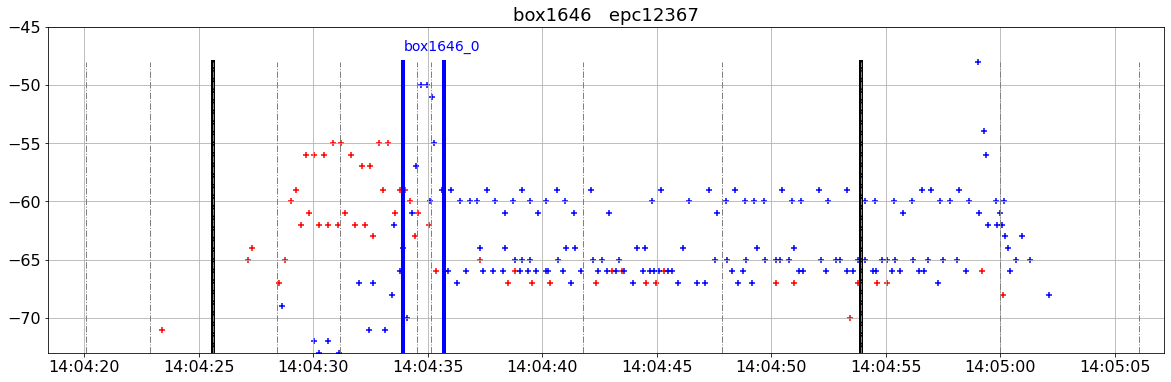

epc12366 3
2020-06-11 14:04:23.734000 2020-06-11 14:05:02.873000


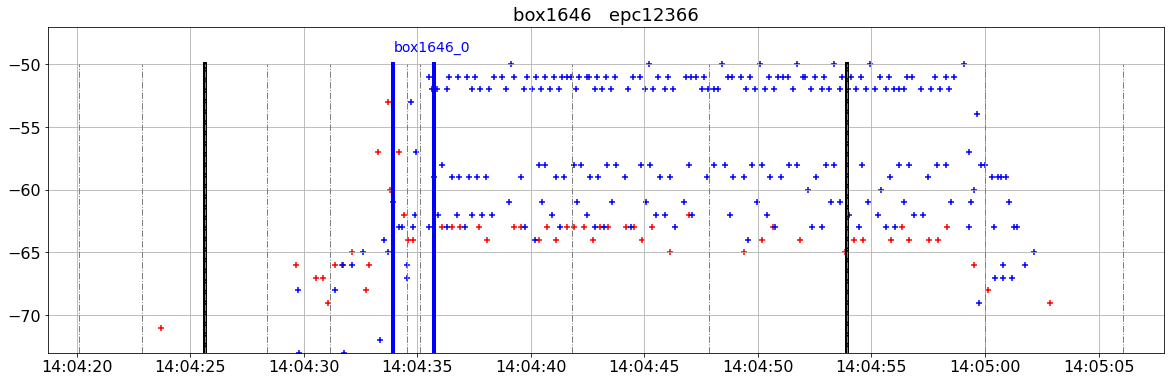

epc10903 3
2020-06-09 11:55:07.802000 2020-06-09 11:55:33.403000


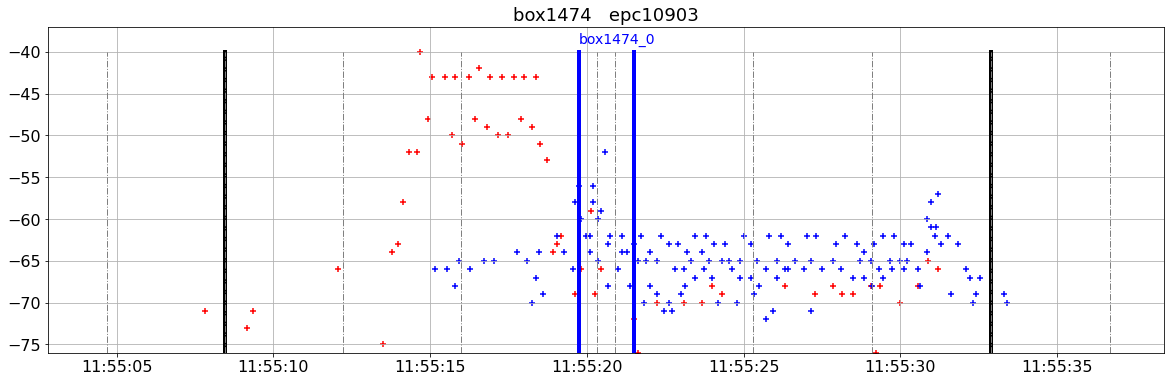

epc10904 3
2020-06-09 11:55:05.142000 2020-06-09 11:55:33.444000


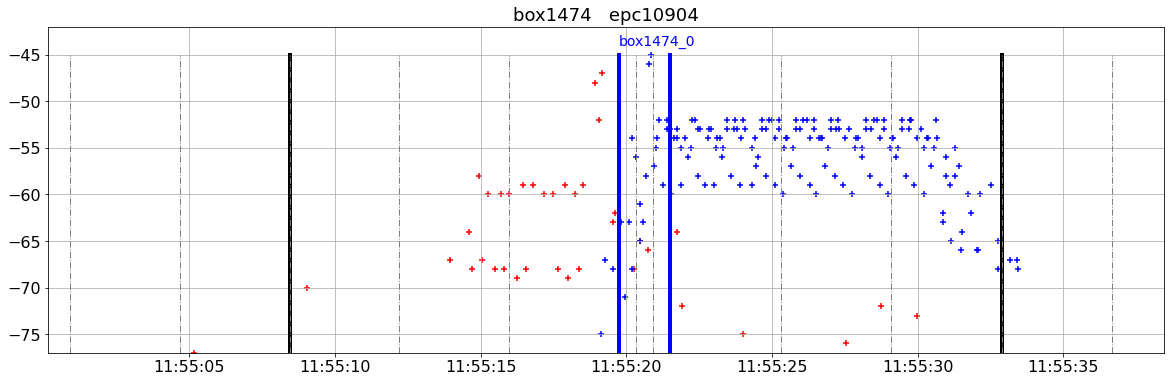

epc10905 3
2020-06-09 11:55:05.142000 2020-06-09 11:55:33.103000


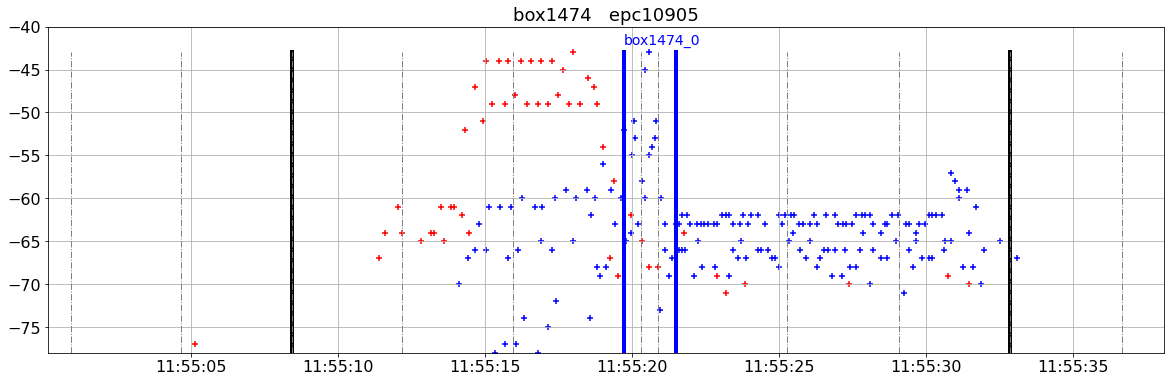

epc12364 3
2020-06-11 14:04:24.971000 2020-06-11 14:05:00.692000


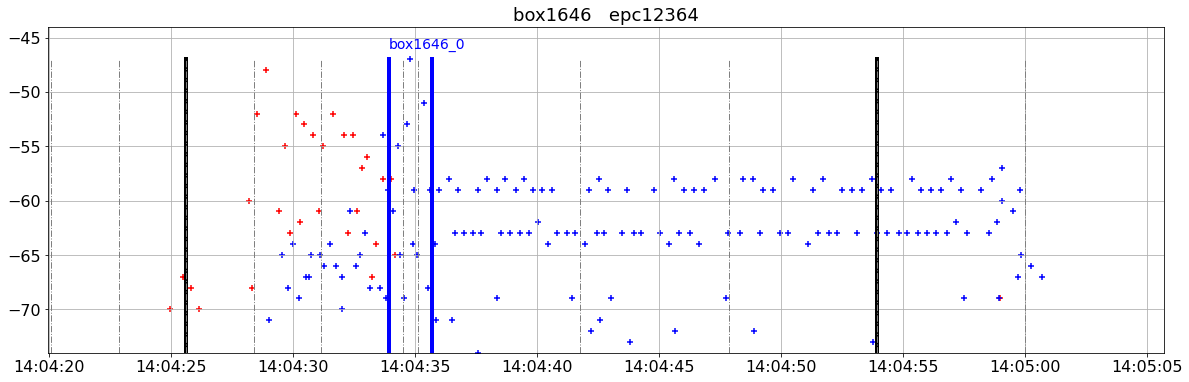

epc12363 3
2020-06-11 14:04:23.073000 2020-06-11 14:05:02.873000


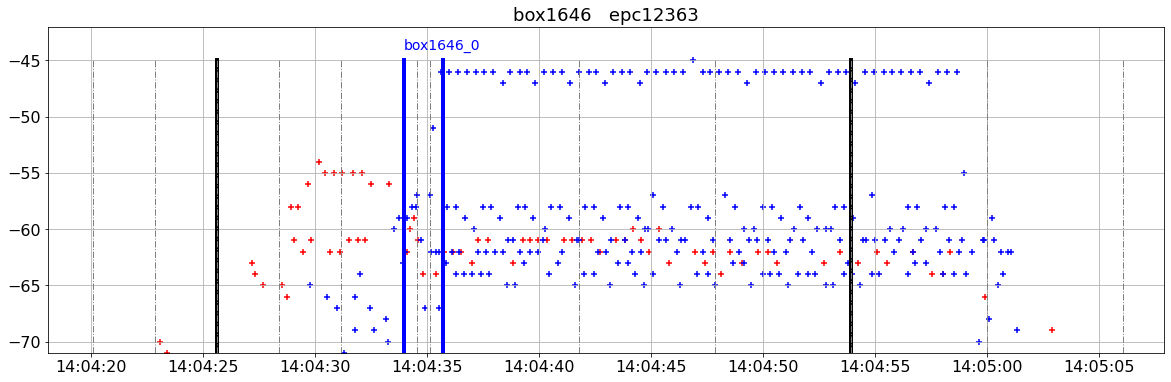

epc12772 3
2020-06-12 13:30:21.010000 2020-06-12 13:30:32.889000


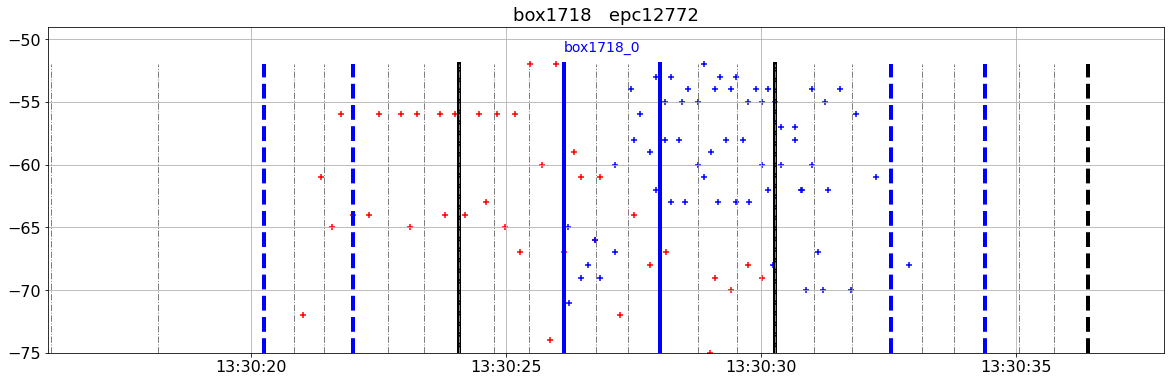

epc3329 3
2020-05-14 10:58:42.094000 2020-05-14 11:04:33.380000


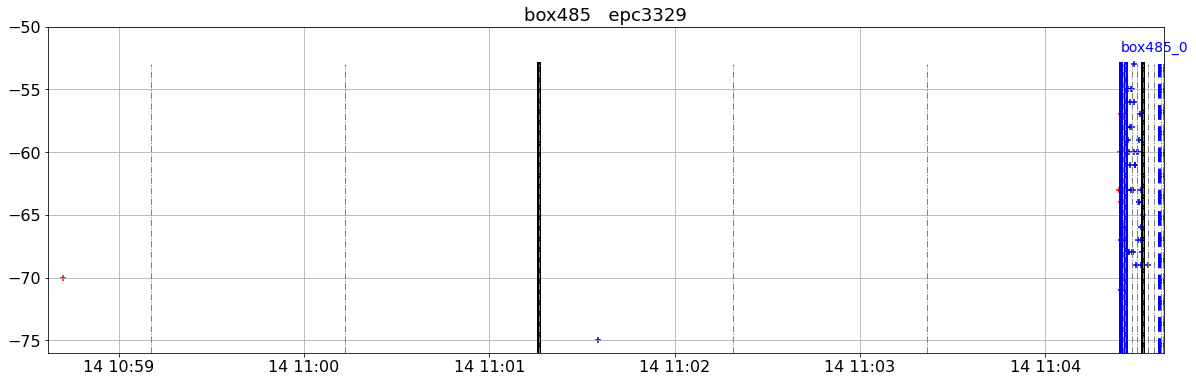

epc12771 3
2020-06-12 13:30:18.090000 2020-06-12 13:30:31.550000


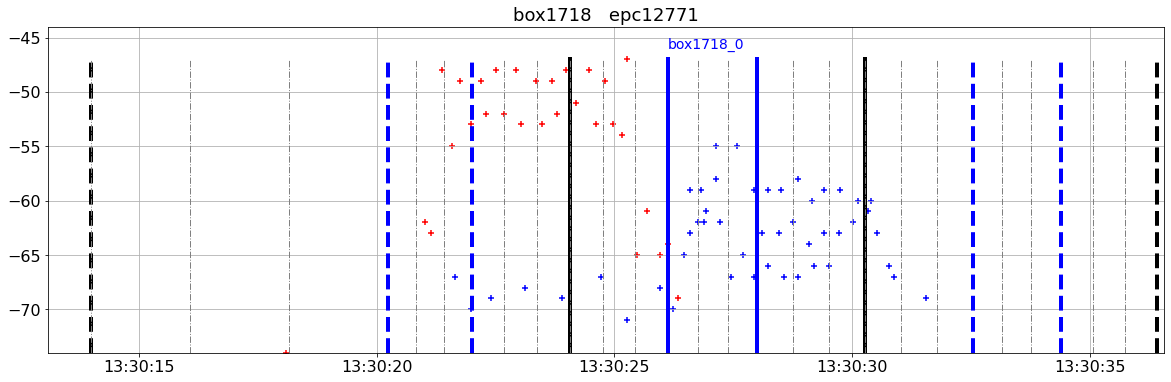

epc12770 3
2020-06-12 13:30:21.890000 2020-06-12 13:30:31.749000


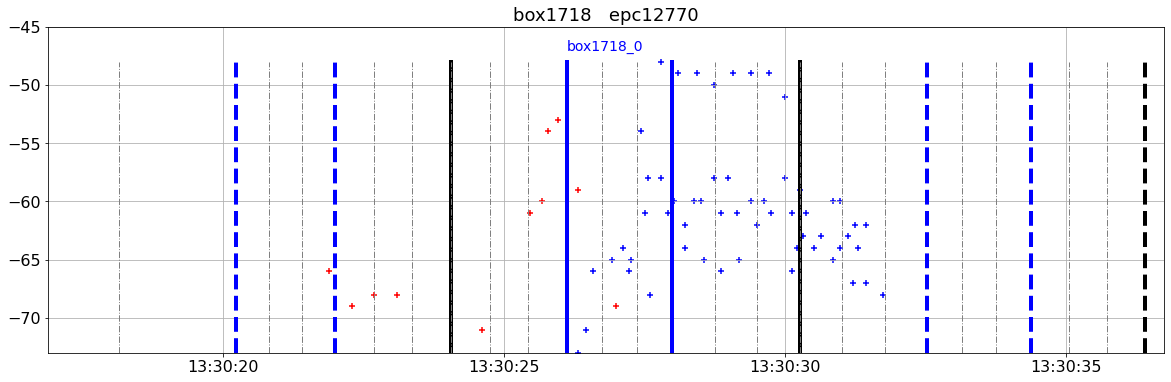

epc12769 3
2020-06-12 13:30:19.510000 2020-06-12 13:30:34.190000


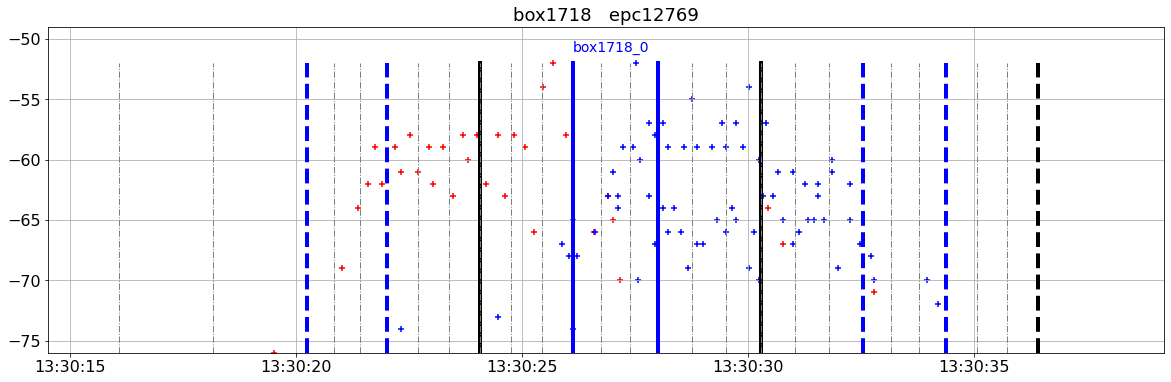

epc12768 3
2020-06-12 13:30:15.409000 2020-06-12 13:30:32.249000


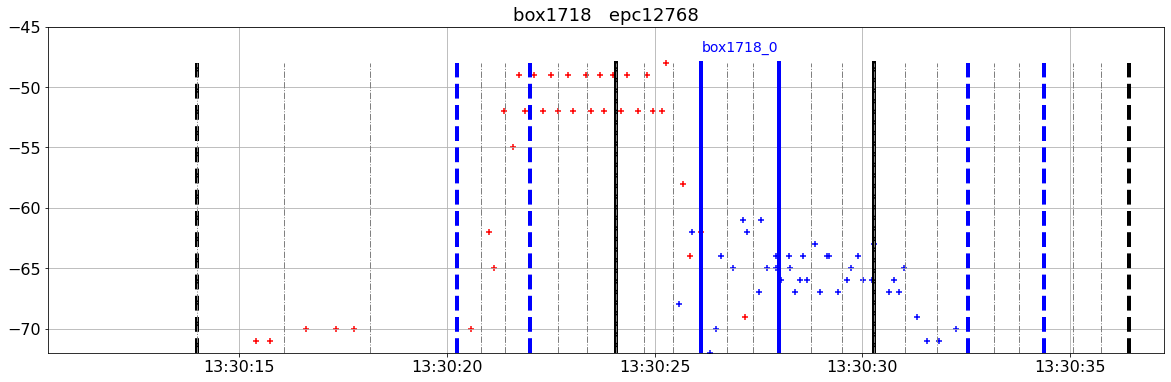

epc12767 3
2020-06-12 13:30:21.890000 2020-06-12 13:30:31.129000


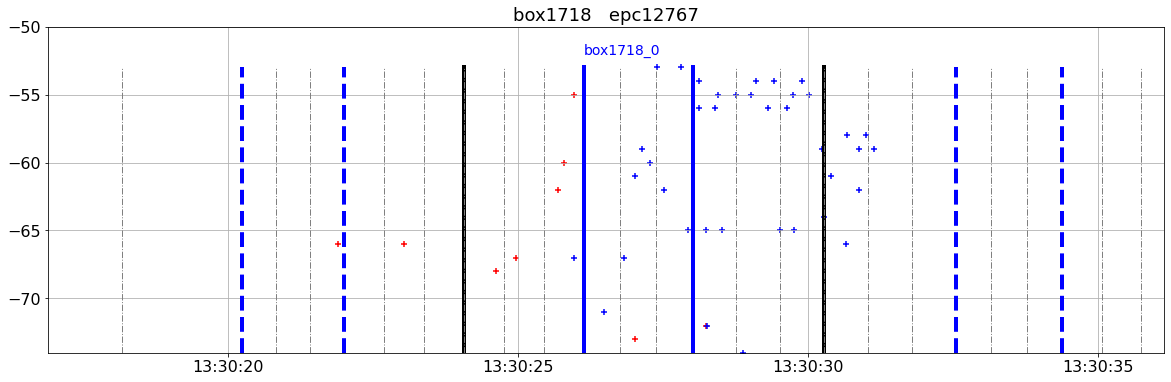

epc11567 3
2020-06-10 12:23:01.206000 2020-06-10 12:23:09.827000


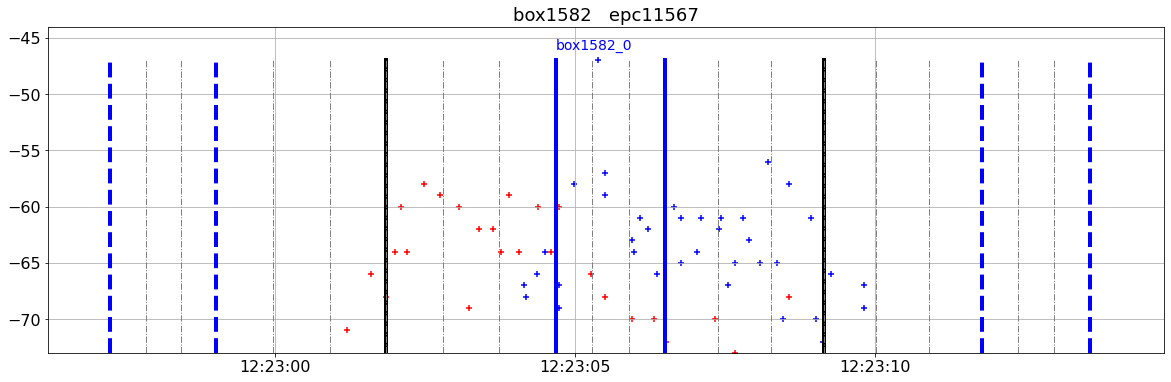

epc69 3
2020-05-04 12:44:51.650000 2020-05-04 12:46:42.873000


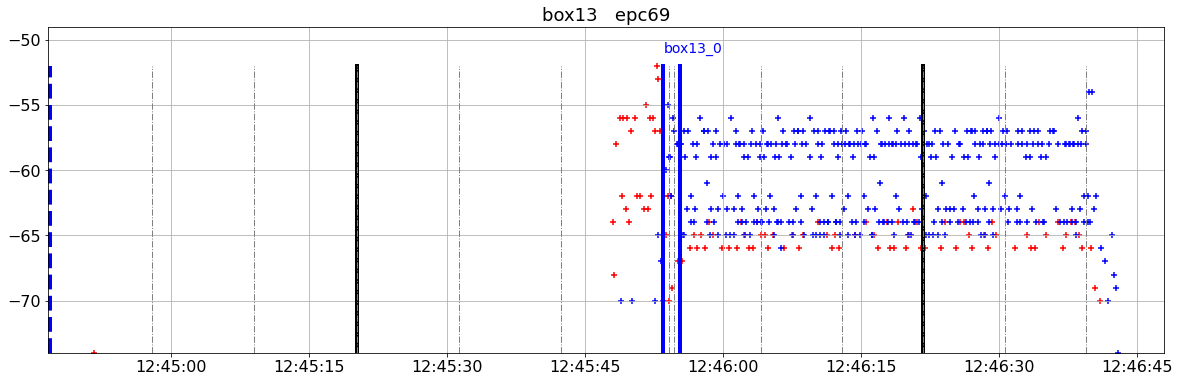

epc11568 3
2020-06-10 12:23:01.846000 2020-06-10 12:23:09.827000


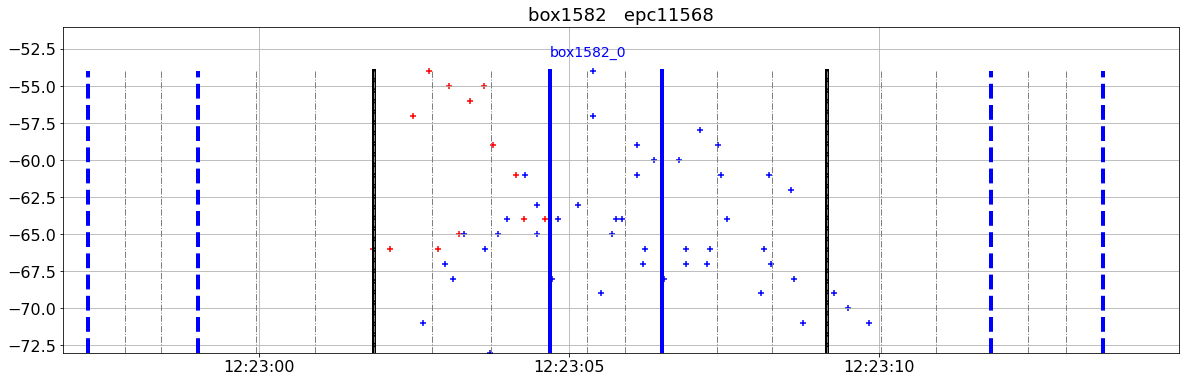

epc11570 3
2020-06-10 12:23:01.605000 2020-06-10 12:23:10.066000


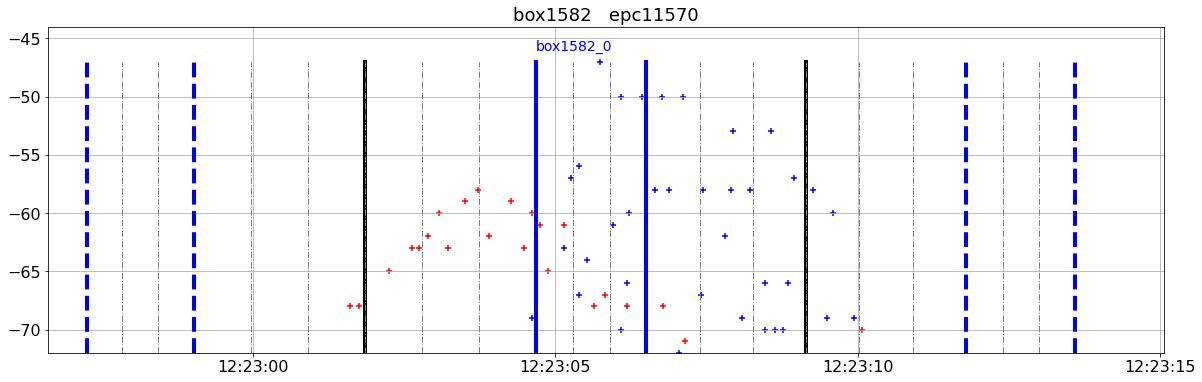

epc11571 3
2020-06-10 12:23:01.846000 2020-06-10 12:23:09.486000


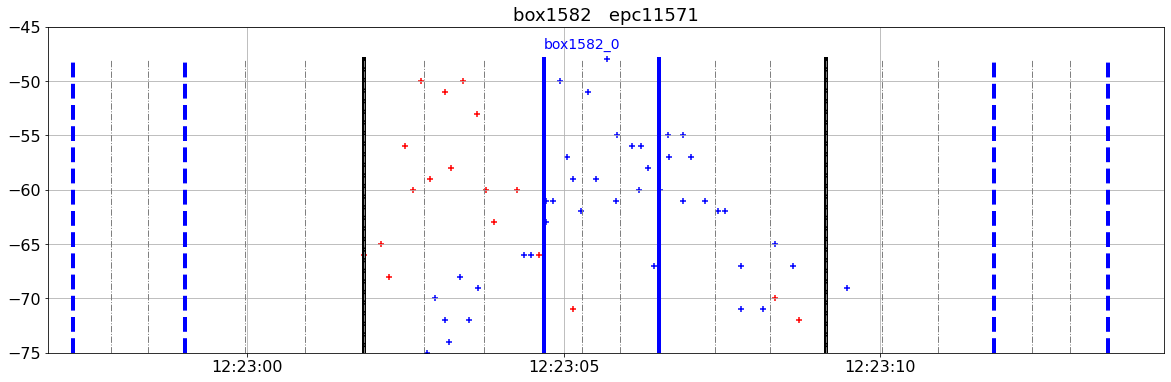

epc12601 3
2020-06-12 13:30:11.529000 2020-06-12 13:30:26.590000


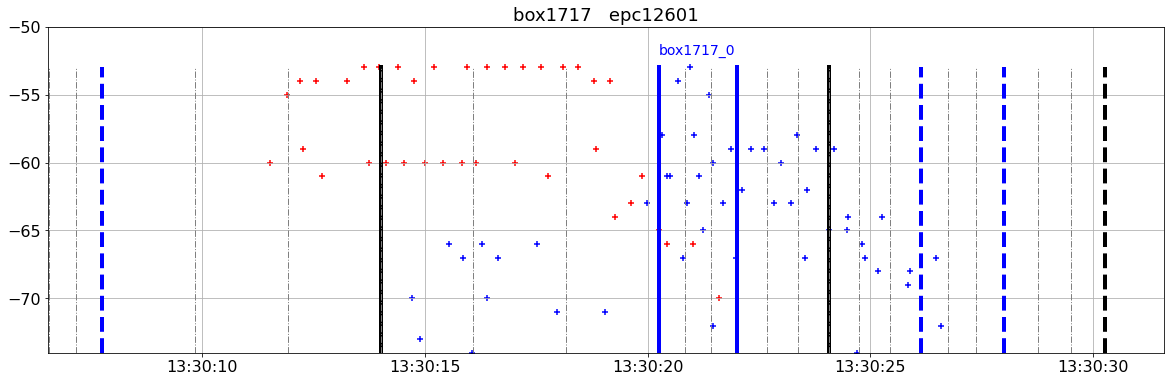

epc4274 3
2020-05-19 08:46:44.014000 2020-05-19 08:47:01.975000


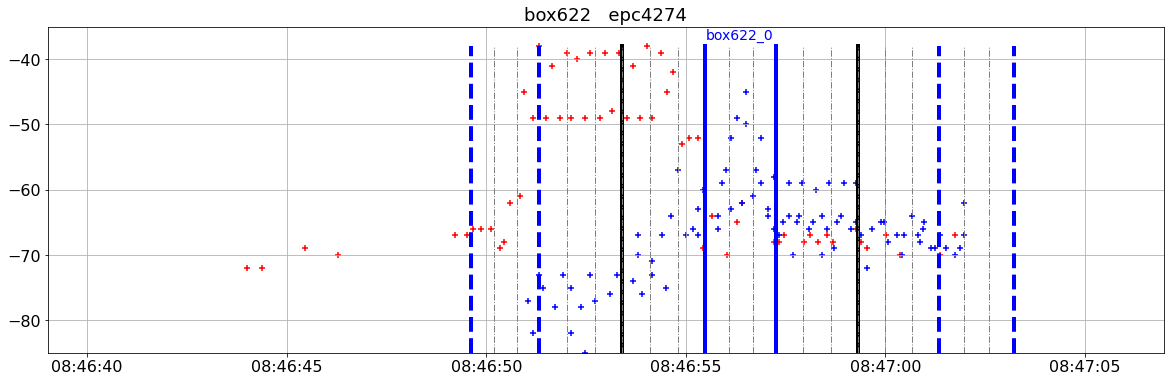

epc3328 3
2020-05-14 10:58:34.053000 2020-05-14 11:04:32.180000


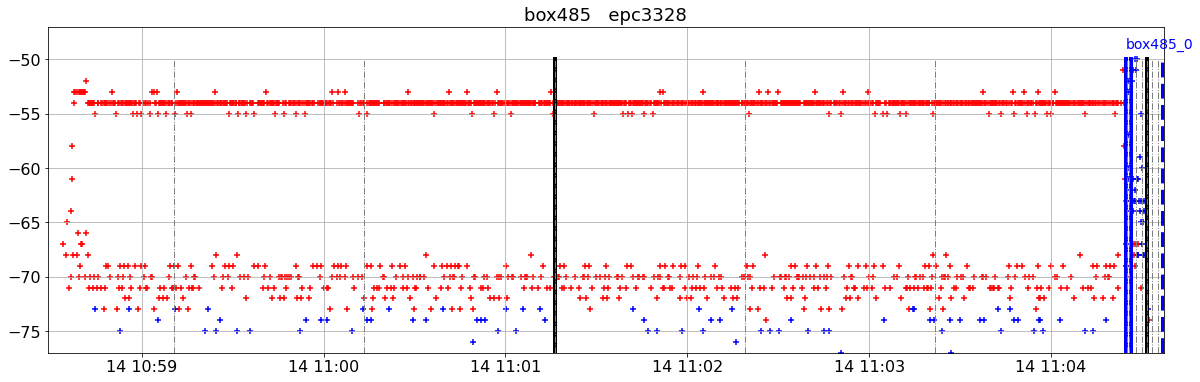

epc12603 3
2020-06-12 13:30:06.130000 2020-06-12 13:30:24.810000


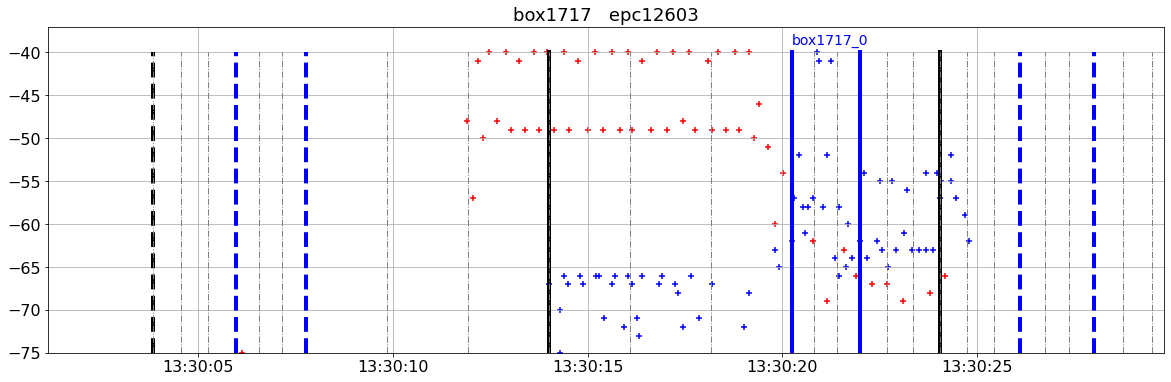

epc6723 3
2020-05-28 13:35:10.752000 2020-05-28 13:35:38.772000


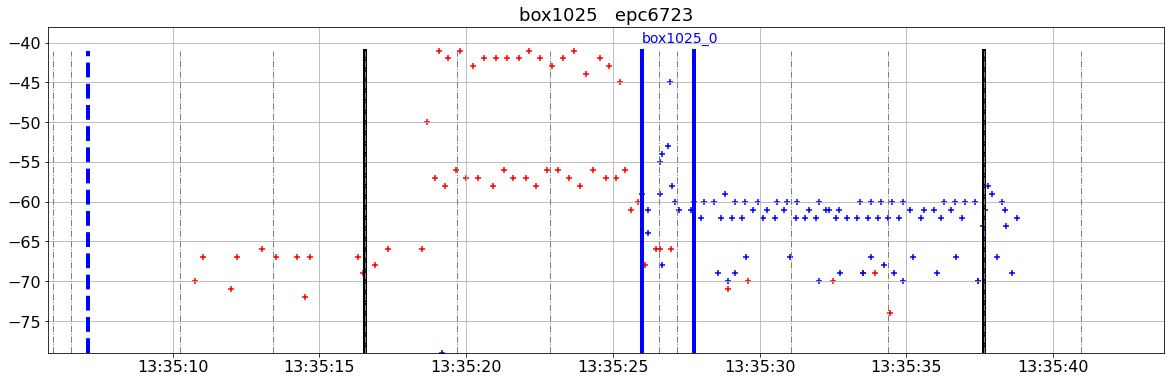

epc67 3
2020-05-04 12:45:00.671000 2020-05-04 12:46:44.873000


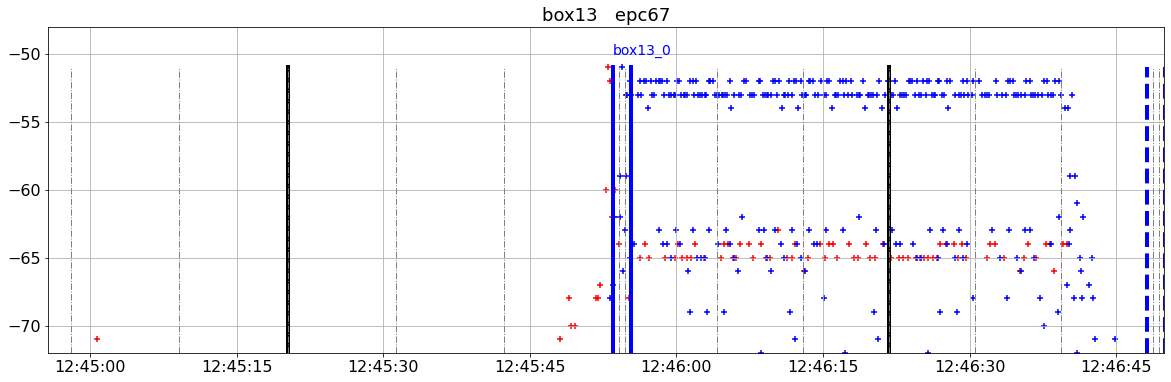

epc11782 3
2020-06-11 07:12:49.407000 2020-06-11 07:13:36.889000


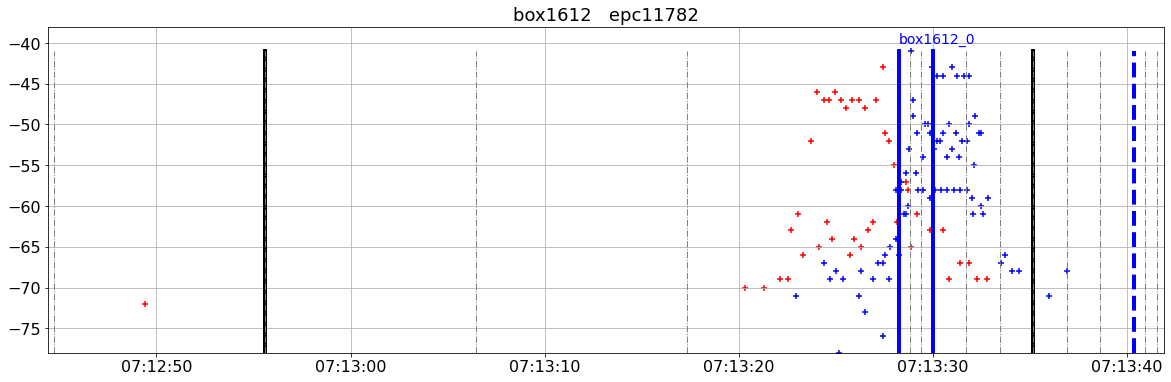

epc4589 3
2020-05-21 13:12:10.140000 2020-05-21 13:12:27.580000


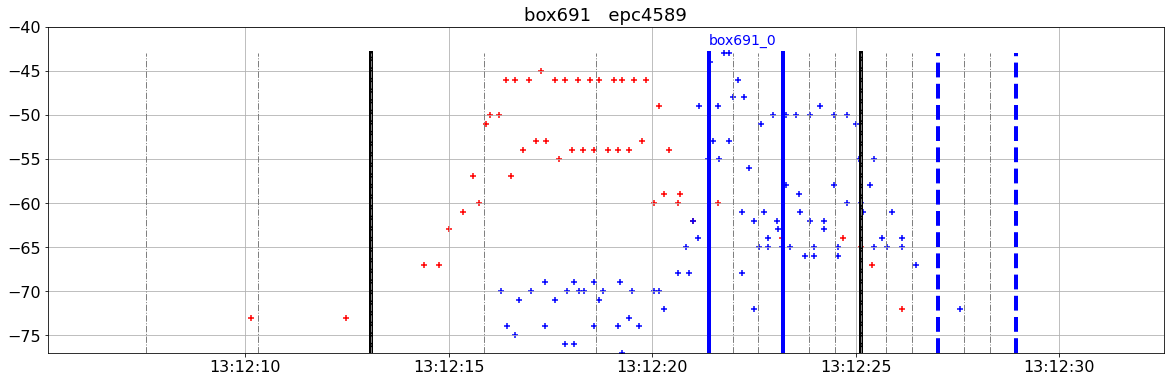

epc9198 3
2020-06-05 08:31:06.004000 2020-06-05 08:31:19.624000


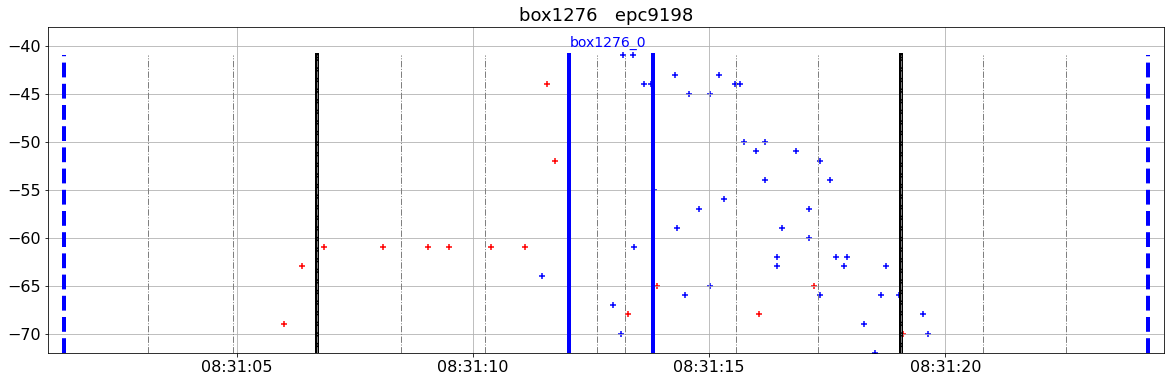

epc9197 3
2020-06-05 08:29:54.542000 2020-06-05 08:31:19.944000


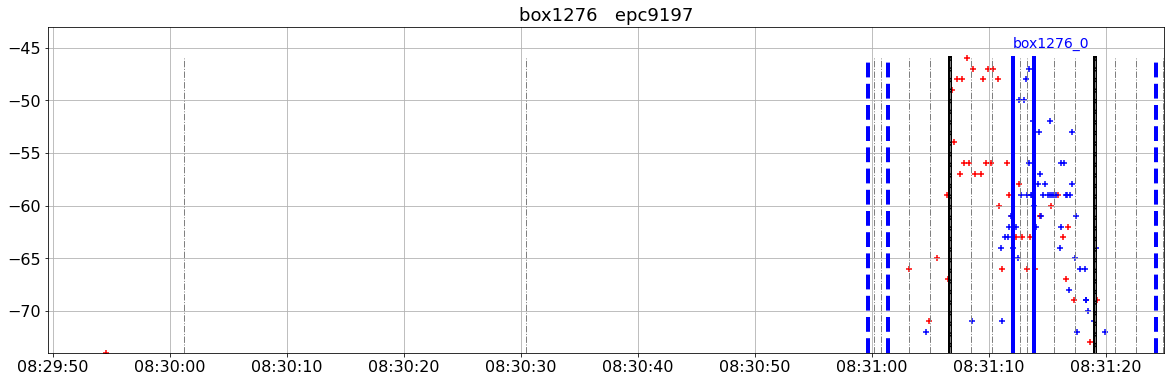

epc5518 3
2020-05-26 07:24:18.717000 2020-05-26 07:24:34.238000


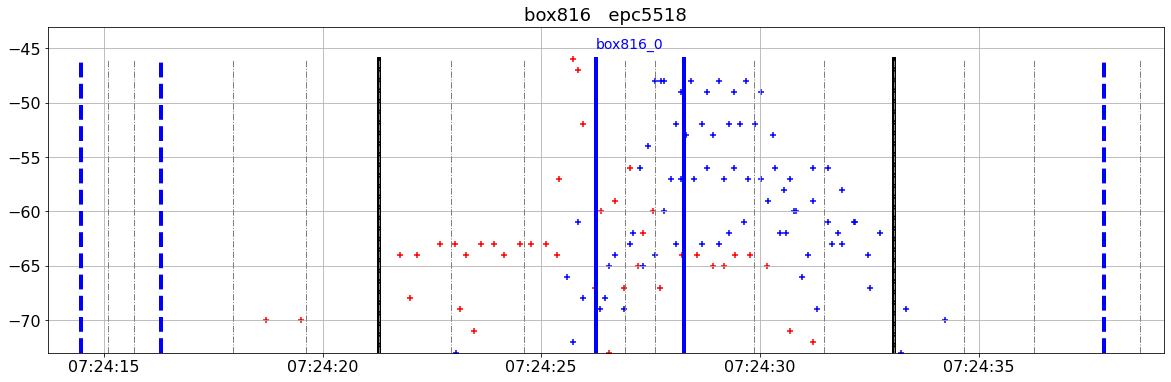

epc6720 3
2020-05-28 13:35:10.032000 2020-05-28 13:35:39.853000


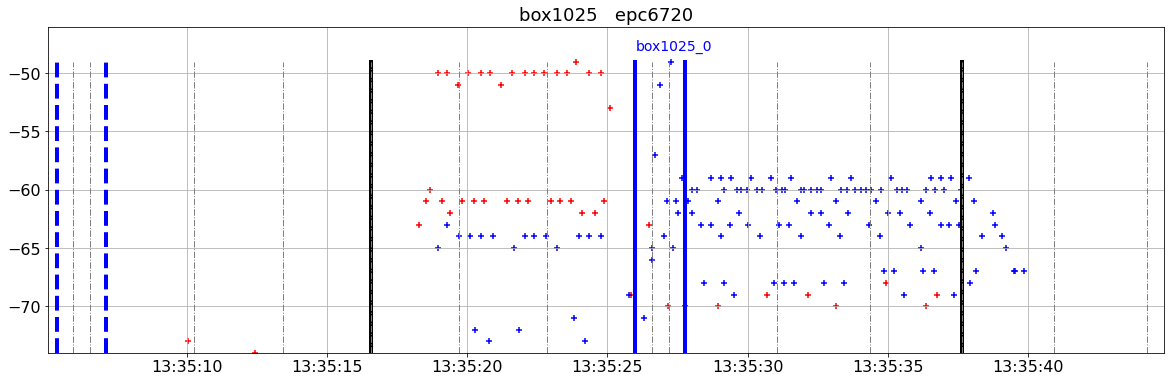

epc5516 3
2020-05-26 07:24:20.577000 2020-05-26 07:24:34.477000


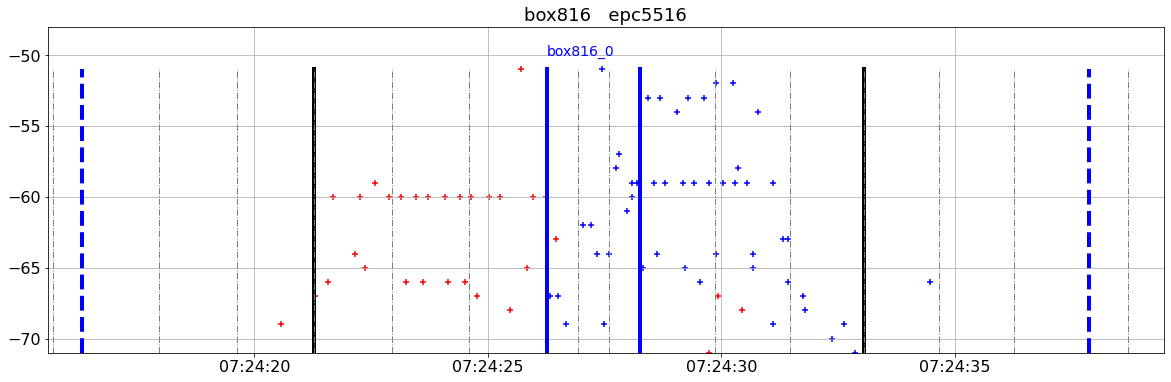

epc3299 3
2020-05-14 07:33:05.022000 2020-05-14 08:00:18.053000


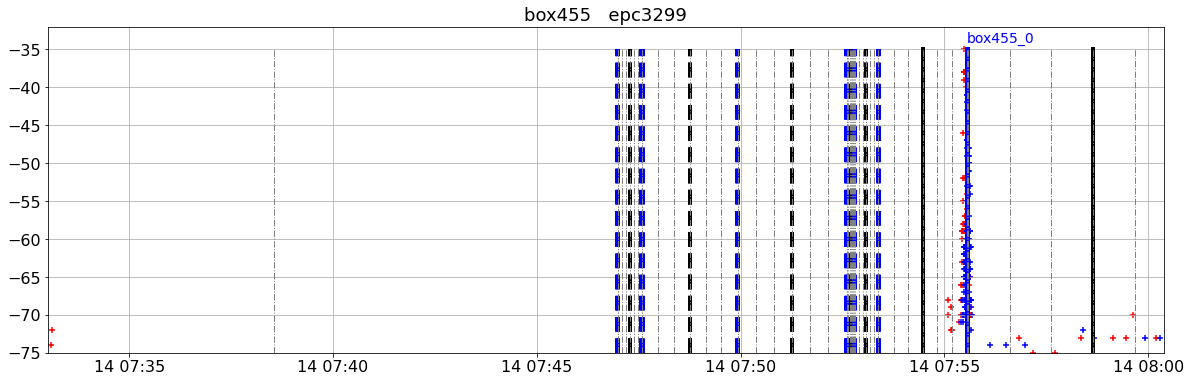

epc6722 3
2020-05-28 13:35:10.032000 2020-05-28 13:35:38.772000


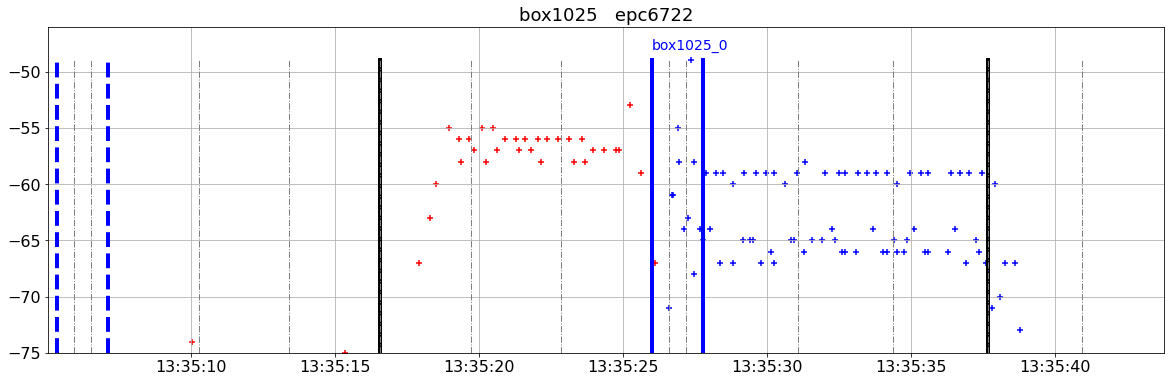

epc9194 3
2020-06-05 08:31:04.024000 2020-06-05 08:31:19.264000


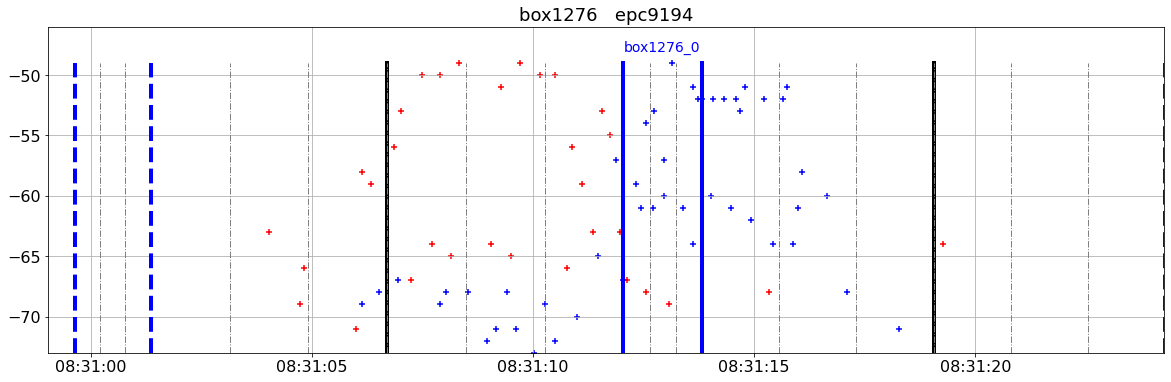

epc3327 3
2020-05-14 10:58:31.273000 2020-05-14 11:04:33.380000


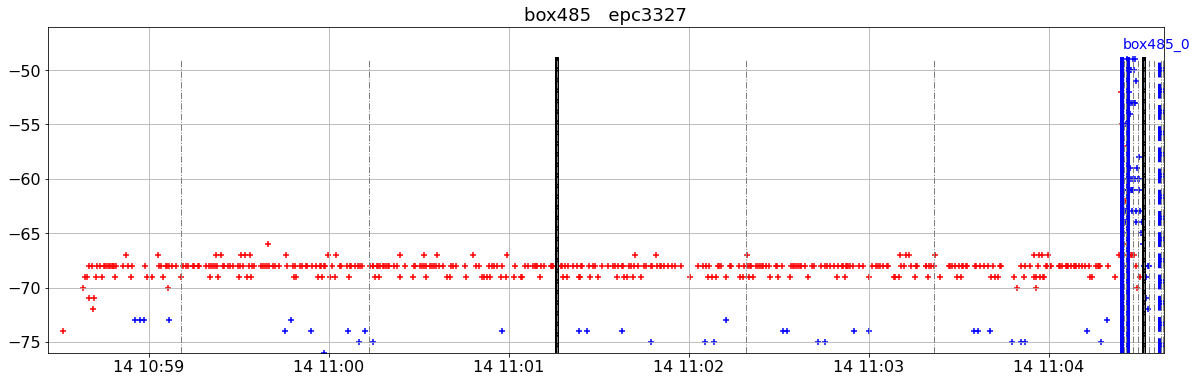

epc9193 3
2020-06-05 08:31:06.004000 2020-06-05 08:31:20.464000


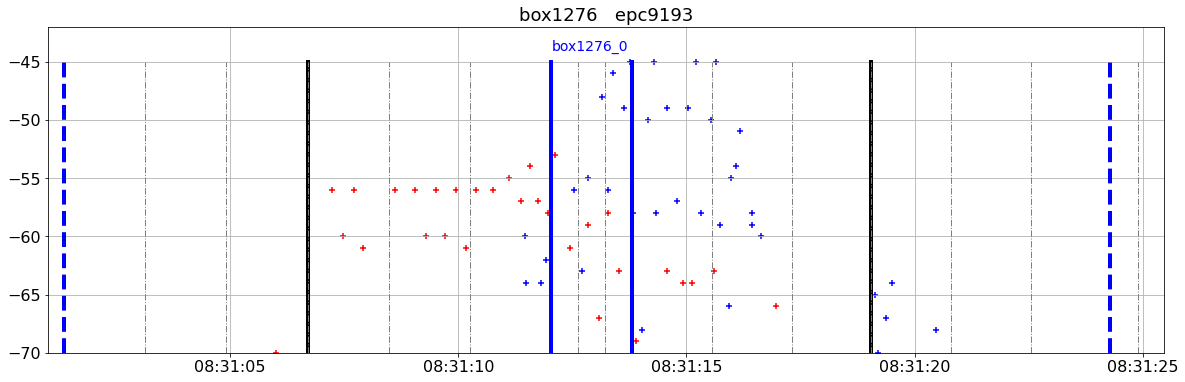

epc6726 3
2020-05-28 13:35:08.352000 2020-05-28 13:35:39.611000


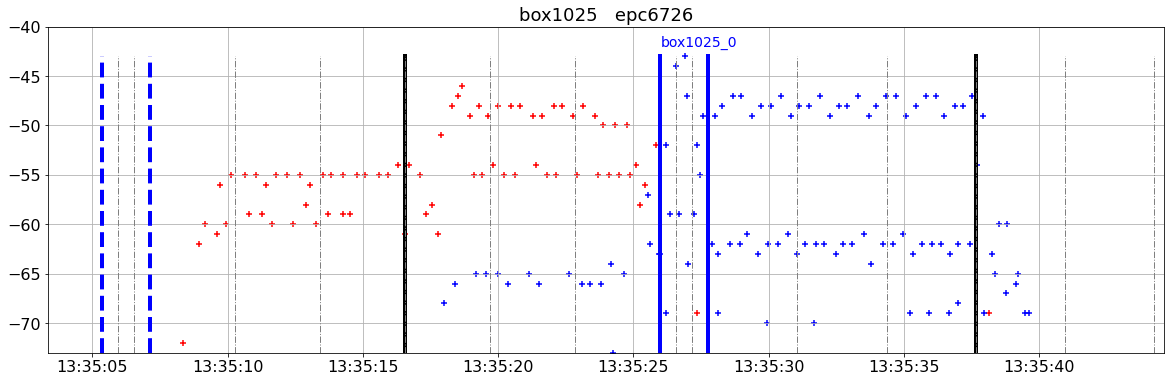

epc9191 3
2020-06-05 08:28:32.841000 2020-06-05 08:31:18.744000


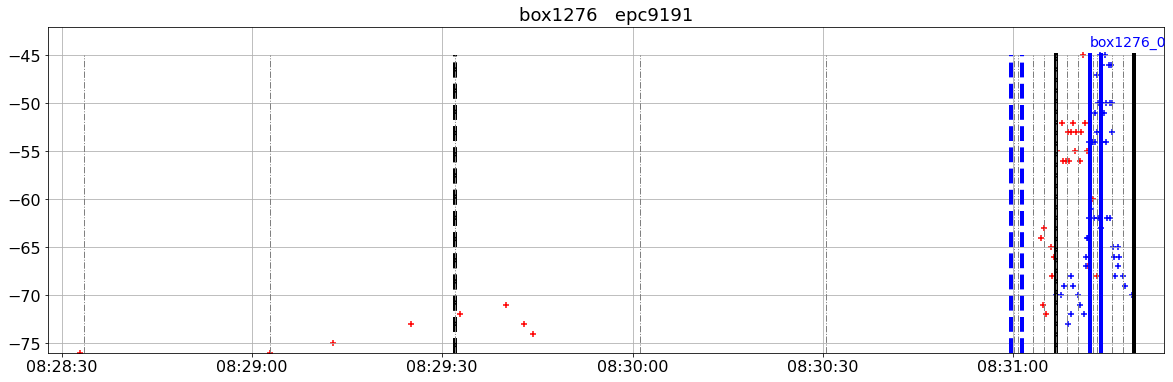

epc9189 3
2020-06-05 08:30:54.504000 2020-06-05 08:31:20.764000


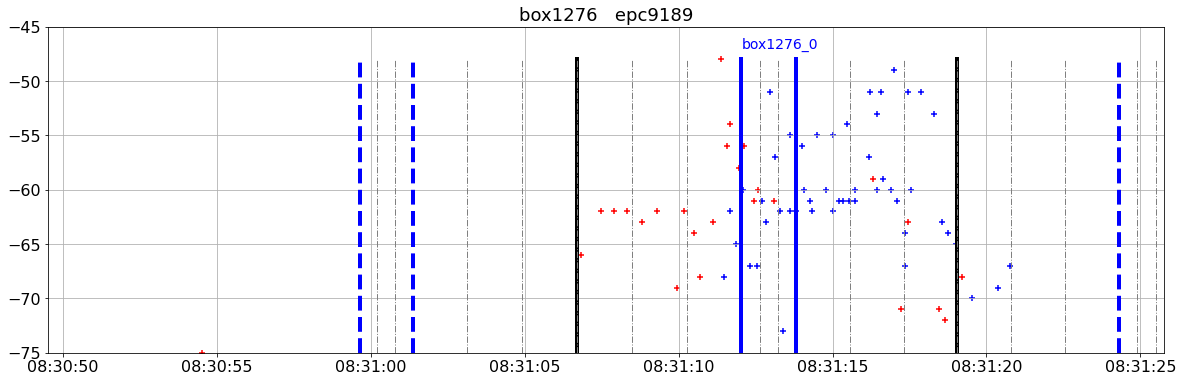

epc9185 3
2020-06-05 08:31:03.642000 2020-06-05 08:31:19.104000


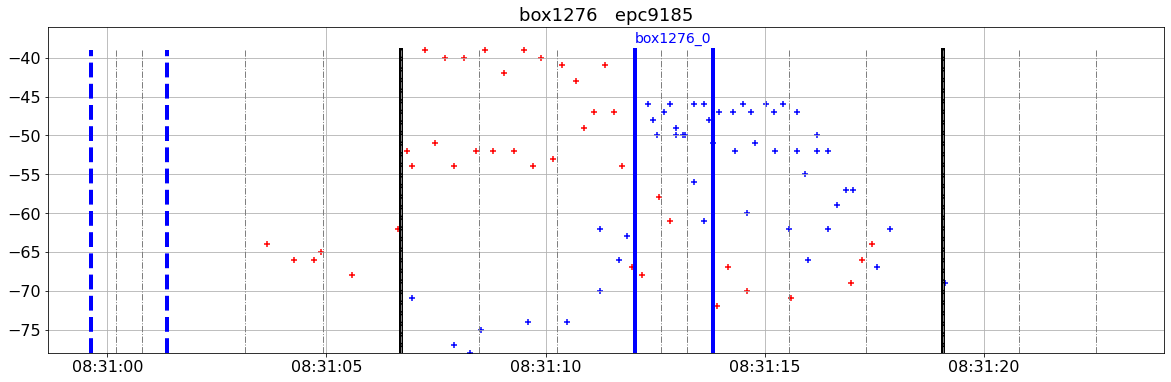

epc5508 3
2020-05-26 07:25:43.758000 2020-05-26 07:26:32.559000


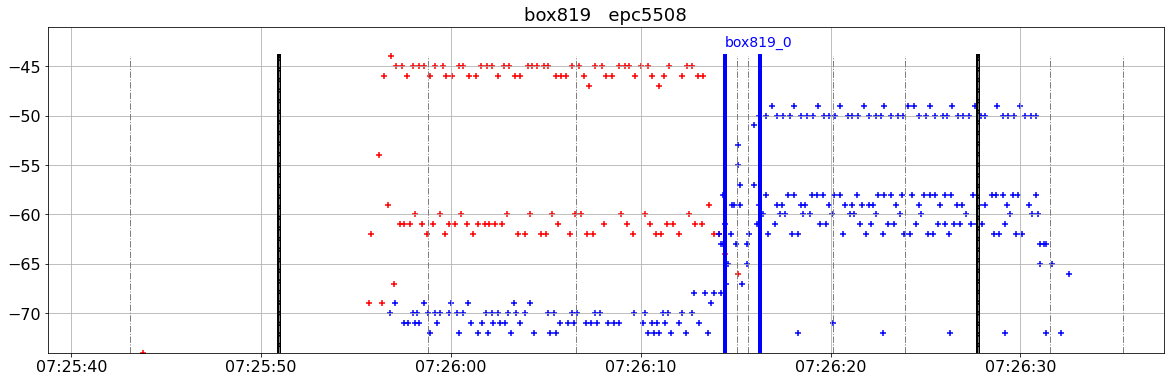

epc7762 3
2020-06-03 10:07:14.405000 2020-06-03 11:19:29.547000


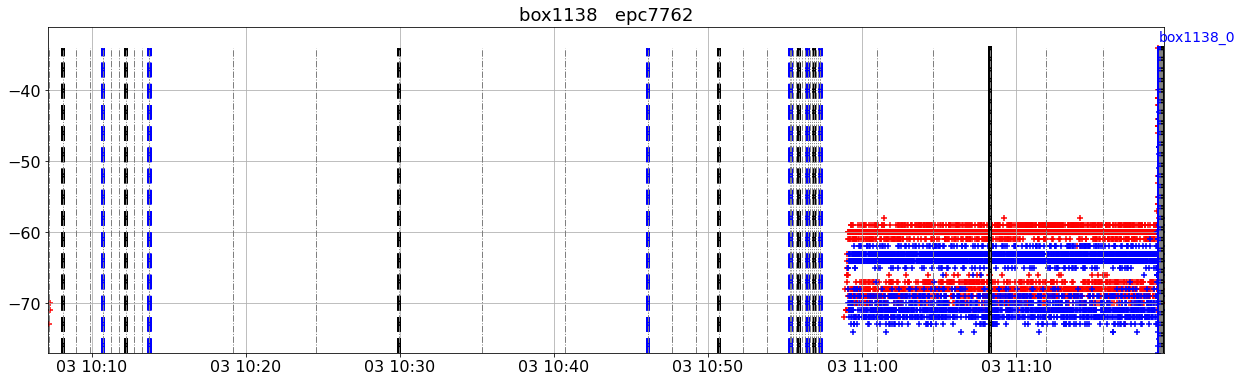

epc634 3
2020-05-06 08:53:01.795000 2020-05-06 08:53:14.775000


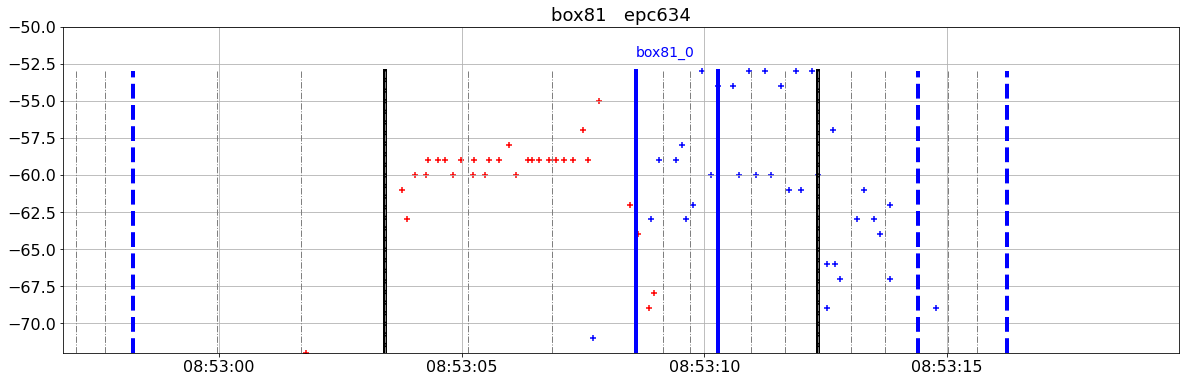

epc2568 3
2020-05-12 12:30:49.896000 2020-05-12 13:30:05.863000


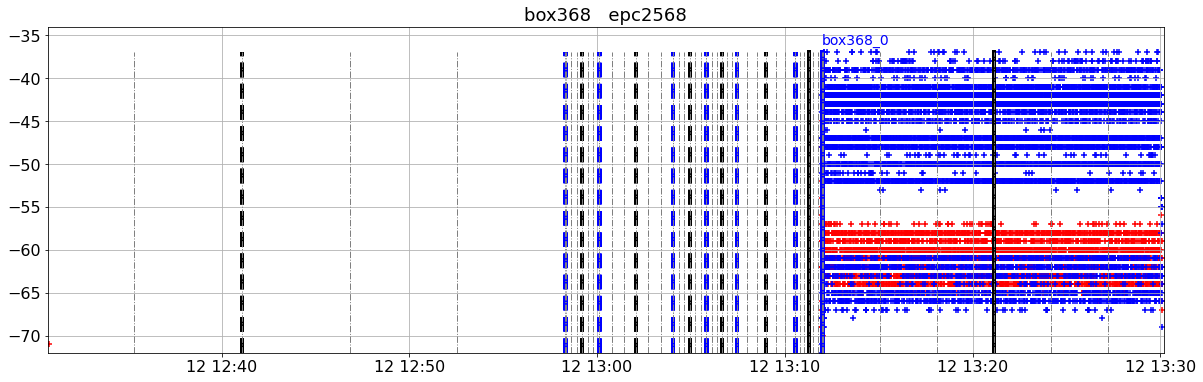

epc35 3
2020-05-06 08:53:02.374000 2020-05-06 08:53:20.415000


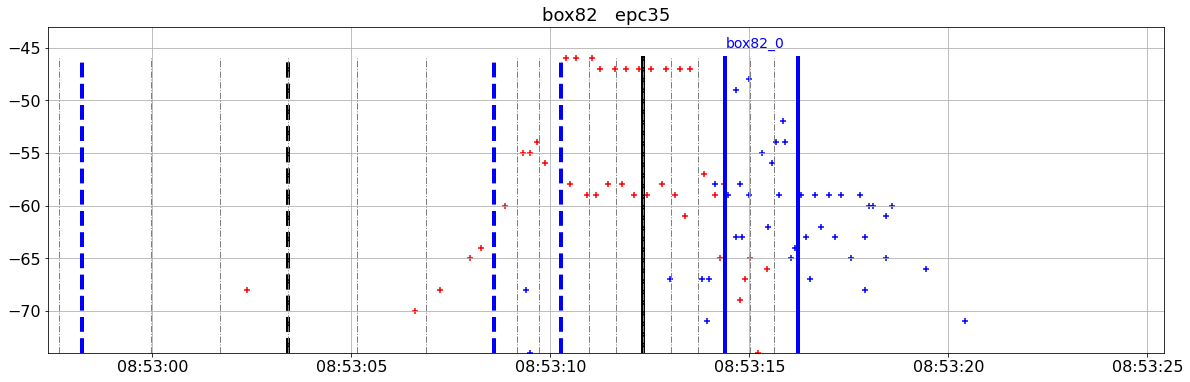

epc12602 3
2020-06-12 13:30:11.909000 2020-06-12 13:30:25.530000


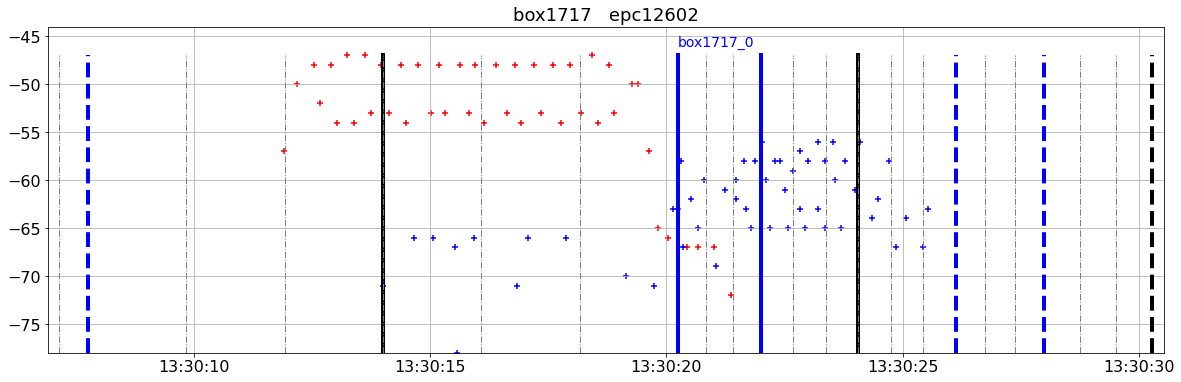

epc12604 3
2020-06-12 13:30:11.909000 2020-06-12 13:30:25.530000


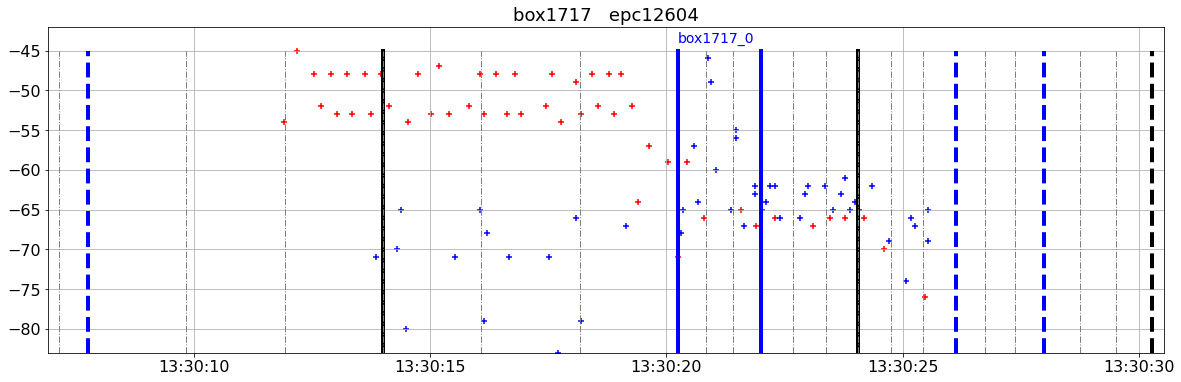

epc71 3
2020-05-04 12:45:02.331000 2020-05-04 12:46:41.033000


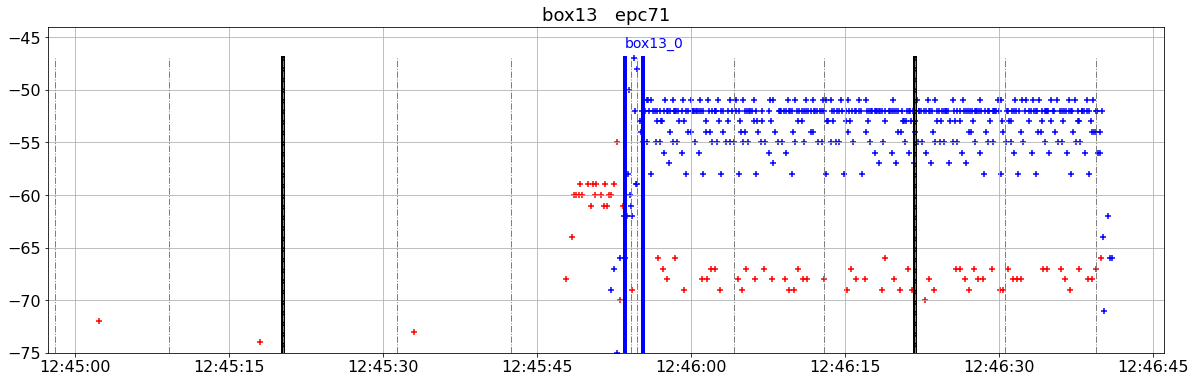

epc12605 3
2020-06-12 13:30:12.169000 2020-06-12 13:30:27.269000


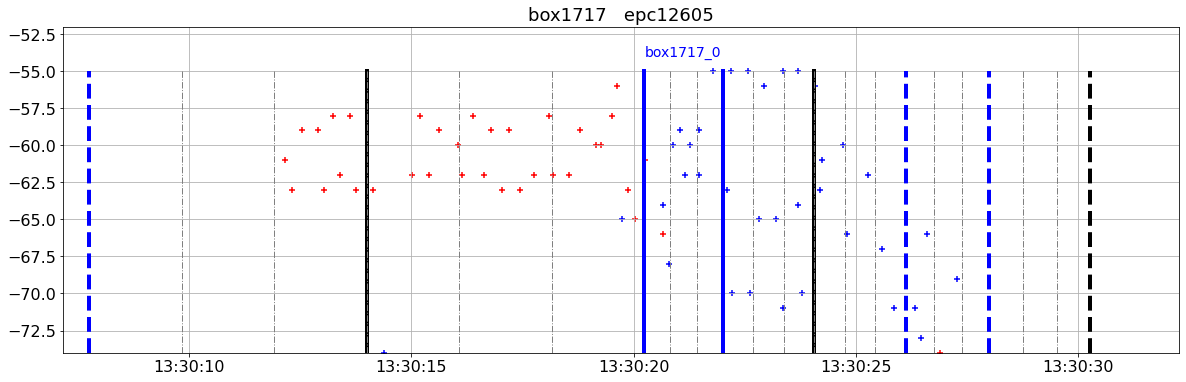

epc5377 3
2020-05-25 13:17:00.290000 2020-05-25 13:31:55.168000


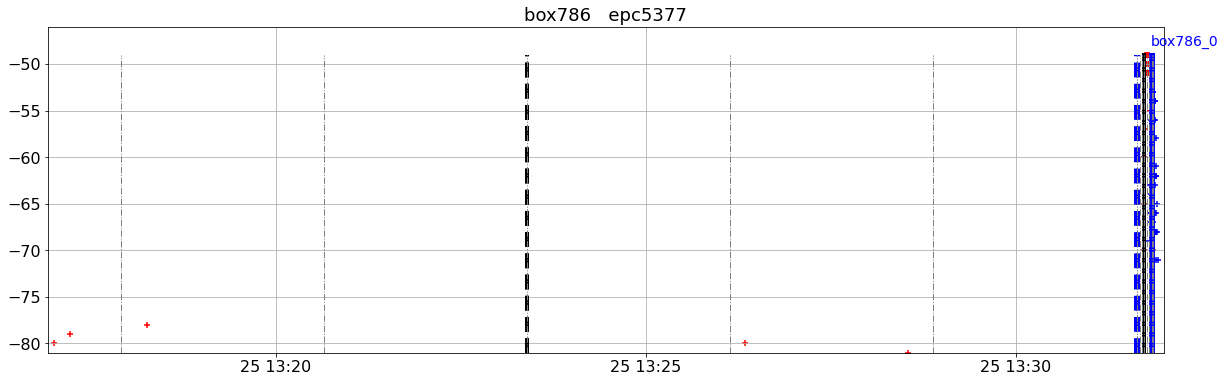

epc5376 3
2020-05-25 13:16:54.190000 2020-05-25 13:31:56.147000


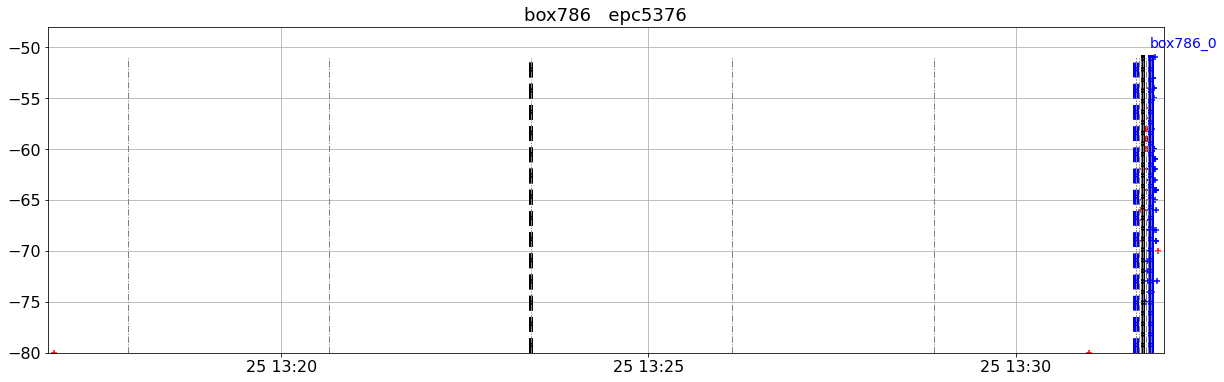

epc5375 3
2020-05-25 13:20:45.735000 2020-05-25 13:31:56.947000


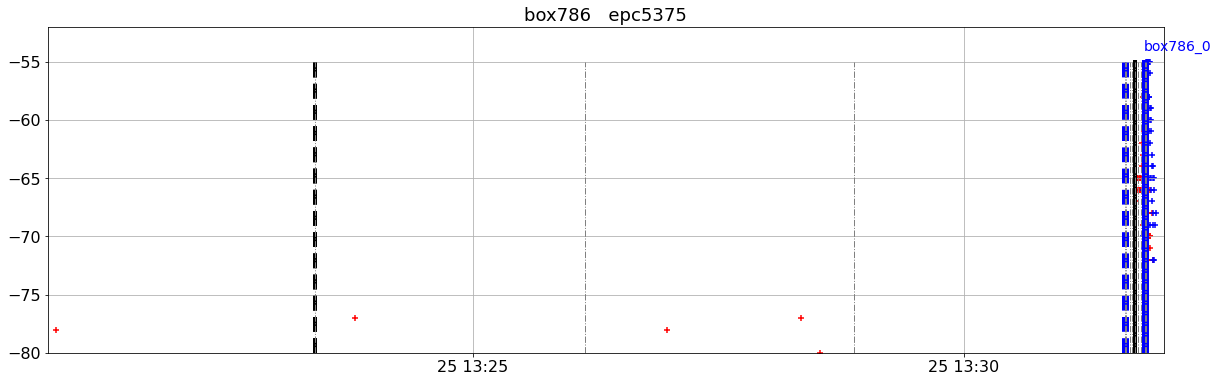

epc5299 3
2020-05-25 12:58:51.930000 2020-05-25 13:01:11.073000


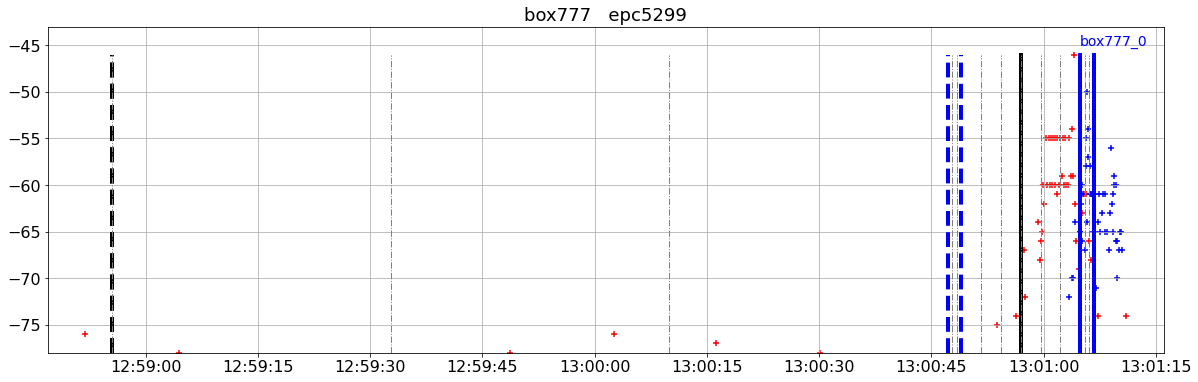

epc11609 3
2020-06-10 09:17:34.458000 2020-06-10 09:21:07.663000


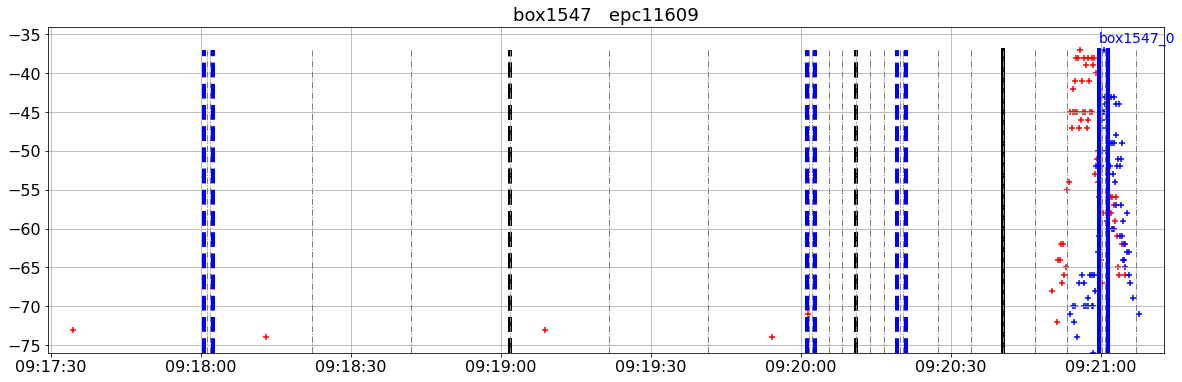

epc632 3
2020-05-06 08:53:01.795000 2020-05-06 08:53:15.214000


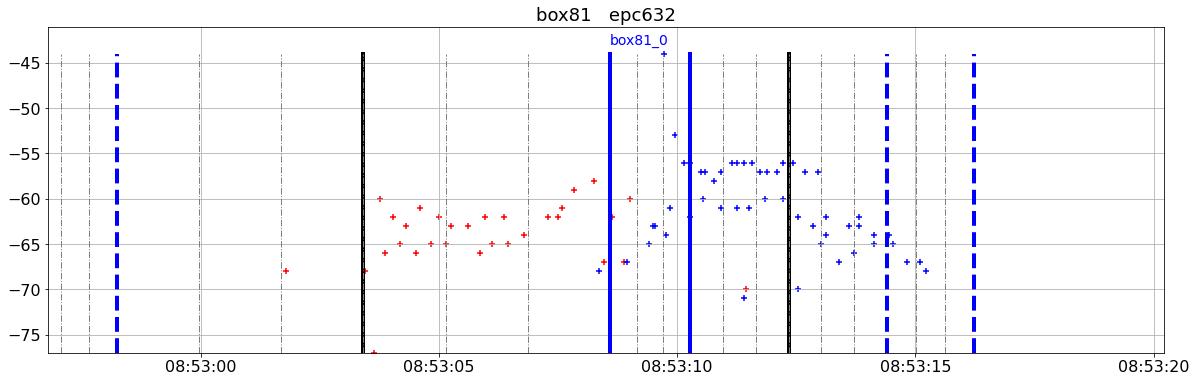

epc5056 3
2020-05-27 14:50:53.877000 2020-05-27 14:51:07.057000


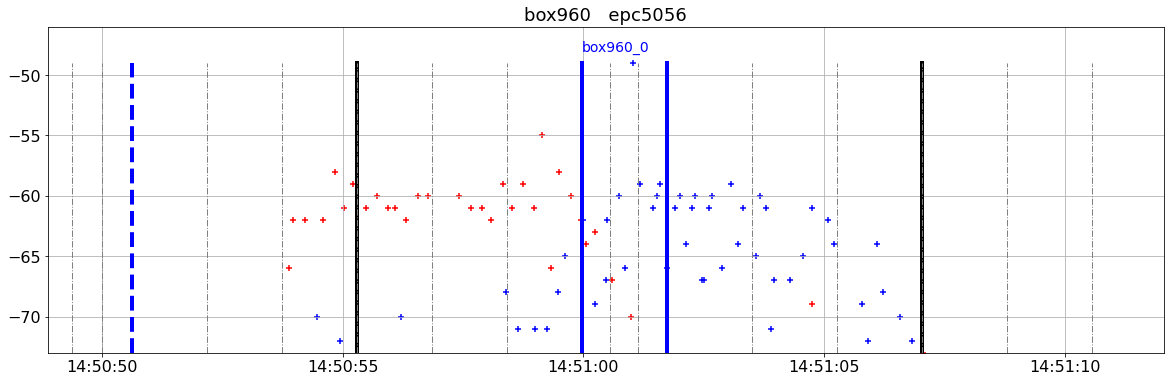

epc4745 3
2020-05-22 08:50:21.789000 2020-05-22 08:50:37.930000


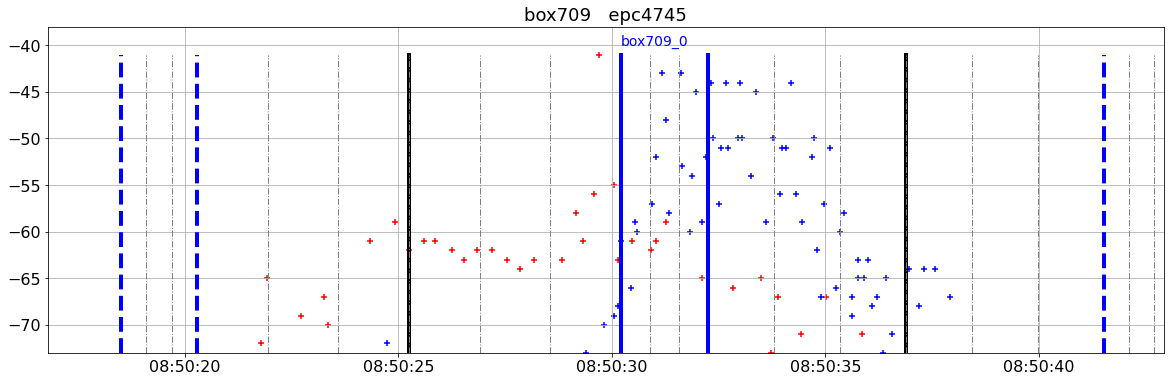

epc4747 3
2020-05-22 08:50:21.789000 2020-05-22 08:50:39.089000


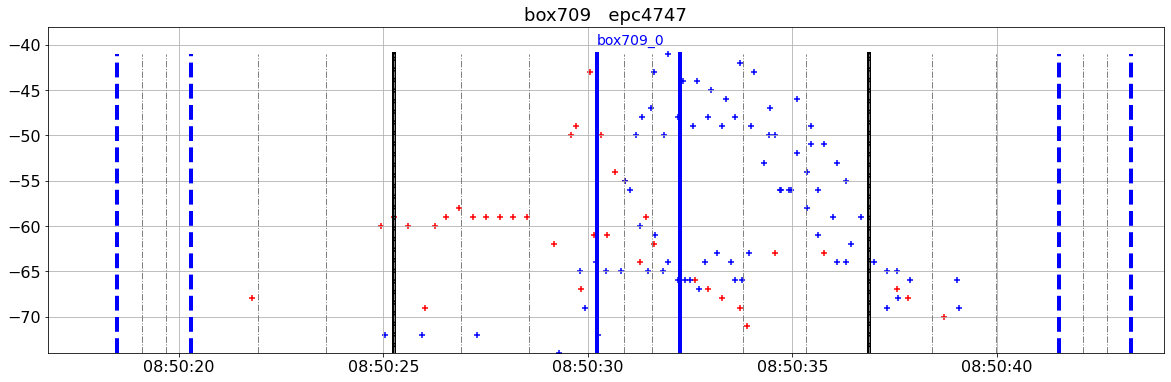

epc5358 3
2020-05-26 07:26:26.999000 2020-05-26 07:28:04.501000


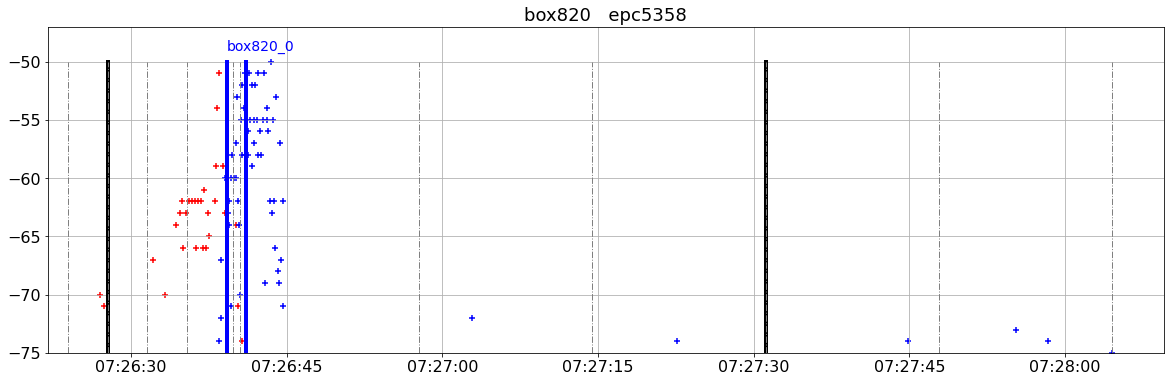

epc4749 3
2020-05-22 08:50:21.169000 2020-05-22 08:50:39.029000


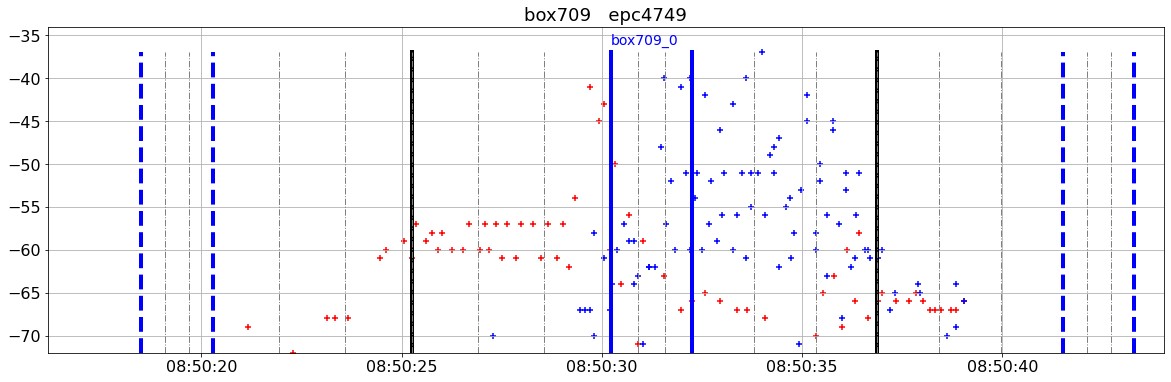

epc5300 3
2020-05-25 12:58:49.450000 2020-05-25 13:01:10.973000


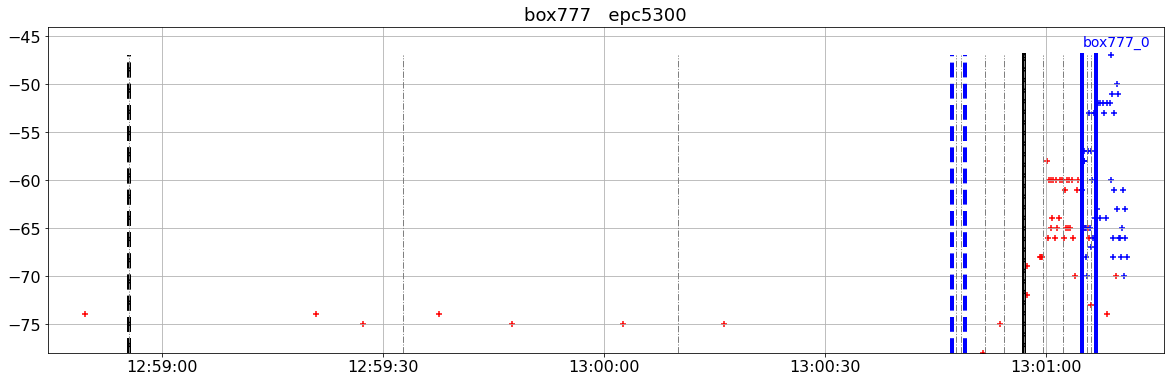

epc4751 3
2020-05-22 08:50:20.570000 2020-05-22 08:50:38.470000


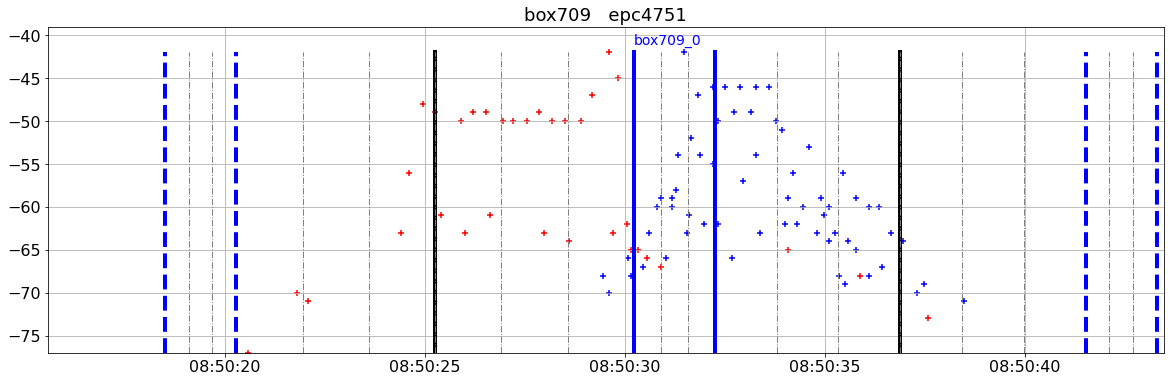

epc2820 3
2020-05-12 13:31:53.625000 2020-05-12 13:32:07.585000


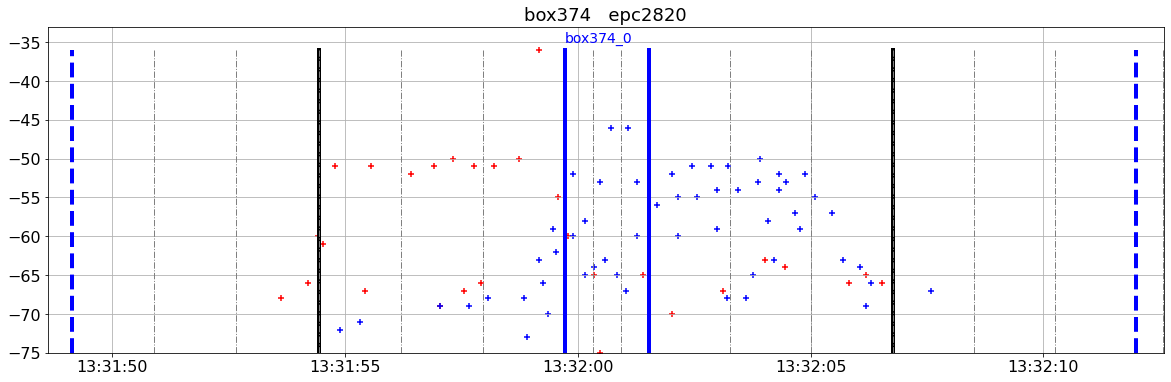

epc4755 3
2020-05-22 08:50:21.789000 2020-05-22 08:50:36.989000


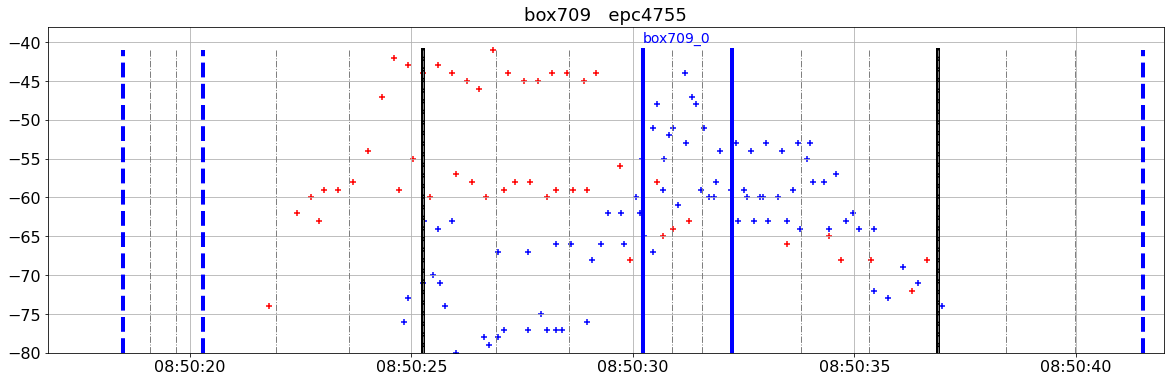

epc5348 3
2020-05-25 13:10:31.083000 2020-05-25 13:13:44.107000


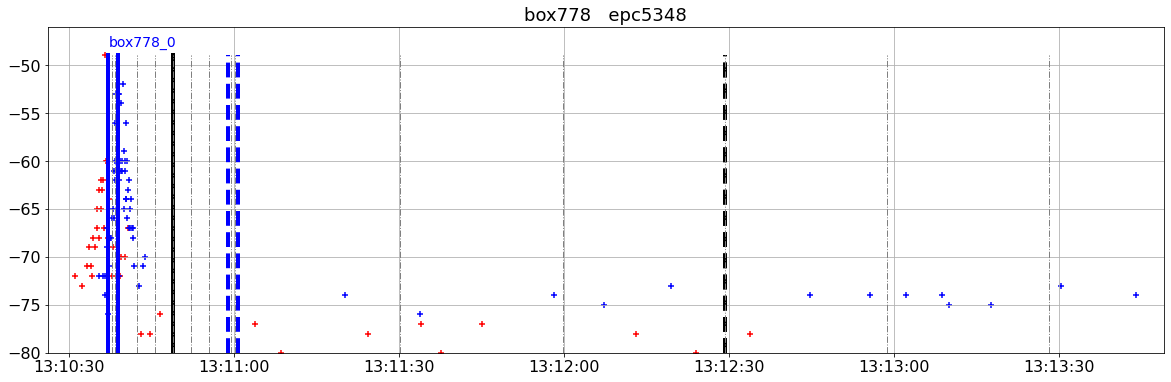

epc5346 3
2020-05-25 13:10:35.083000 2020-05-25 13:13:26.387000


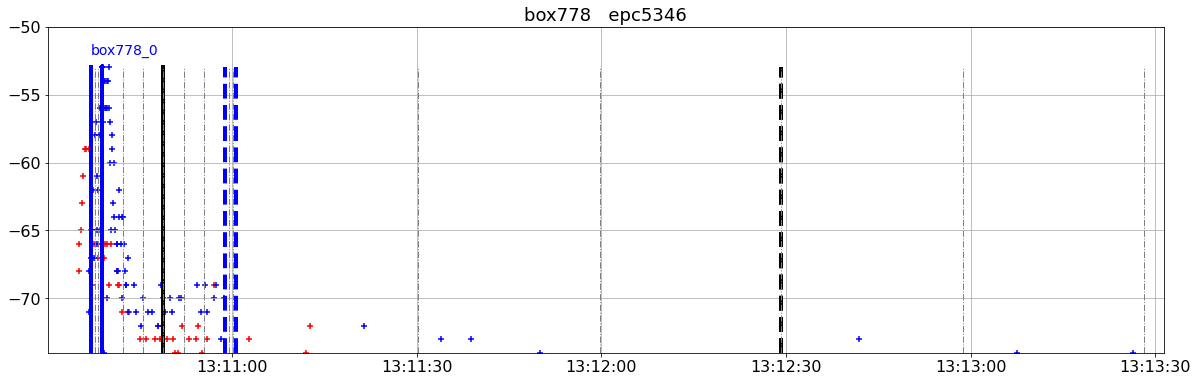

epc11603 3
2020-06-10 09:18:15 2020-06-10 09:21:05.602000


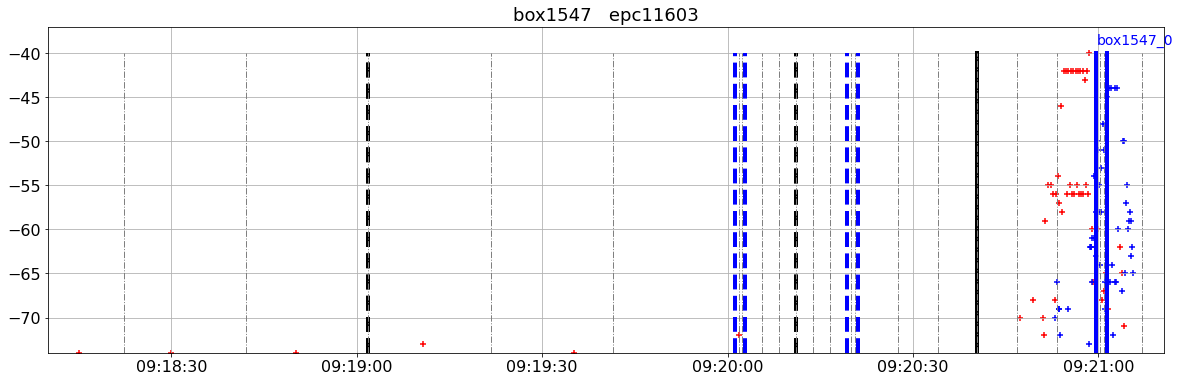

epc2814 3
2020-05-12 13:31:50.265000 2020-05-12 13:32:08.545000


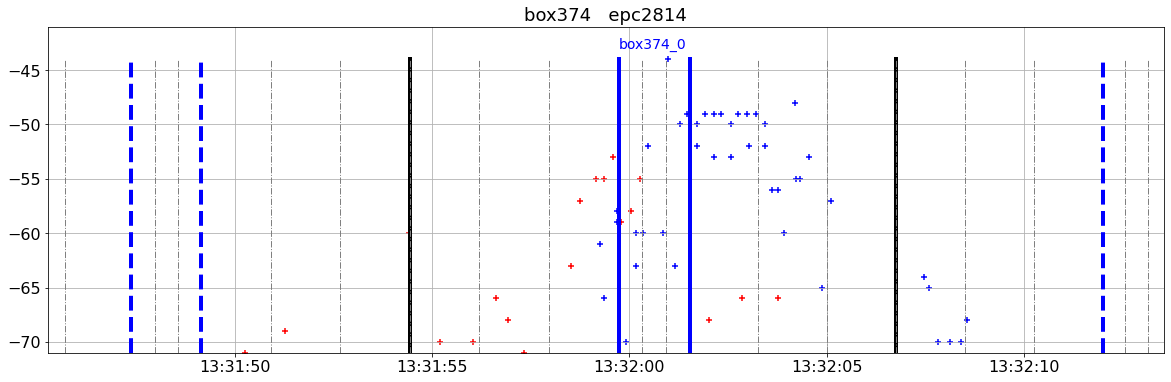

epc631 3
2020-05-06 08:53:02.374000 2020-05-06 08:53:13.814000


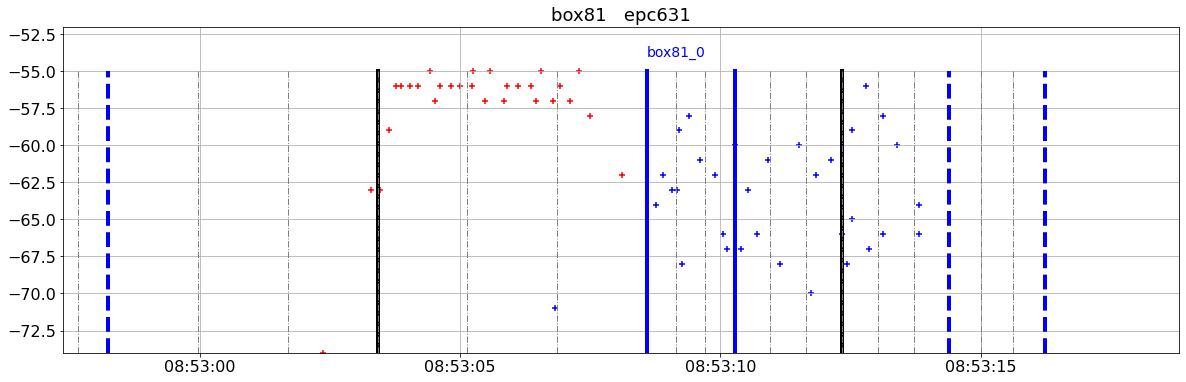

epc10374 3
2020-06-09 08:57:05.460000 2020-06-09 08:57:45.061000


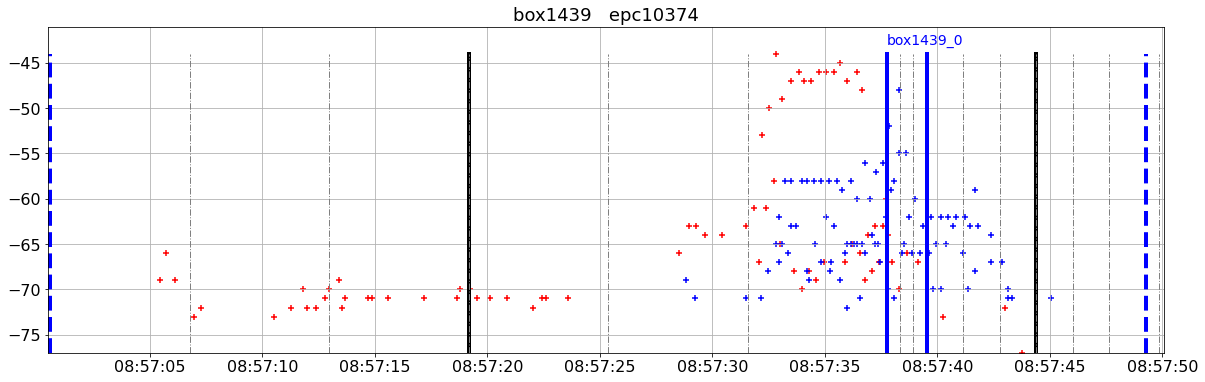

epc5320 3
2020-05-25 13:11:42.565000 2020-05-25 13:14:05.408000


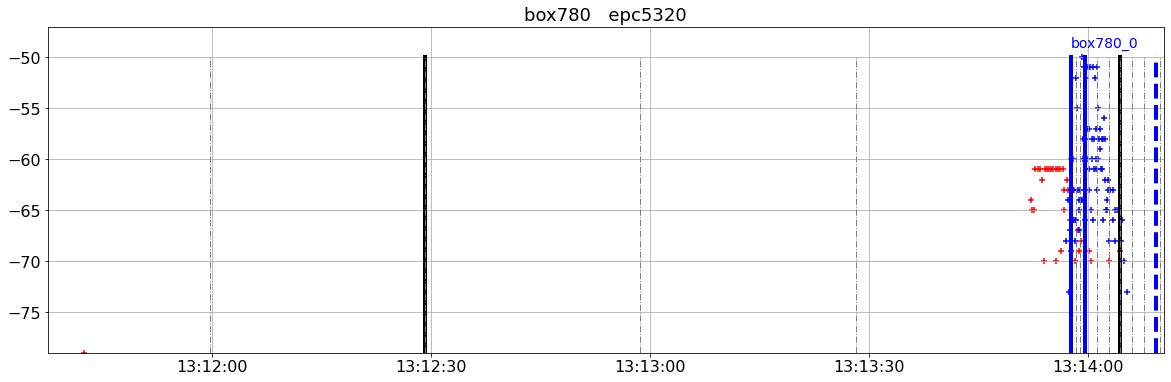

epc2806 3
2020-05-12 13:31:53.945000 2020-05-12 13:32:07.144000


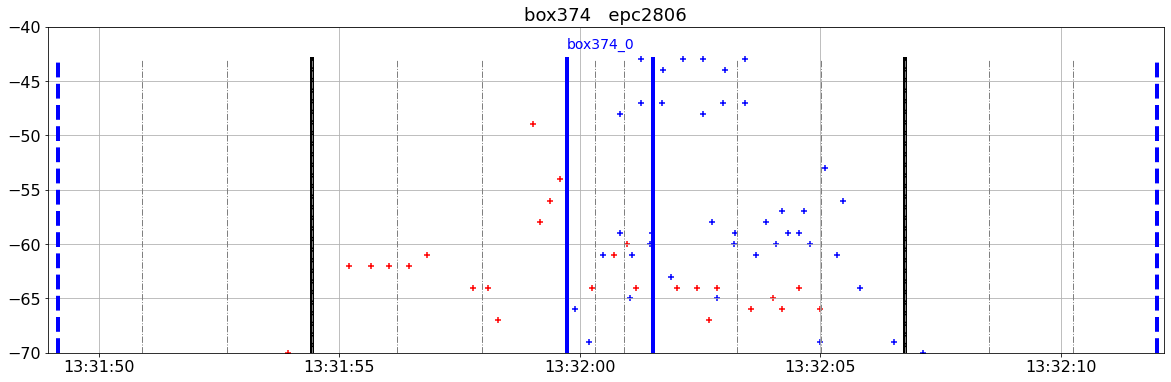

epc630 3
2020-05-06 08:53:02.253000 2020-05-06 08:53:15.634000


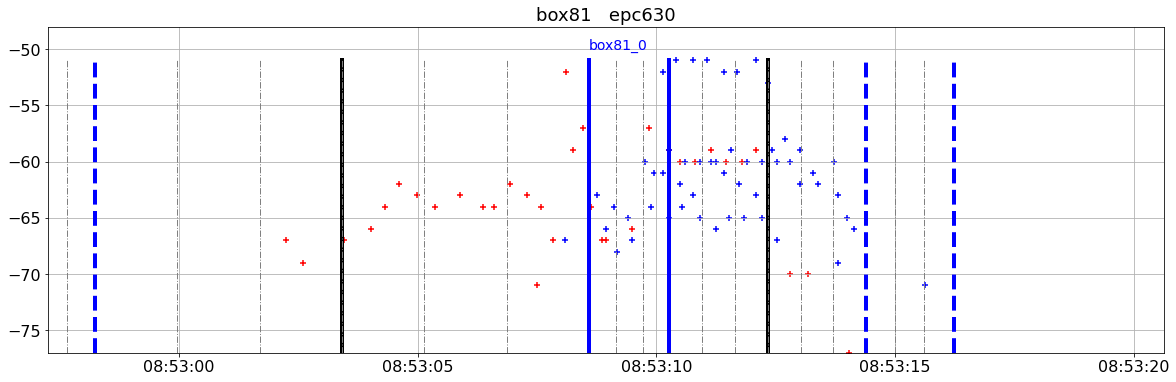

epc11578 3
2020-06-10 12:23:01.066000 2020-06-10 12:23:10.866000


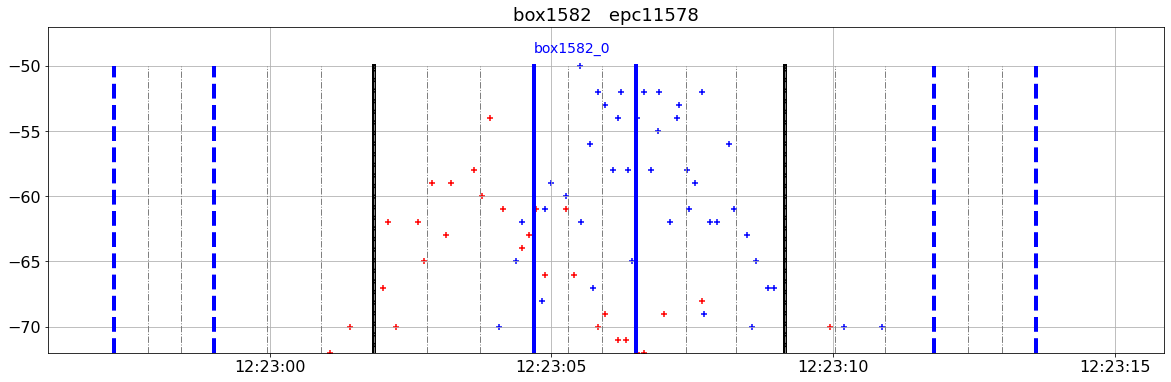

epc11576 3
2020-06-10 12:23:01.846000 2020-06-10 12:23:09.266000


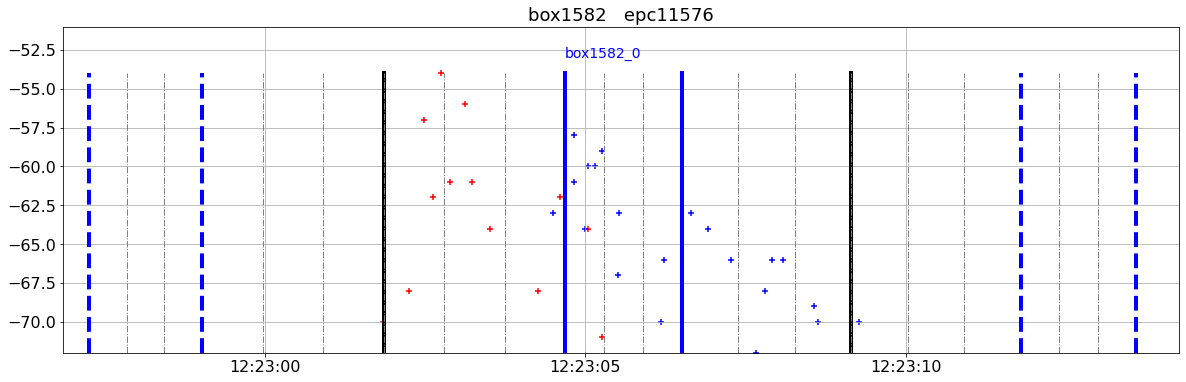

epc4683 3
2020-05-21 13:30:38.062000 2020-05-21 13:30:57.721000


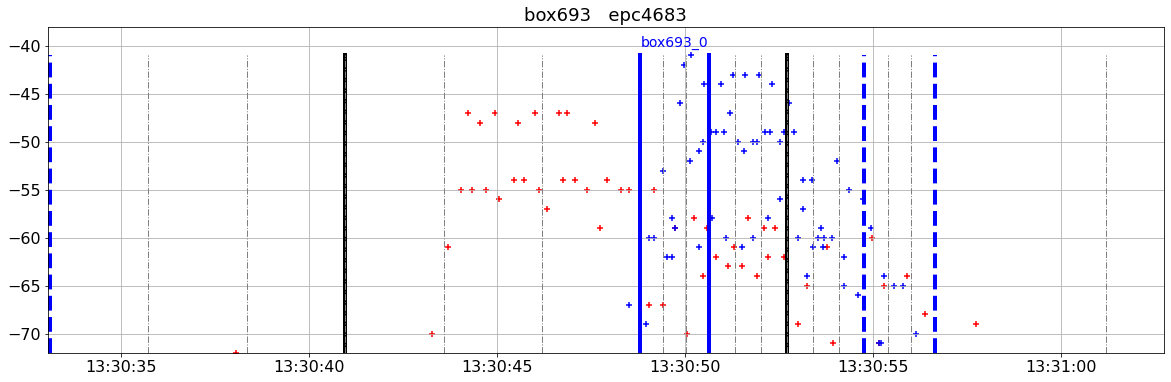

epc12606 3
2020-06-12 13:30:06.030000 2020-06-12 13:30:27.570000


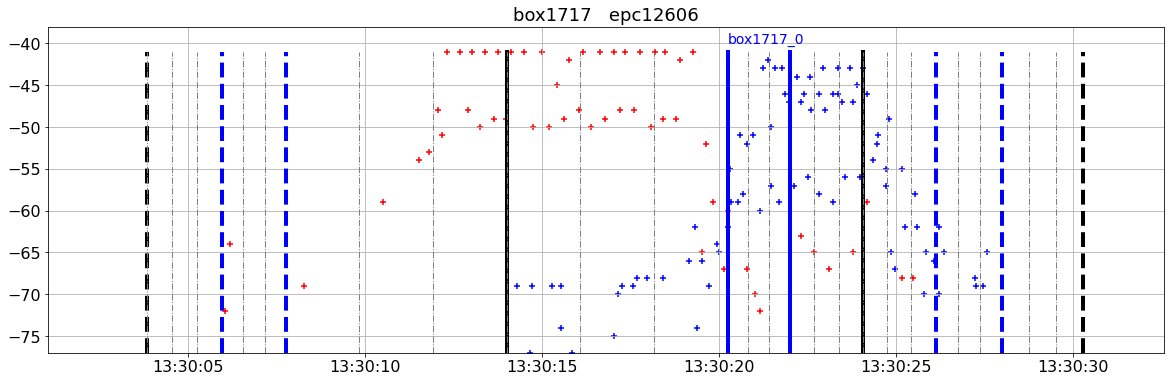

epc12607 3
2020-06-12 13:30:12.310000 2020-06-12 13:30:29.149000


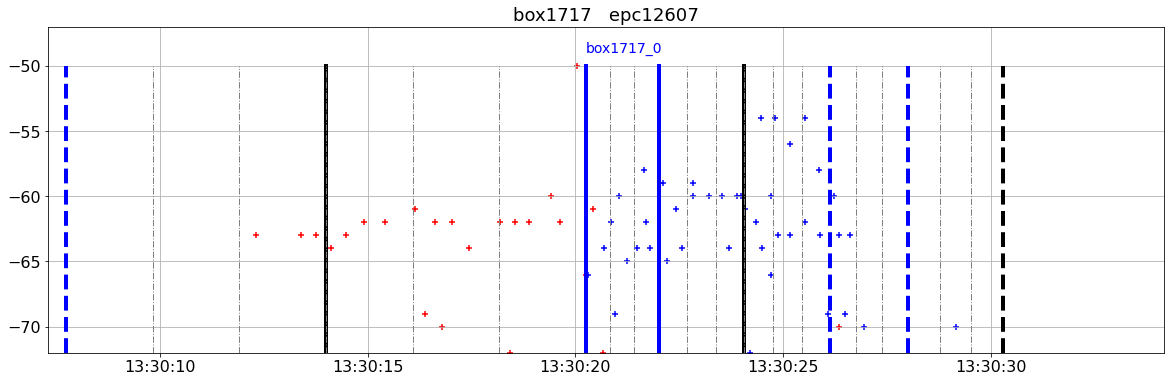

epc12608 3
2020-06-12 13:30:12.169000 2020-06-12 13:30:27.810000


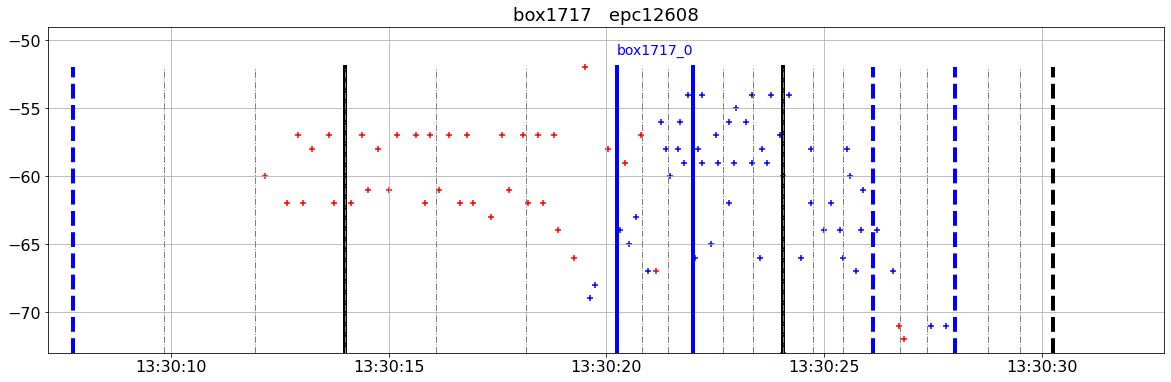

epc12609 3
2020-06-12 13:30:12.549000 2020-06-12 13:30:26.210000


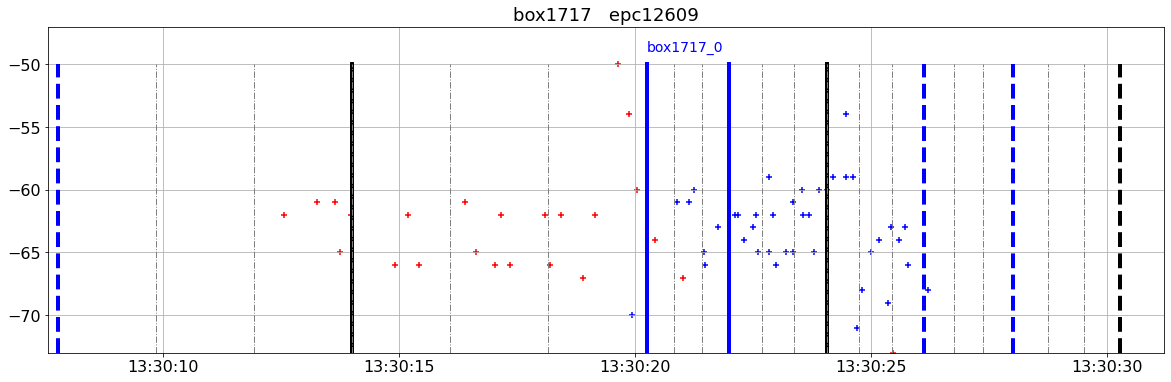

epc12610 3
2020-06-12 13:30:12.909000 2020-06-12 13:30:26.829000


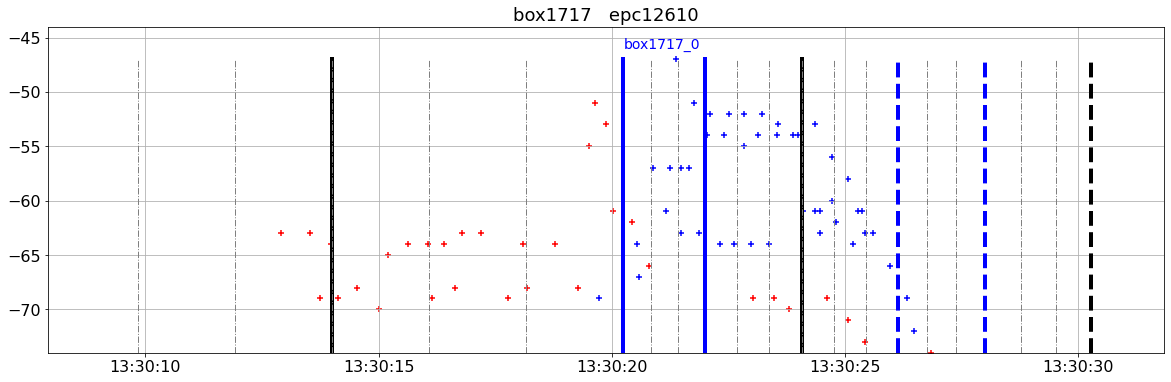

epc12611 3
2020-06-12 13:30:12.969000 2020-06-12 13:30:26.590000


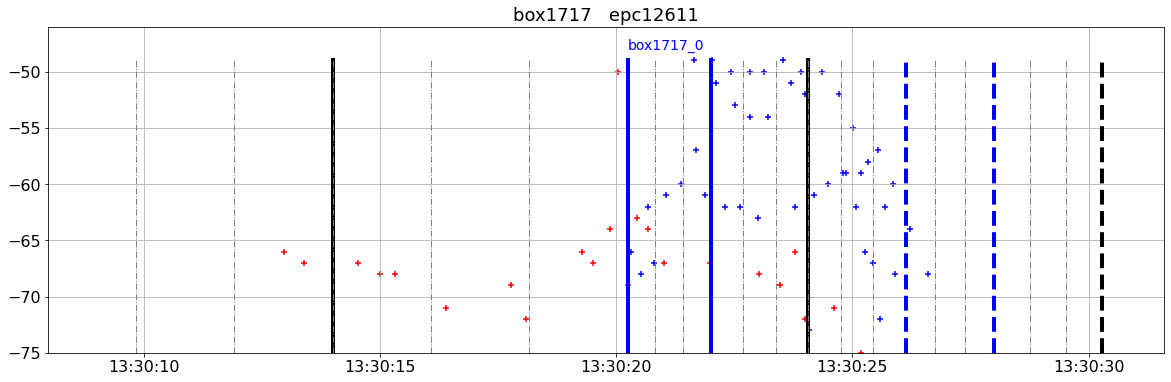

epc12612 3
2020-06-12 13:30:12.549000 2020-06-12 13:30:27.049000


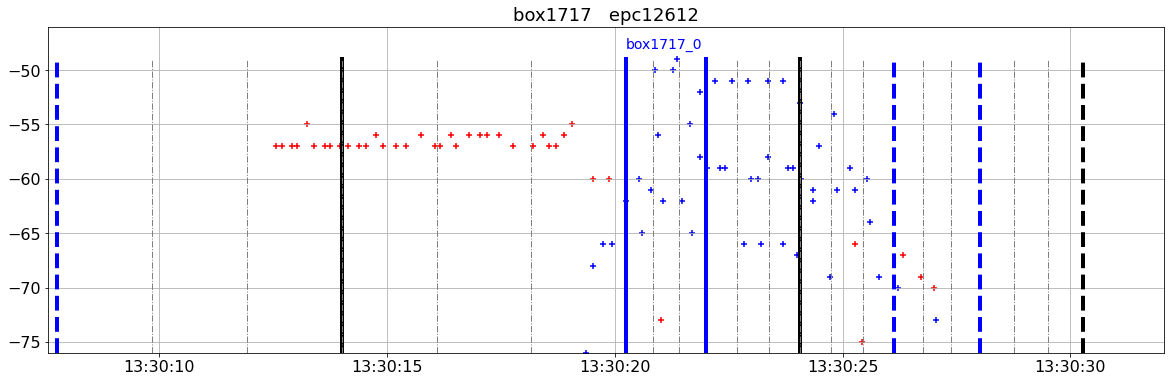

epc4678 3
2020-05-21 13:30:39.122000 2020-05-21 13:30:55.901000


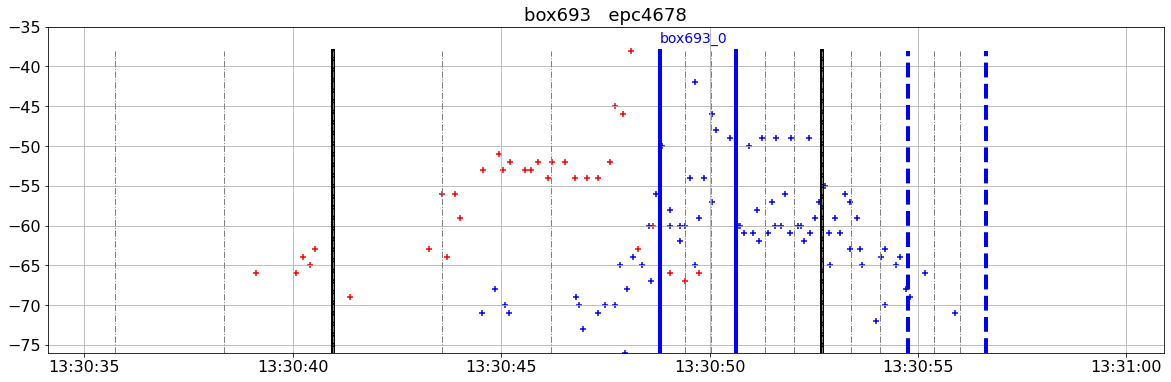

epc4681 3
2020-05-21 13:30:39.442000 2020-05-21 13:30:56.481000


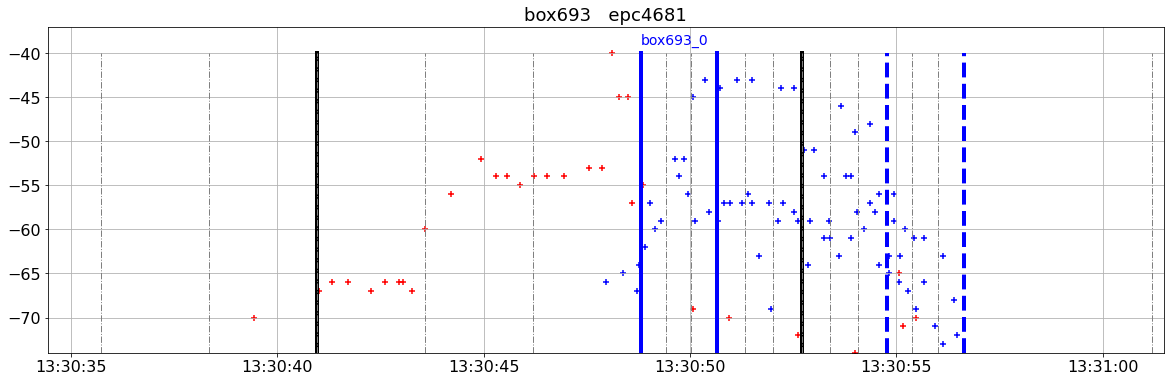

epc4682 3
2020-05-21 13:30:31.102000 2020-05-21 13:30:54.222000


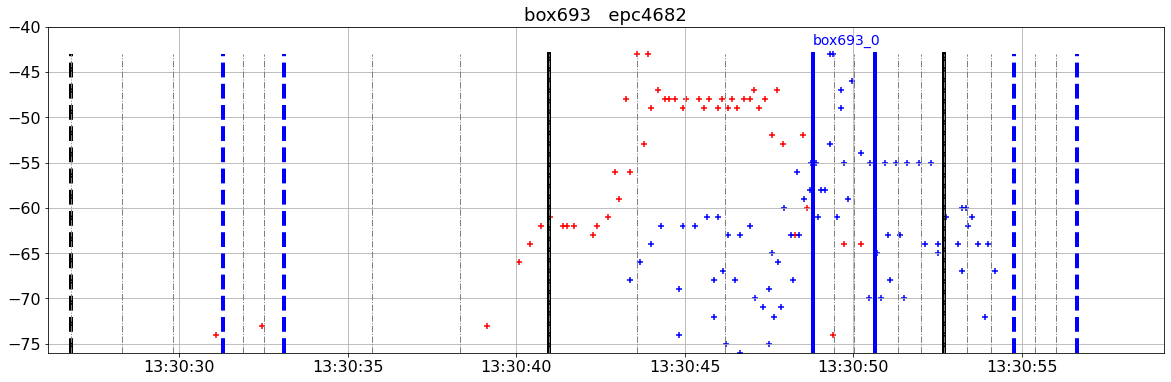

epc4685 3
2020-05-21 13:30:39.762000 2020-05-21 13:30:53.781000


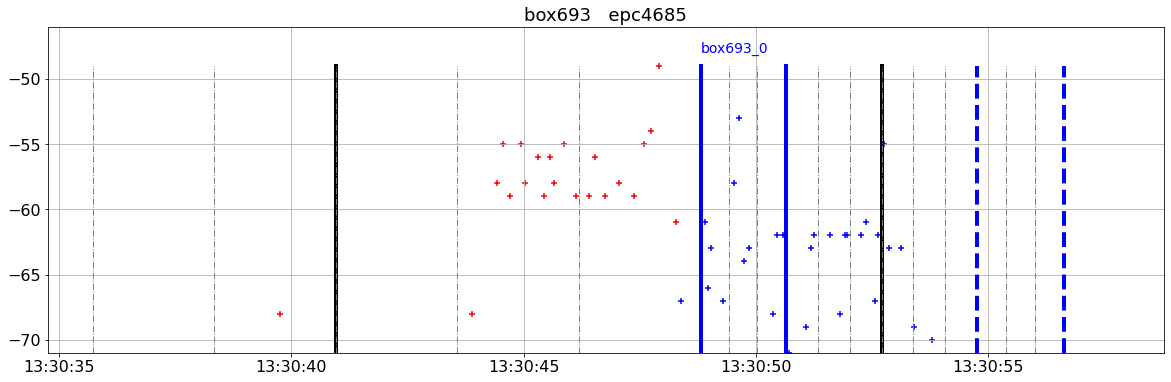

epc11575 3
2020-06-10 12:23:01.605000 2020-06-10 12:23:09.366000


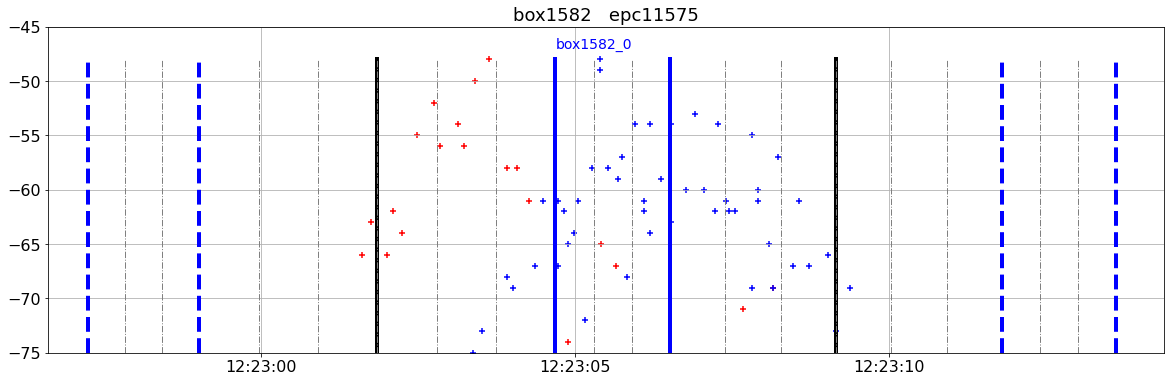

epc4687 3
2020-05-21 13:30:39.122000 2020-05-21 13:30:53.121000


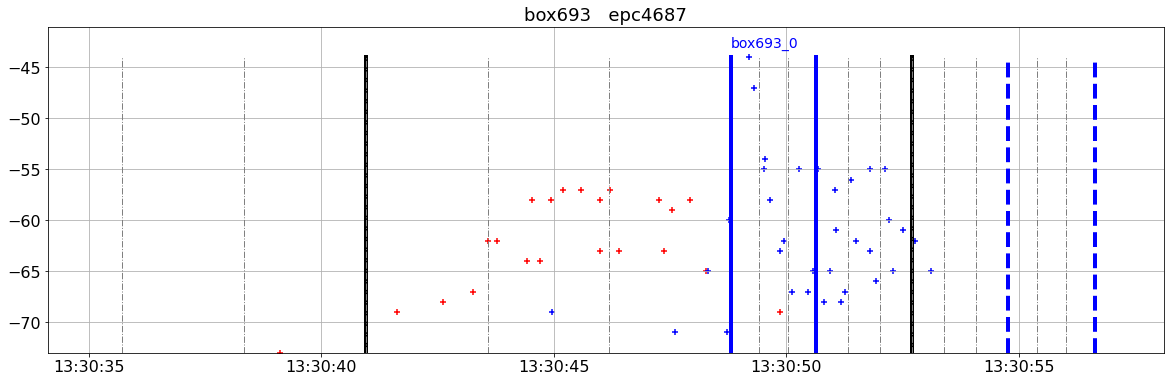

epc4688 3
2020-05-21 13:30:39.122000 2020-05-21 13:30:58.141000


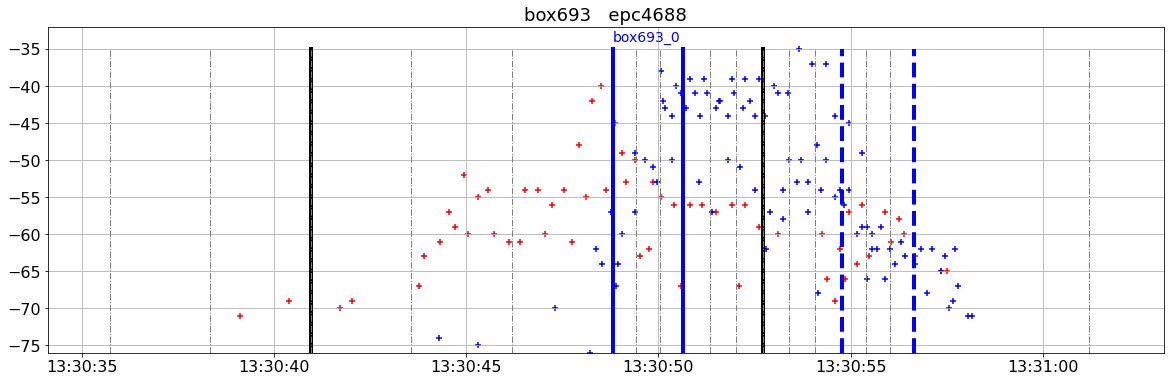

epc2771 3
2020-05-12 13:31:38.192000 2020-05-12 13:31:55.665000


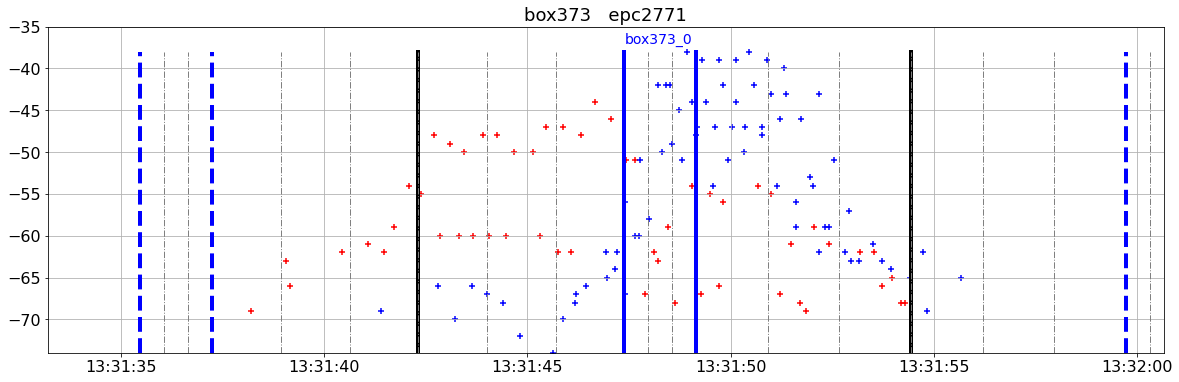

epc68 3
2020-05-04 12:44:46.030000 2020-05-04 12:46:42.454000


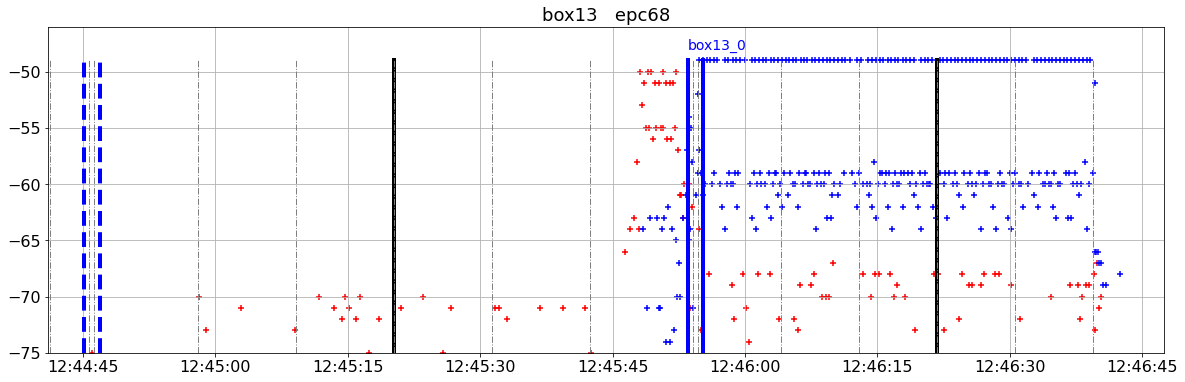

epc72 3
2020-05-04 12:44:59.151000 2020-05-04 12:46:43.713000


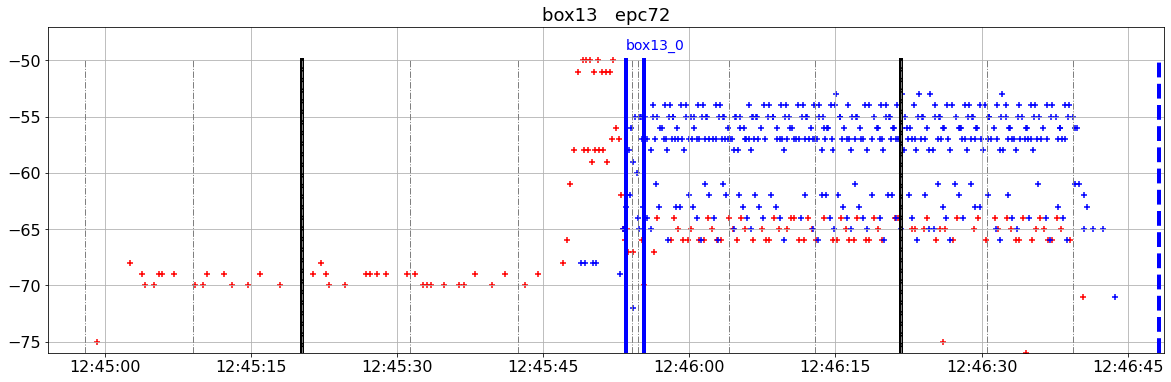

epc12728 3
2020-06-12 13:30:24.969000 2020-06-12 13:30:37.210000


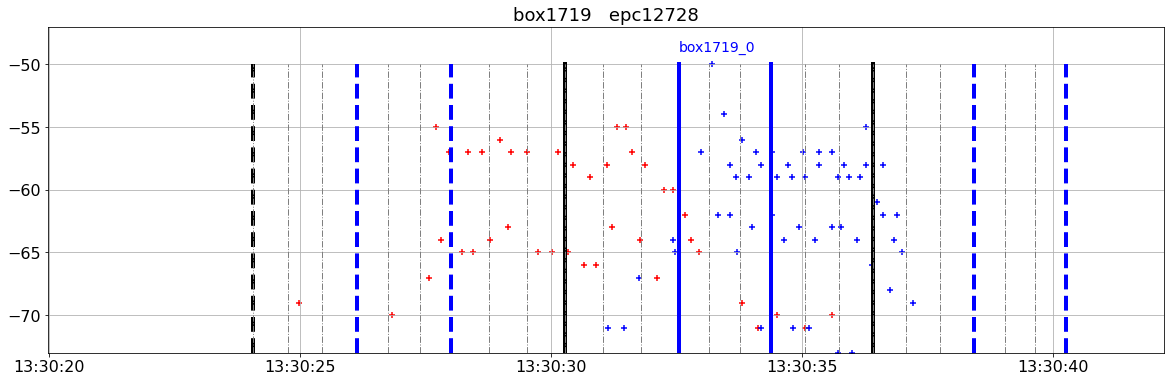

epc12727 3
2020-06-12 13:30:25.470000 2020-06-12 13:30:37.270000


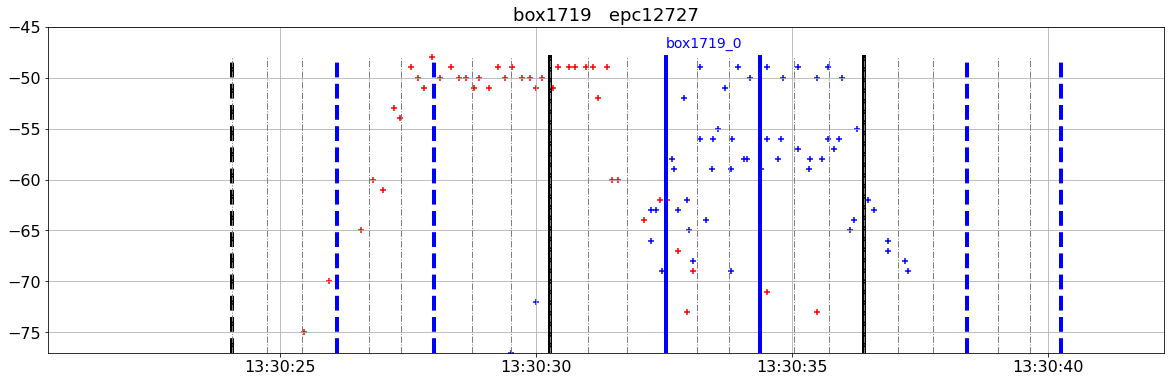

epc12726 3
2020-06-12 13:30:27.009000 2020-06-12 13:30:37.010000


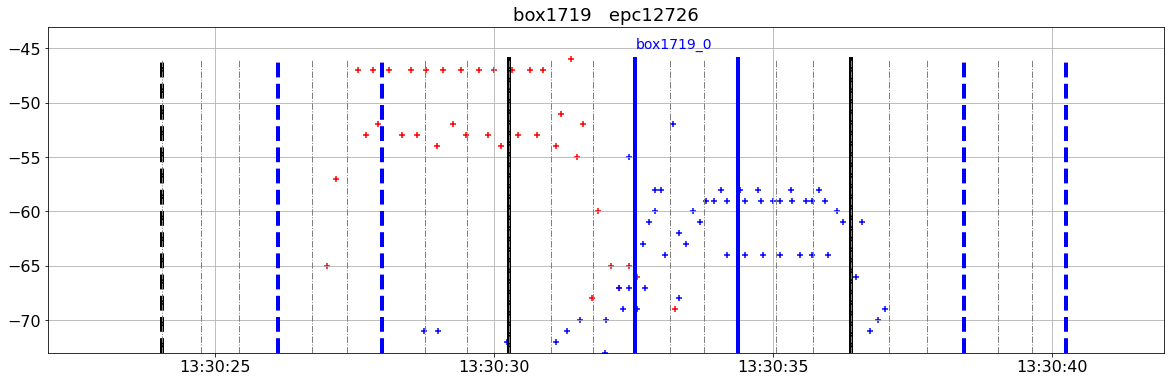

epc12725 3
2020-06-12 13:30:26.590000 2020-06-12 13:30:37.270000


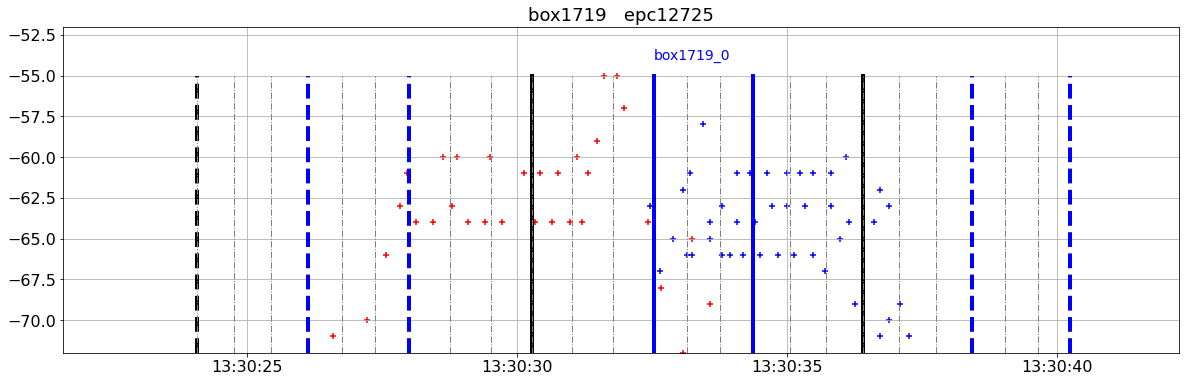

epc11574 3
2020-06-10 12:23:01.426000 2020-06-10 12:23:09.587000


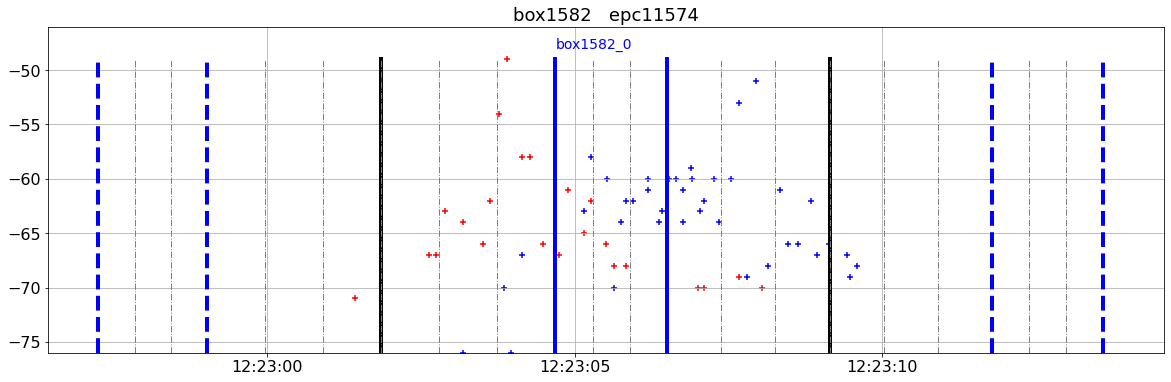

epc2071 3
2020-05-12 08:13:04.450000 2020-05-12 08:13:23.850000


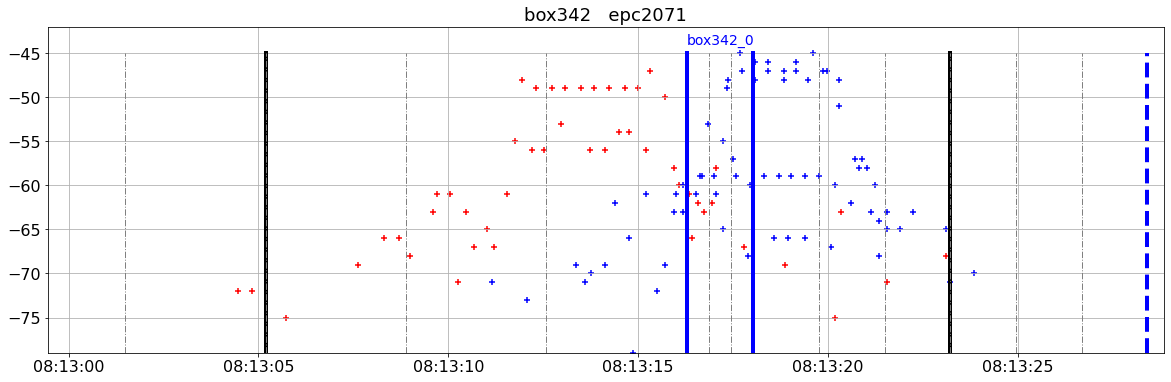

epc2810 3
2020-05-12 13:31:53.984000 2020-05-12 13:32:08.265000


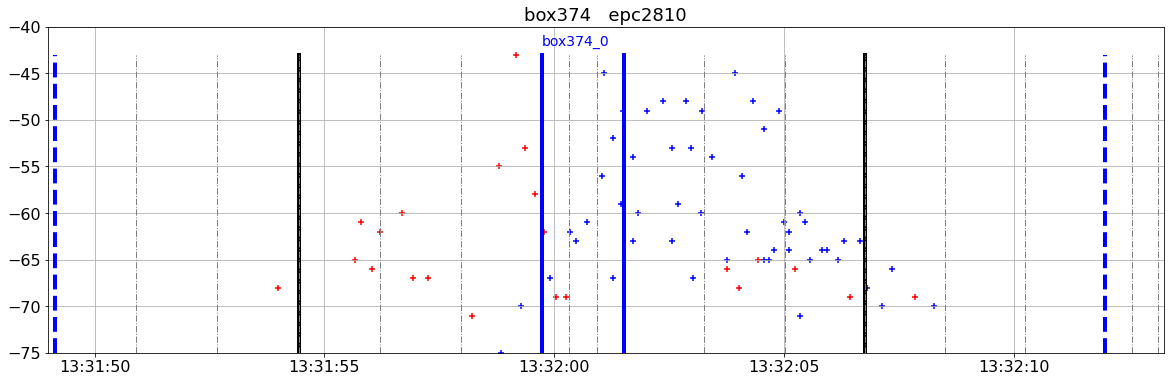

epc12896 3
2020-06-12 13:30:00.530000 2020-06-12 13:30:17.250000


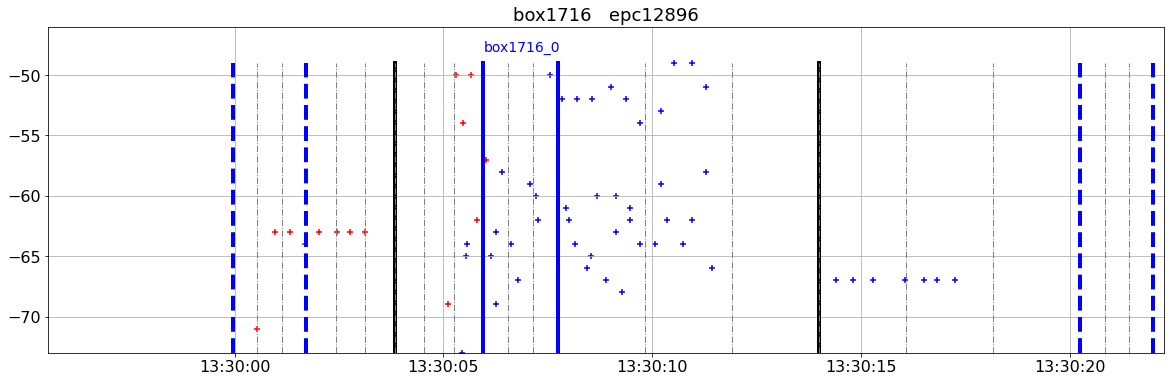

epc11474 3
2020-06-11 14:03:46.372000 2020-06-11 14:04:15.652000


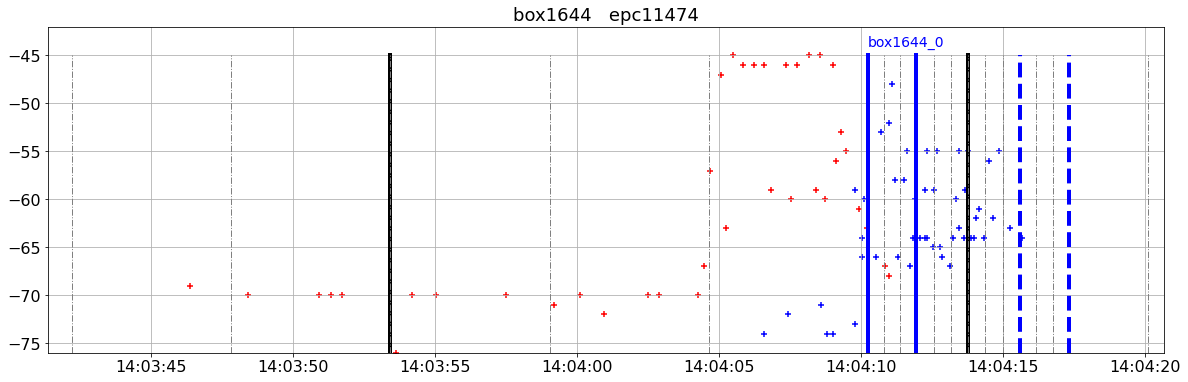

epc12893 3
2020-06-12 13:30:00.609000 2020-06-12 13:30:16.910000


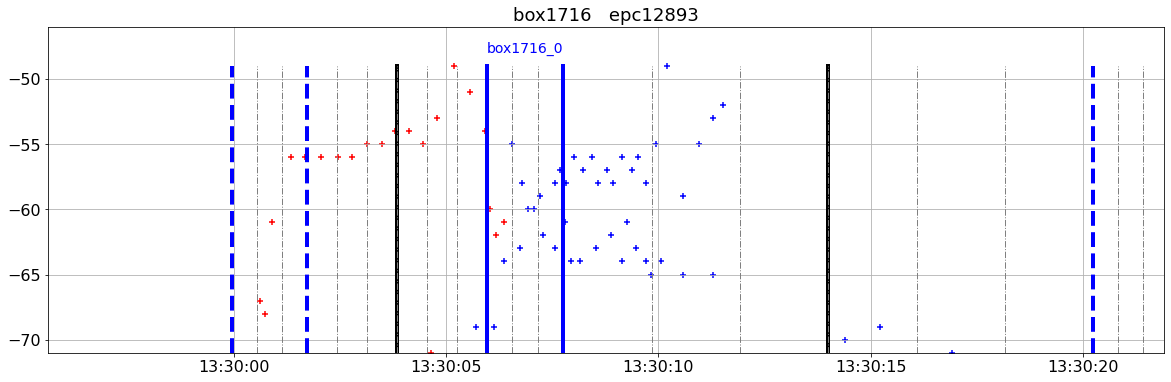

epc559 3
2020-05-06 11:59:35.084000 2020-05-06 11:59:48.964000


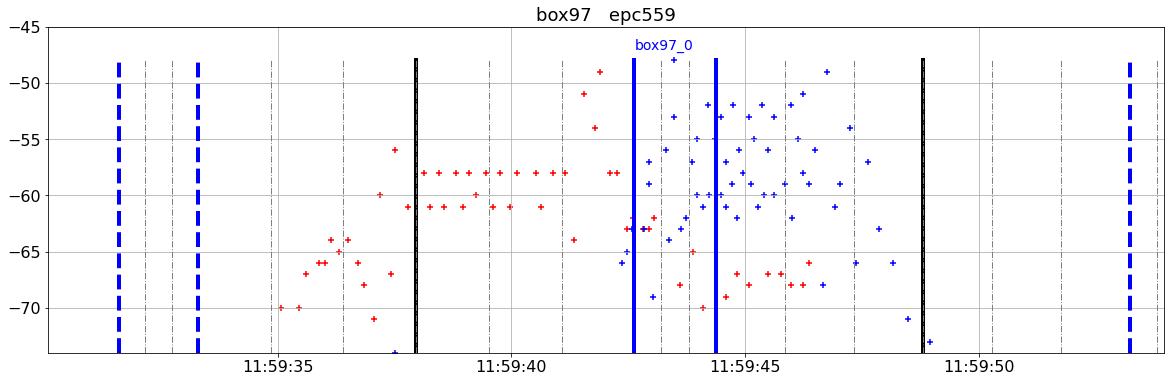

epc12941 3
2020-06-12 14:42:45.052000 2020-06-12 14:43:25.772000


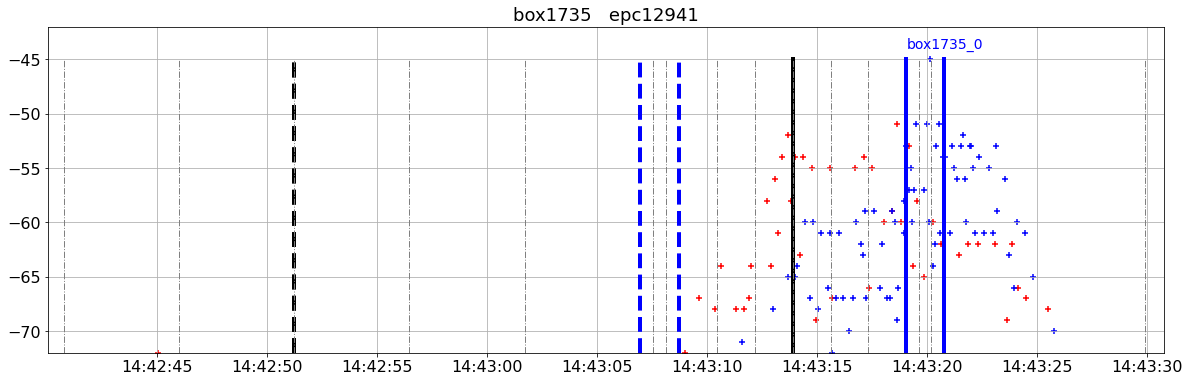

epc7085 3
2020-05-29 08:14:22.639000 2020-05-29 08:14:36.599000


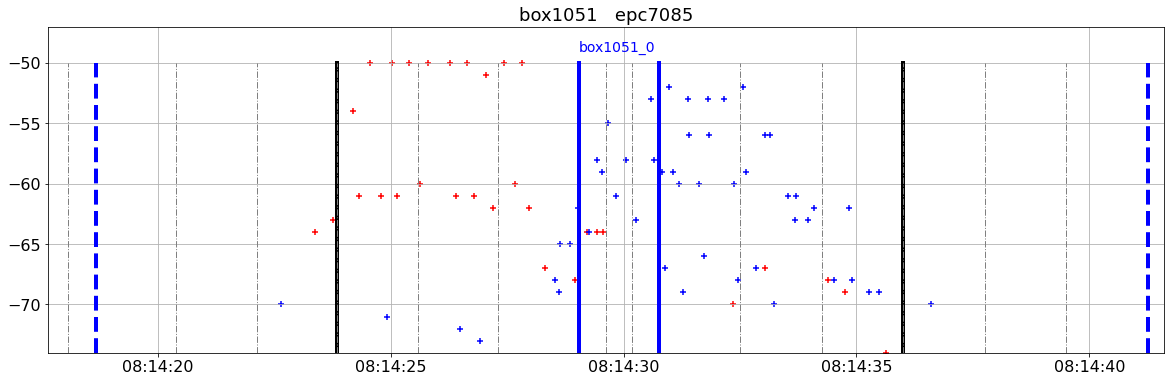

epc70 3
2020-05-04 12:45:02.571000 2020-05-04 12:46:40.393000


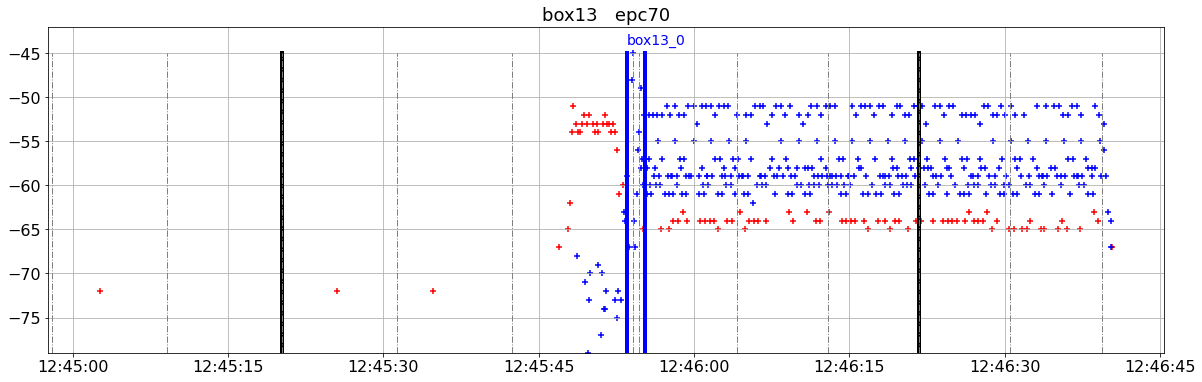

epc2527 3
2020-05-14 08:17:37.112000 2020-05-14 08:18:01.612000


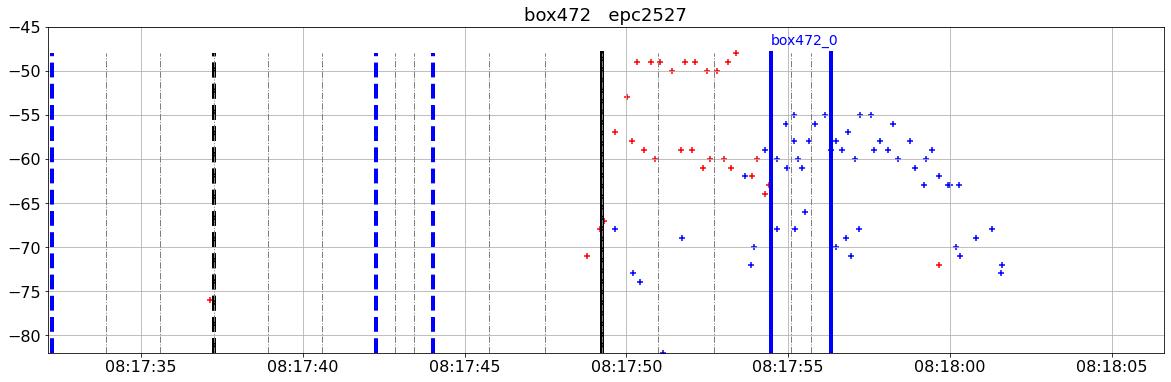

epc4488 3
2020-05-21 13:15:14.044000 2020-05-21 13:30:39.442000


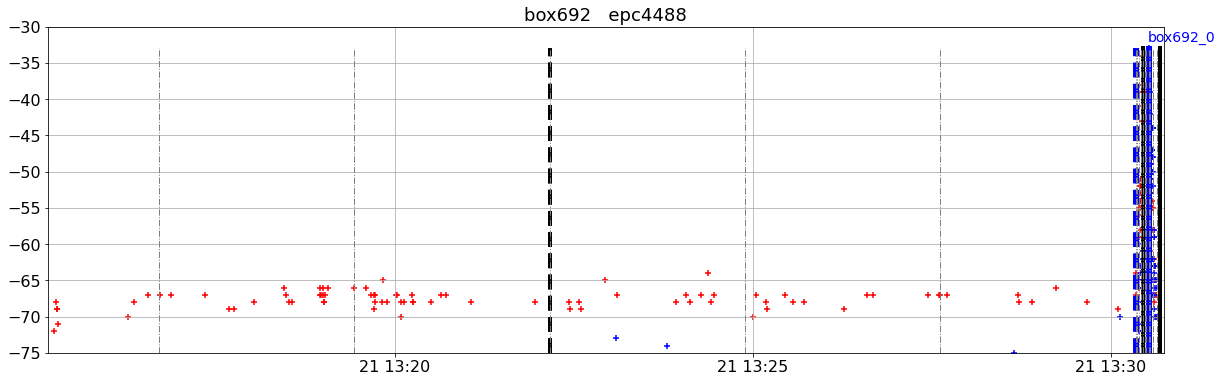

epc7079 3
2020-05-29 08:14:17.640000 2020-05-29 08:14:36.599000


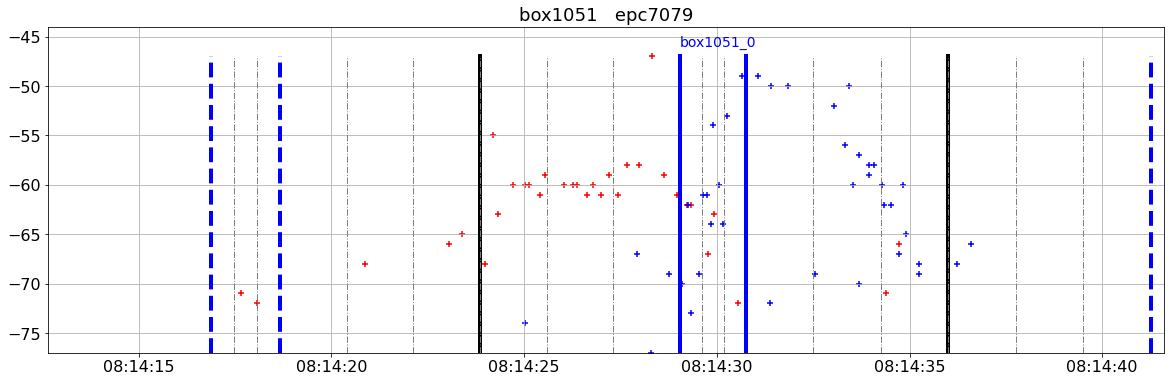

epc12886 3
2020-06-12 14:42:39.111000 2020-06-12 14:43:14.032000


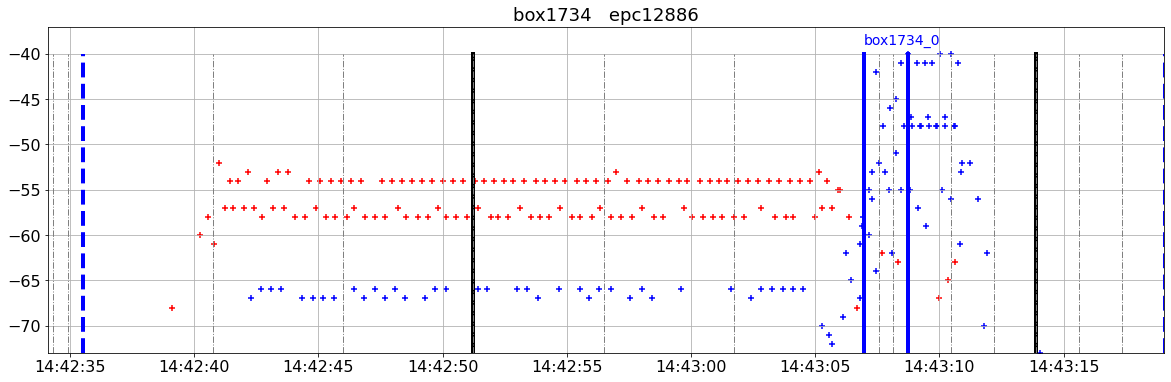

epc7082 3
2020-05-29 08:14:23.379000 2020-05-29 08:14:36.499000


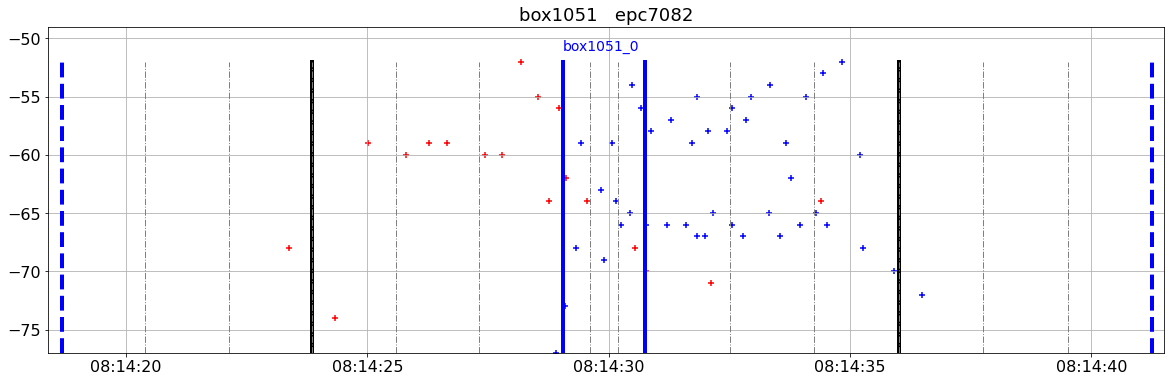

epc12454 3
2020-06-12 08:01:36.458000 2020-06-12 08:04:32.121000


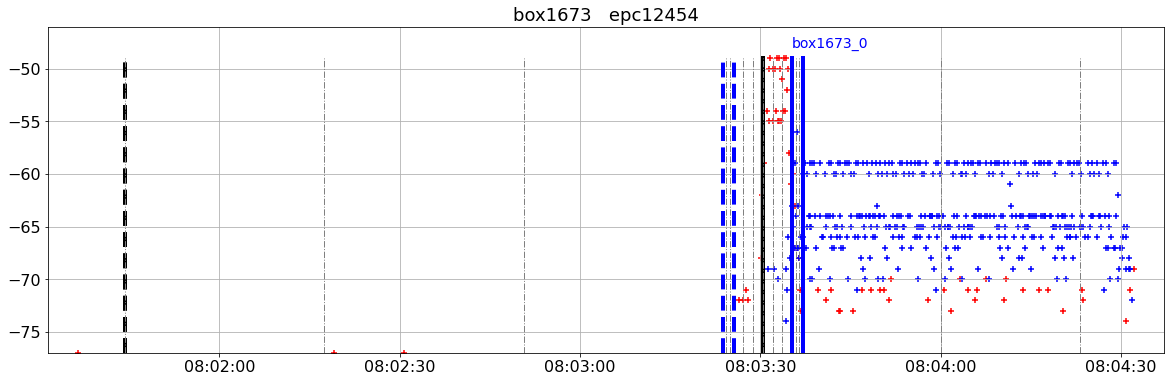

epc11451 3
2020-06-10 14:09:21.426000 2020-06-10 14:16:45.075000


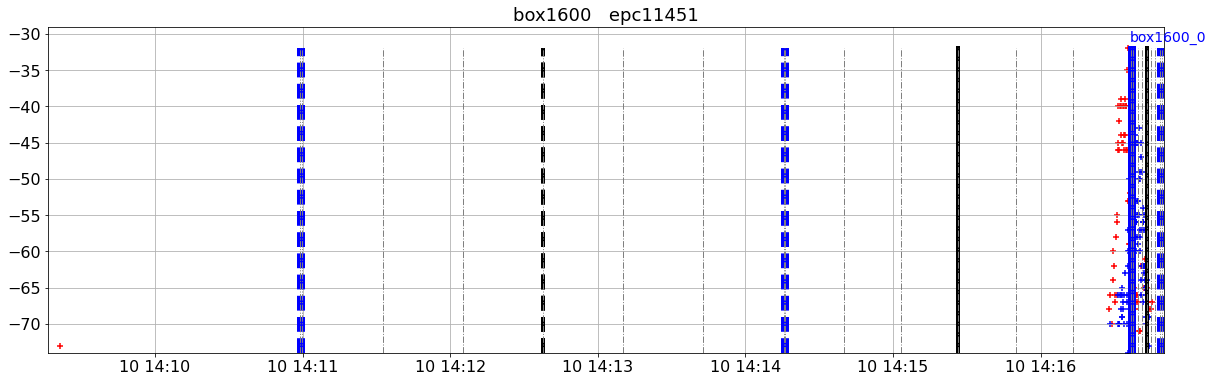

epc5017 3
2020-05-26 07:24:08.557000 2020-05-26 07:24:22.916000


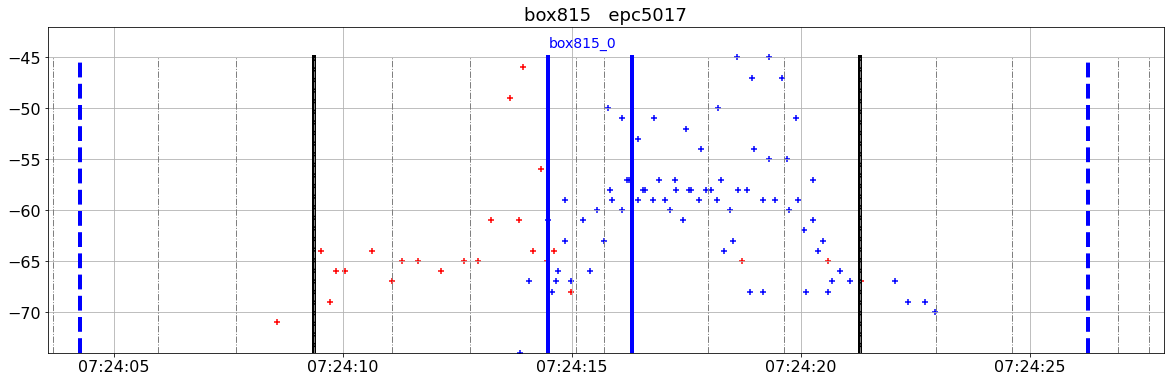

epc12451 3
2020-06-12 08:01:29.059000 2020-06-12 08:04:31.541000


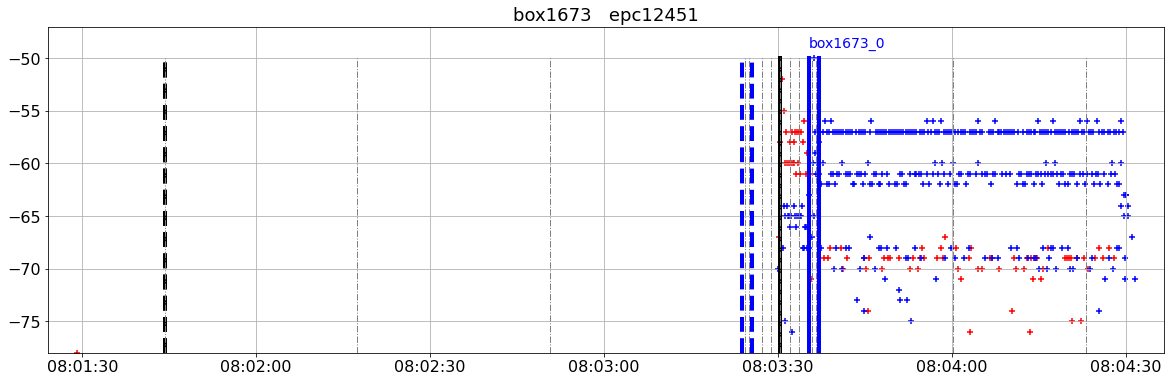

epc3732 3
2020-05-15 07:21:41.006000 2020-05-15 07:22:21.826000


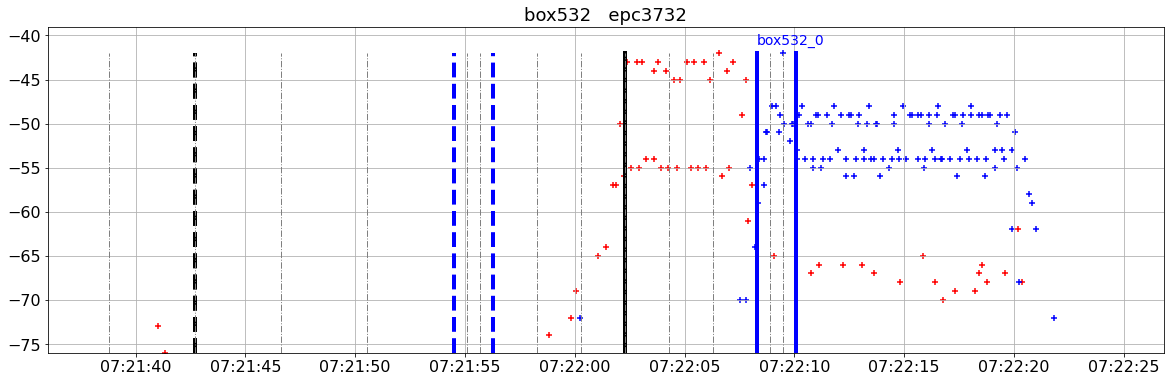

epc11473 3
2020-06-11 14:03:47.712000 2020-06-11 14:04:15.333000


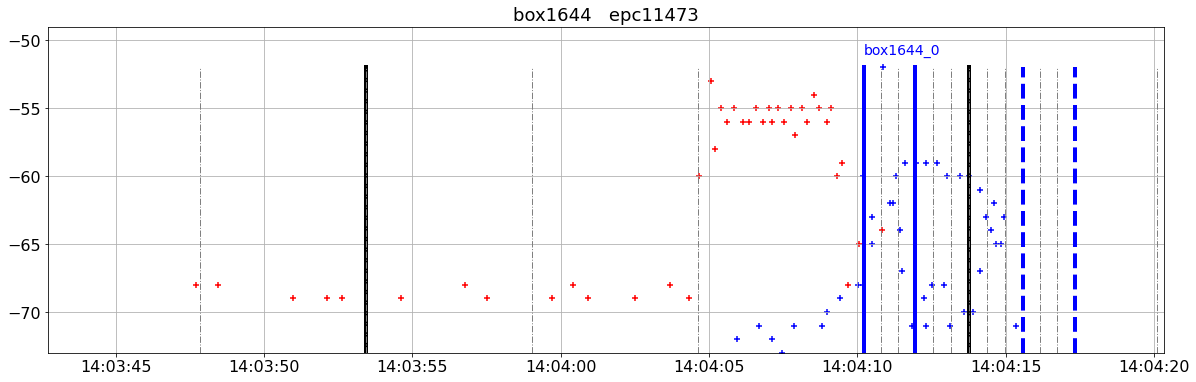

epc12459 3
2020-06-12 08:01:30.298000 2020-06-12 08:04:33.862000


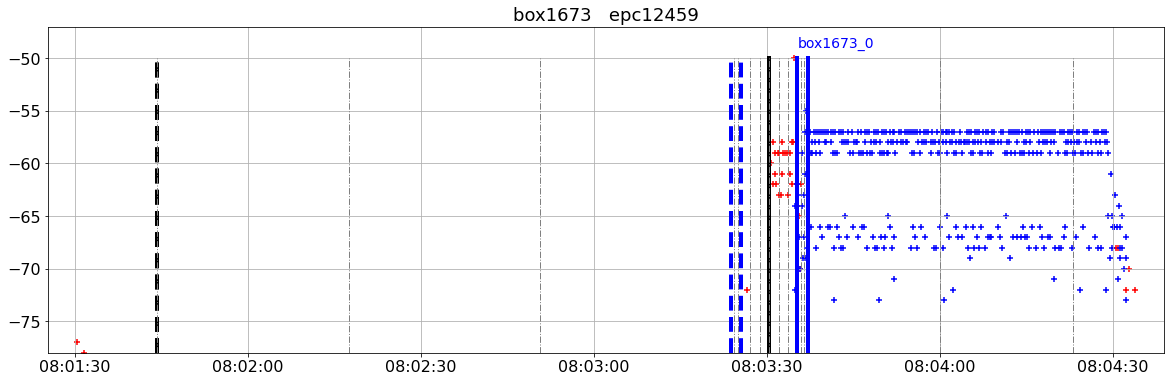

epc11470 3
2020-06-11 14:03:44.952000 2020-06-11 14:04:17.134000


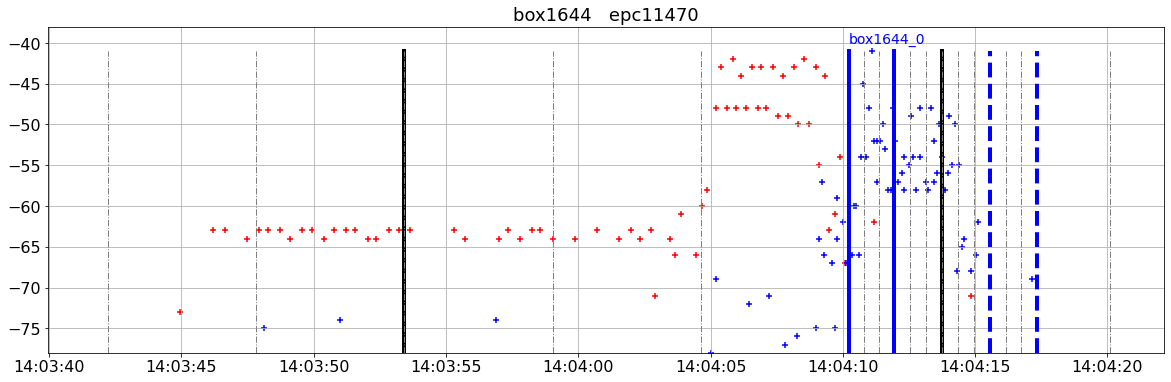

epc11471 3
2020-06-11 14:03:45.991000 2020-06-11 14:04:16.432000


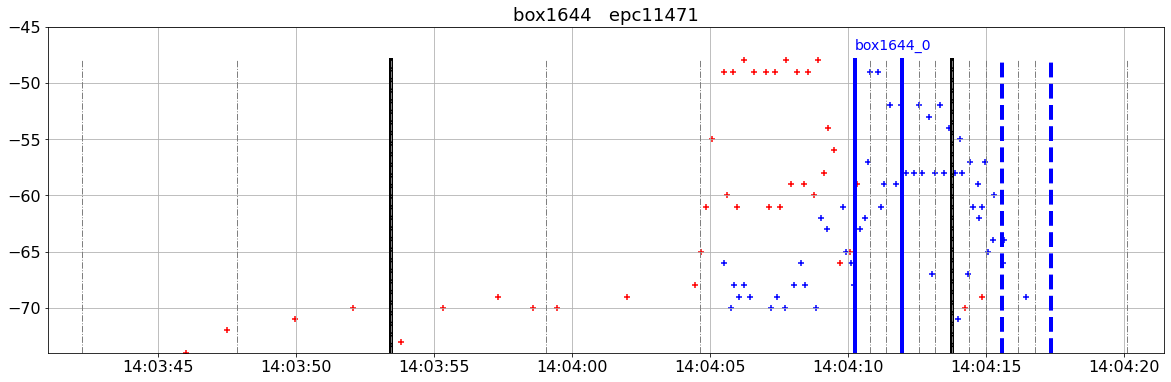

epc11472 3
2020-06-11 14:03:45.772000 2020-06-11 14:04:16.792000


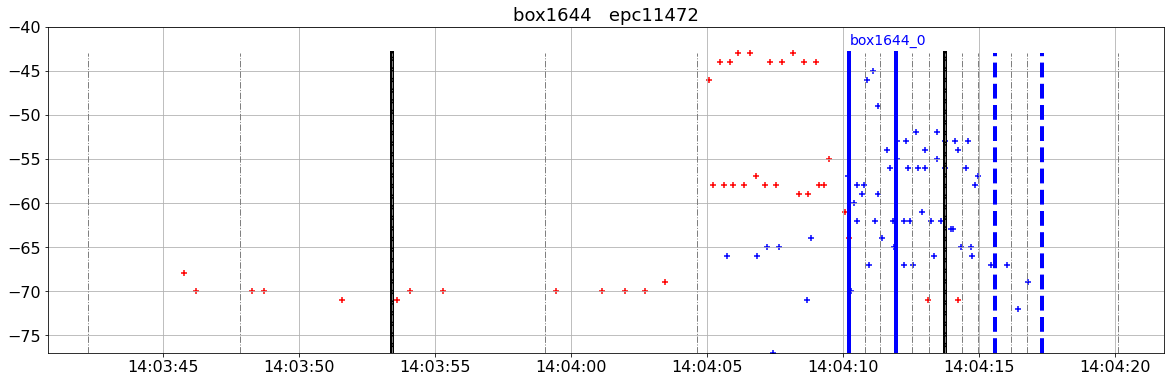

epc698 3
2020-05-06 07:46:22.639000 2020-05-06 07:46:45.119000


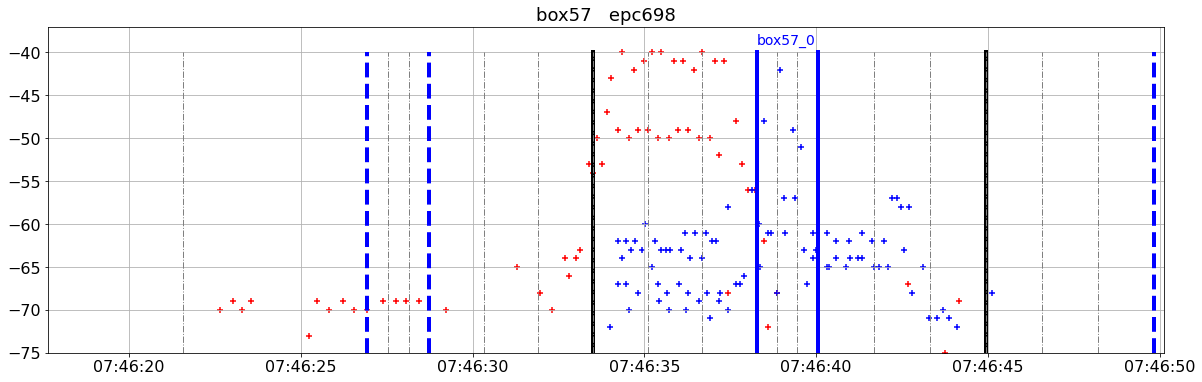

epc5051 3
2020-05-27 14:50:55.216000 2020-05-27 14:51:07.617000


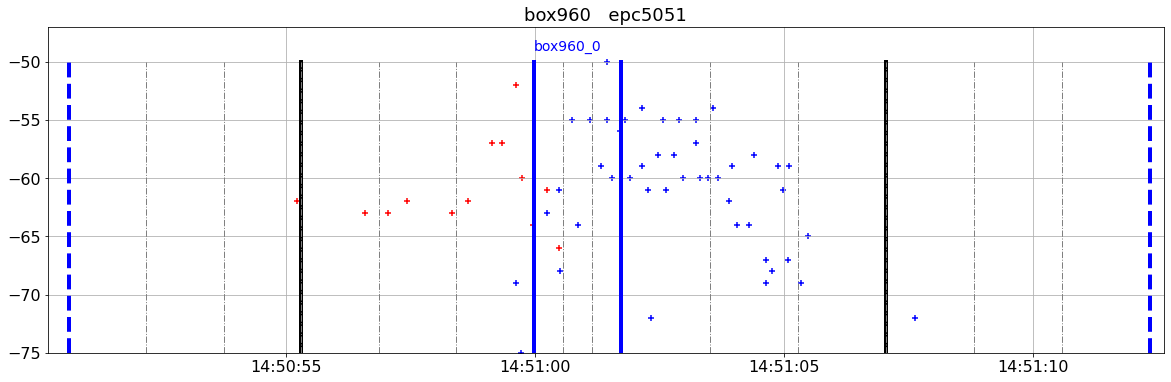

In [35]:
# 
# epc visualisation, detected in several windows
# 
epc_bool=True
box_bool=False
window_bool=False
subslice_bool=False
windows_displayed=[]
subslices_displayed=[]

for i, row in Epc_1run_windows [Epc_1run_windows['windows']>=3] .iterrows():
# tags
    Epc=row['Epc']
    window_nb = row['windows']
    print(Epc, window_nb)
    tags_epc=tags_windows[tags_windows['Epc']==Epc]
    Tmin=tags_epc['LogTime'].min()
    Tmax=tags_epc['LogTime'].max()
    rssi_min=tags_epc['Rssi'].min()
    rssi_max=tags_epc['Rssi'].max()
# windows
    Startup_min=windows[windows['Startup']<Tmin]['Startup'].max()
    Stopdown_max=windows[windows['Stopdown']>Tmax]['Stopdown'].min()
    windows_epc=windows[(windows['Startup']>=Startup_min)&(windows['Stopdown']<=Stopdown_max)]
    windows_displayed=[]
# subslices
    subslices_epc=subslices[subslices['window_run_id'].isin(windows_epc['window_run_id'])]
# Tmin, Tmax
#     Tmin_displayed=pd.Series([Tmin, Startup_min]).min()
#     Tmax_displayed=pd.Series([Tmax, Stopdown_max]).max()
    Tmin_displayed=Tmin
    Tmax_displayed=Tmax
    print(Tmin_displayed, Tmax_displayed)
 
    visu_new (tags_epc, Tmin_displayed, Tmax_displayed, rssi_min, rssi_max, windows_epc, windows_displayed, subslices_epc, \
             epc_bool, box_bool, window_bool)

epc11427 box1560_0
2020-06-10 10:39:20.609000 2020-06-10 10:39:32.511000


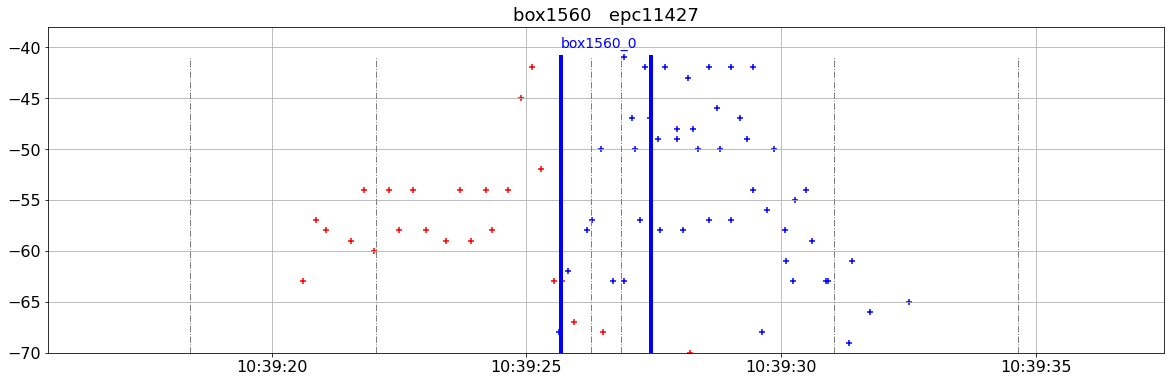

epc11567 box1582_0
2020-06-10 12:23:01.206000 2020-06-10 12:23:09.827000


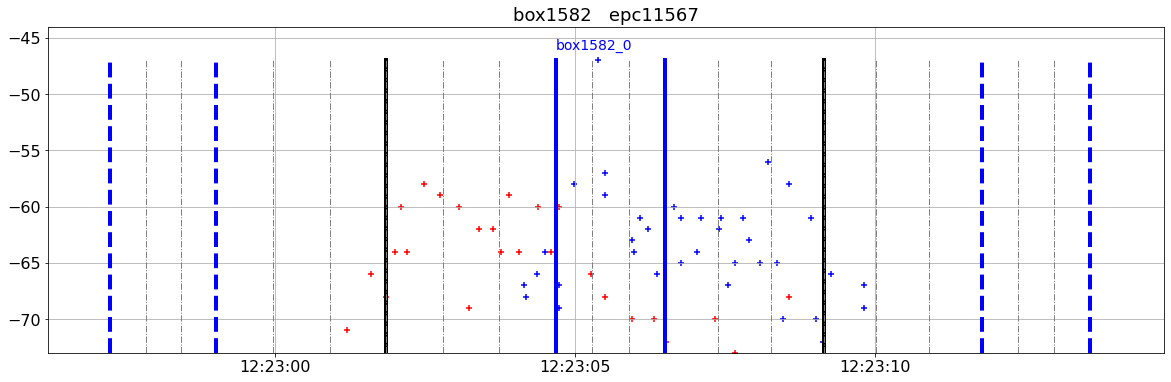

epc12769 box1718_0
2020-06-12 13:30:19.510000 2020-06-12 13:30:34.190000


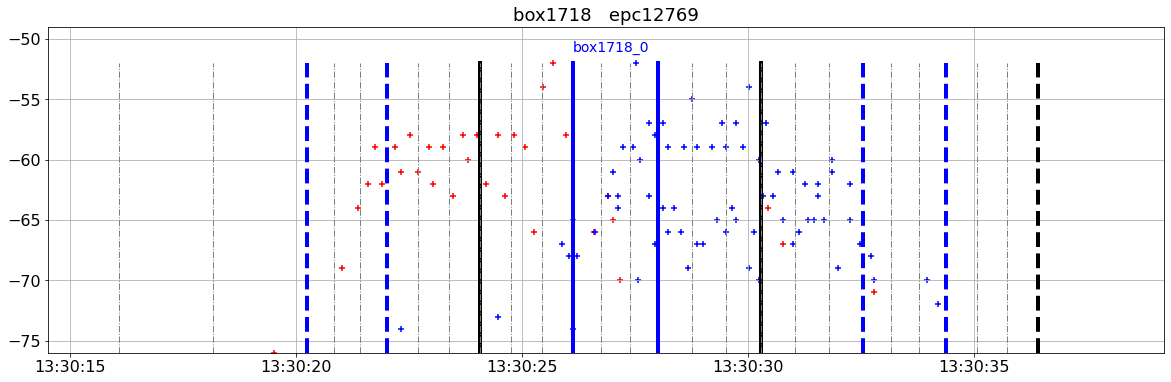

epc35 box82_0
2020-05-06 08:53:02.374000 2020-05-06 08:53:20.415000


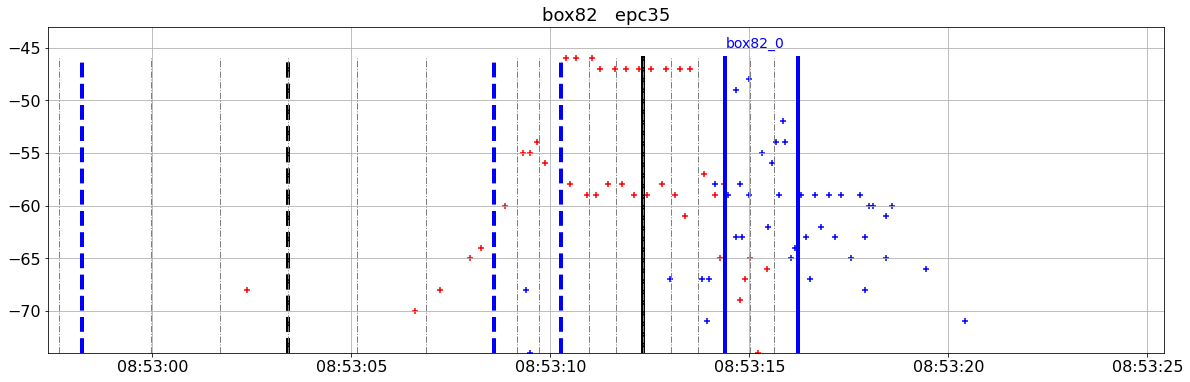

In [36]:
# 
# specific epc visualisation
# 
epc_bool=True
box_bool=False
window_bool=False
subslice_bool=False
windows_displayed=[]
subslices_displayed=[]
# 
temp=pd.DataFrame([\
                   ['epc11427', 'box1560_0'],\
                   ['epc11567', 'box1582_0'],\
                   ['epc12769', 'box1718_0'],\
                   ['epc35', 'box82_0'],\
                  ], columns=['Epc', 'window_run_id'])
for i, row in temp.iterrows():
    Epc = row['Epc']
    window_run_id = row['window_run_id']
    print(Epc, window_run_id)
# tags
    tags_epc=tags_windows[tags_windows['Epc']==Epc]
    Tmin=tags_epc['LogTime'].min()
    Tmax=tags_epc['LogTime'].max()
    rssi_min=tags_epc['Rssi'].min()
    rssi_max=tags_epc['Rssi'].max()
# windows
    Startup_min=windows[windows['Startup']<Tmin]['Startup'].max()
    Stopdown_max=windows[windows['Stopdown']>Tmax]['Stopdown'].min()
    windows_epc=windows[(windows['Startup']>=Startup_min)&(windows['Stopdown']<=Stopdown_max)]
    windows_displayed=[]
# subslices
    subslices_epc=subslices[subslices['window_run_id'].isin(windows_epc['window_run_id'])]
# Tmin, Tmax
#     Tmin_displayed=pd.Series([Tmin, Startup_min]).min()
#     Tmax_displayed=pd.Series([Tmax, Stopdown_max]).max()
    Tmin_displayed=Tmin
    Tmax_displayed=Tmax
    print(Tmin_displayed, Tmax_displayed)
 
    visu_new (tags_epc, Tmin_displayed, Tmax_displayed, rssi_min, rssi_max, windows_epc, windows_displayed, subslices_epc, \
             epc_bool, box_bool, window_bool)

box1582
2020-06-10 12:23:01.066000 2020-06-10 12:23:11.186000


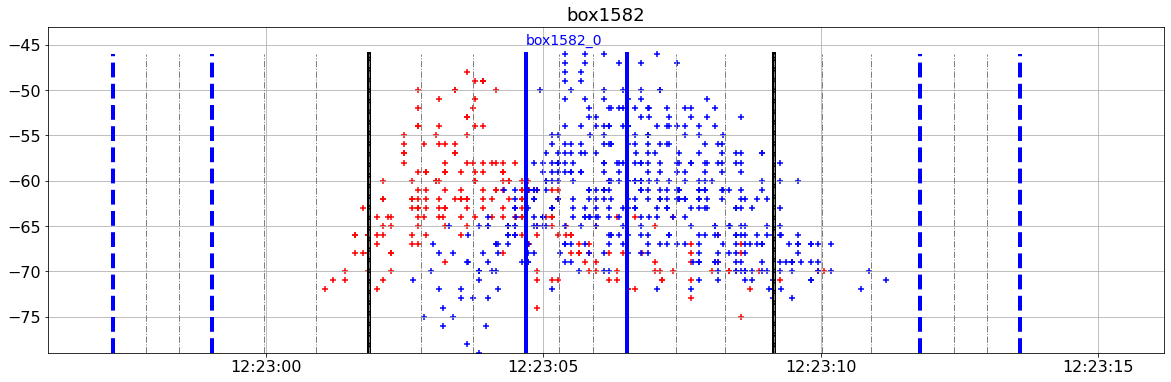

box1717
2020-06-12 13:30:06.030000 2020-06-12 13:30:29.149000


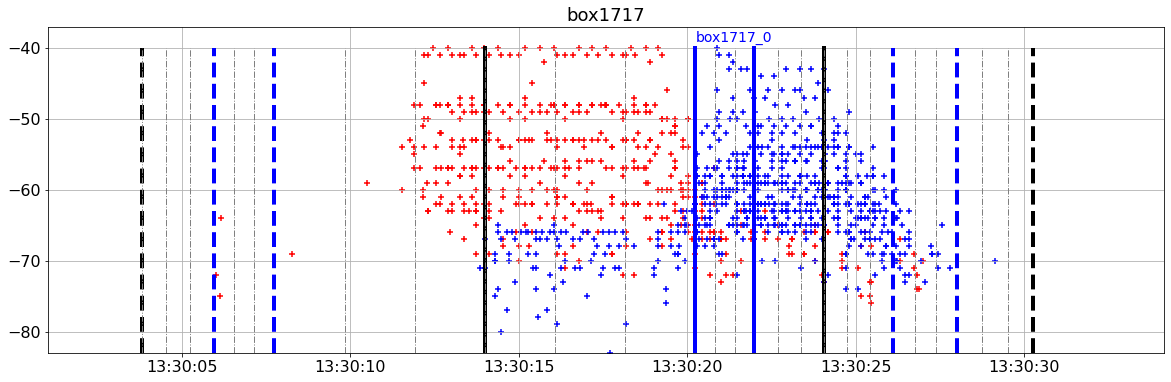

box485
2020-05-14 10:58:30.352000 2020-05-14 11:04:33.380000


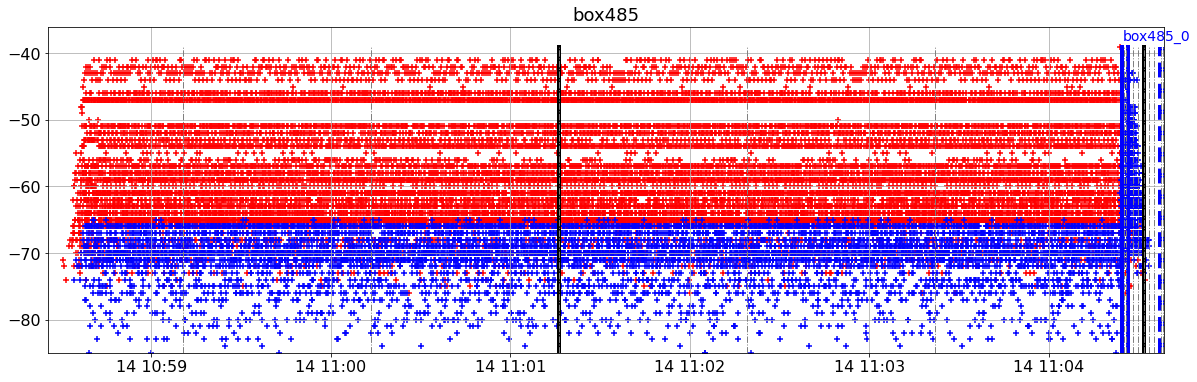

box446
2020-05-13 14:46:29.898000 2020-05-13 14:47:18.559000


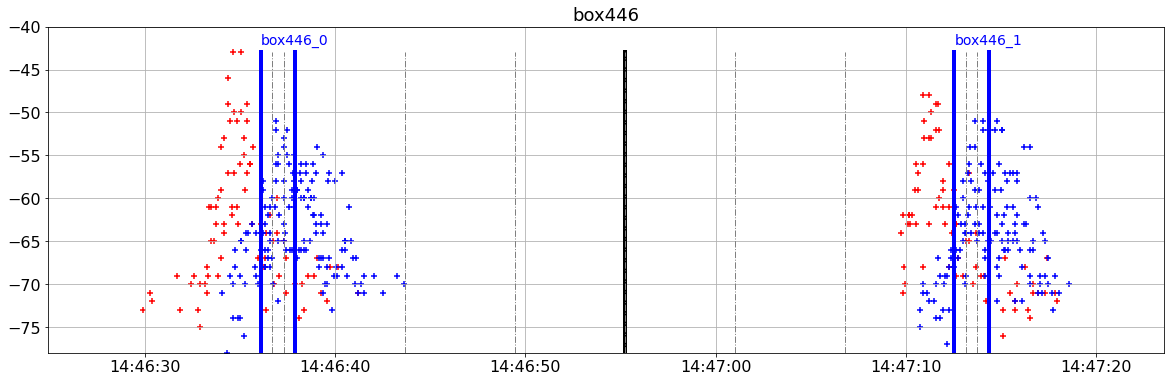

box538
2020-05-15 08:04:41.414000 2020-05-15 08:07:46.377000


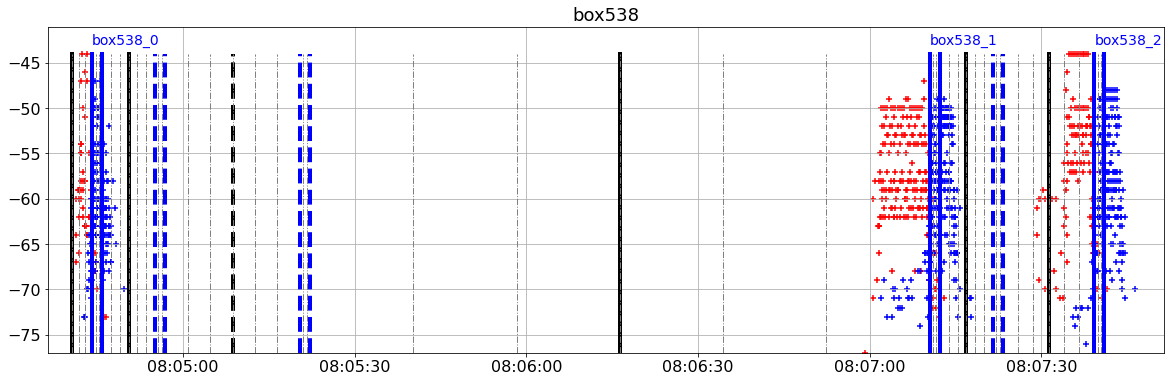

box635
2020-05-20 09:33:59.265000 2020-05-20 09:34:36.586000


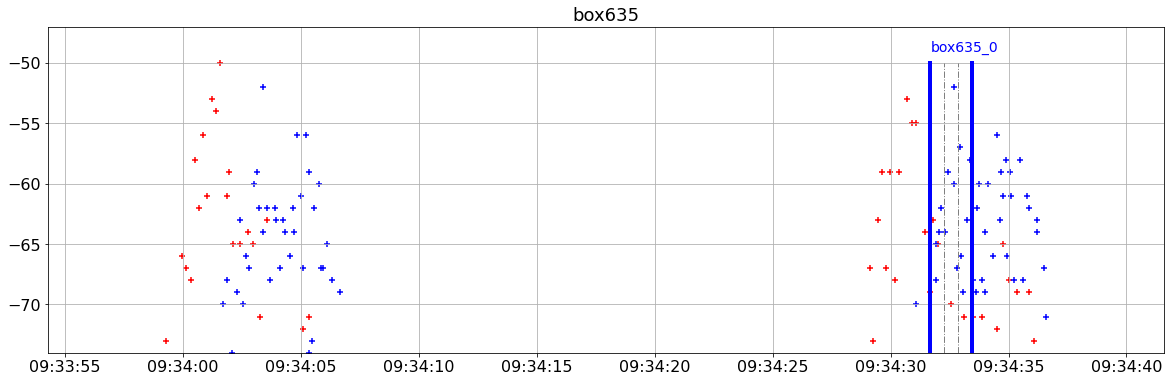

box1682
2020-06-12 08:13:42.372000 2020-06-12 08:28:53.189000


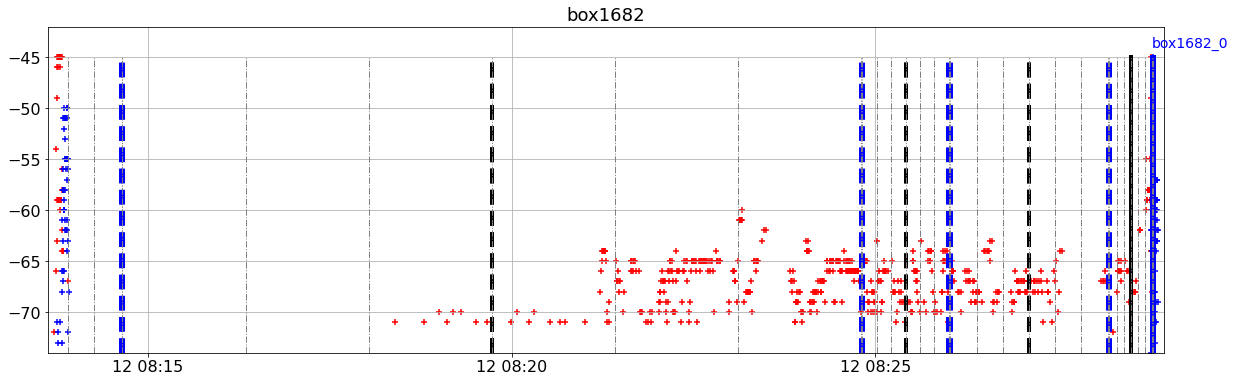

box1718
2020-06-12 13:30:15.409000 2020-06-12 13:30:34.190000


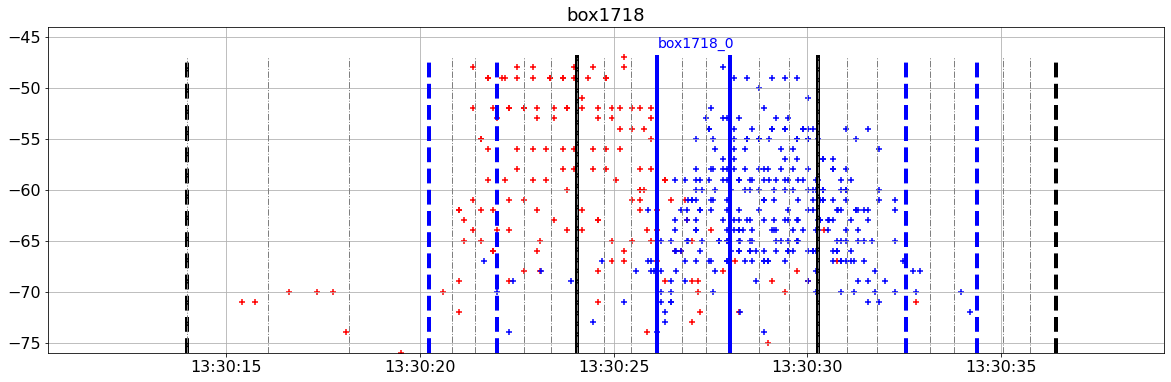

In [41]:
# 
# specific boxes
# 
epc_bool=False
box_bool=True
window_bool=False
subslice_bool=False
windows_displayed=[]
subslices_displayed=[]

box_visu=['box1582', 'box1717', 'box485', 'box446', 'box538', 'box635', 'box1682', 'box1718']

for box in box_visu:
    print(box)
# box
    tags_box=tags_windows [(tags_windows['box']==box)]
    Tmin=tags_box['LogTime'].min()
    Tmax=tags_box['LogTime'].max()
    rssi_min=tags_box['Rssi'].min()
    rssi_max=tags_box['Rssi'].max()
# boxes
    Startup_min=windows[windows['Startup']<Tmin]['Startup'].max()
    Stopdown_max=windows[windows['Stopdown']>Tmax]['Stopdown'].min()
    boxes_box=windows[(windows['Startup']>=Startup_min)&(windows['Stopdown']<=Stopdown_max)]
    windows_displayed=[]
# subslices
    subslices_box=subslices[subslices['window_run_id'].isin(boxes_box['window_run_id'])]
# Tmin, Tmax
#     Tmin_displayed=pd.Series([Tmin, Startup_min]).min()
#     Tmax_displayed=pd.Series([Tmax, Stopdown_max]).max()
    Tmin_displayed=Tmin
    Tmax_displayed=Tmax
    print(Tmin_displayed, Tmax_displayed)
 
    visu_new (tags_box, Tmin_displayed, Tmax_displayed, rssi_min, rssi_max, boxes_box, windows_displayed, subslices_box, \
             epc_bool, box_bool, window_bool)

In [42]:
# 
# 
# 

In [37]:
def analytical(tags, subslices):
    ana = tags.groupby(['Epc', 'window_run_id', 'subslice_id', 'loc'])['Rssi'].max()\
            .unstack('loc', fill_value=-110).reset_index(drop=False)
# 
    order=pd.DataFrame(subslices['subslice_id'].unique(), columns=['subslice_id'])
    order['order']=order.index
#     
    ana=pd.merge(ana, order, on='subslice_id', how='left')
    ana = ana [['Epc', 'window_run_id', 'subslice_id', 'in', 'out', 'order']]
# last subslice_id with out>in
    ana_out =ana [ ana['out']>ana['in'] ] \
        .sort_values(['Epc', 'window_run_id', 'order'], ascending=False) \
        .drop_duplicates(['Epc', 'window_run_id'])
# first subslice_id with in/out   
    ana_in =ana [ ana['in']>ana['out'] ] \
        .sort_values(['Epc', 'window_run_id', 'order'], ascending=True) \
        .drop_duplicates(['Epc', 'window_run_id'])
# 
    ana = pd.merge(ana_in, ana_out, on=['Epc', 'window_run_id'], suffixes=['_IN', '_OUT'], how='inner')\
            .sort_values(['Epc', 'window_run_id'])
    ana = pd.merge(ana, reflist, on='Epc', how='left')
#                
    ana['pred_ana_bool']= ana['window_run_id'].apply(lambda x:x.split('_')[0]) == ana['box']
# 
    return ana

In [40]:
Windows_names={'restricted':['up', 'mid'], 'full':['up', 'mid', 'down'], 'all':['up', 'mid', 'down'], 'mid':['mid'], np.nan:[]}
# 
Features_rf=pd.DataFrame([\
                      ['rssi_all & rc_all', True, 'all', True, 'all'],\
                      ['rssi_all & rc_mid', True, 'all', True, 'mid'],\
                      ['rssi_all', True, 'all', False, np.nan],\
                      ['rc_all', False, np.nan, True, 'all'],\
                     ], columns=['features_rf', 'rssi', 'rssi_windows', 'rc', 'rc_windows'])

In [41]:
Features_rf

features_rf   rssi rssi_windows     rc rc_windows
0  rssi_all & rc_all   True          all   True        all
1  rssi_all & rc_mid   True          all   True        mid
2           rssi_all   True          all  False        NaN
3             rc_all  False          NaN   True        all

In [42]:
#
# champion parameters (see parametric analysis)
# 
# 
# Observations=['restricted', 'full']
# 
observation = 'restricted'
# 
# tags_windows
# steps=4
# tags_windows, subslices = TagsWindows(tags_reflist, steps)
#
# features_rf
# 
features_rf='rssi_all & rc_all'
# 
# classifier
# 
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
param_clf ={'n_estimators':[100, 125, 150, 175], 'max_depth':[10]}


In [43]:
# 
# observation: tags_windows ==> tags_obs
# 
subslices_obs = Windows_names[observation]
tags_obs = tags_windows [ tags_windows['subslice_id'].apply(lambda x:x.split('_')[0] in subslices_obs) ]

In [44]:
# 
# analytical
# 
ana_obs = analytical(tags_obs, subslices)
Q_detected = tags_obs['Epc'].nunique()
ana_perf = ana_obs [ana_obs['pred_ana_bool']]['Epc'].nunique()/ Q_detected
print(ana_perf)

0.9809692580322059


In [45]:
ana_obs.head()

Epc window_run_id subslice_id_IN  in_IN  out_IN  order_IN  \
0     epc0      box238_0          mid_0  -61.0   -69.0         3   
1     epc1      box238_0          mid_0  -61.0   -69.0         3   
2    epc10       box74_0          mid_0  -60.0   -69.0         3   
3   epc100       box55_0          mid_0  -55.0   -58.0         3   
4  epc1000      box179_0          mid_0  -49.0   -60.0         3   

  subslice_id_OUT  in_OUT  out_OUT  order_OUT     box   Q  runs_box  \
0            up_2   -72.0    -58.0          2  box238   2         1   
1            up_2   -68.0    -54.0          2  box238   2         1   
2            up_1  -110.0    -68.0          1   box74   7         1   
3            up_2   -62.0    -52.0          2   box55  12         1   
4            up_2   -59.0    -47.0          2  box179  12         1   

   pred_ana_bool  
0           True  
1           True  
2           True  
3           True  
4           True

In [46]:
# 
# reduction of Xcols to the selected features
# 
def Xcols_func(features_rf, Xcols):
#     
    Features_rf_temp = Features_rf [Features_rf['features_rf']==features_rf]
    Xcols_s = pd.Series(Xcols, name='features')
# 
    rssi = Features_rf_temp ['rssi'].values[0]
    rssi_windows = Windows_names [Features_rf_temp['rssi_windows'].values[0]]
    rc = Features_rf_temp['rc'].values[0]
    rc_windows = Windows_names [Features_rf_temp['rc_windows'].values[0]]
#     
    X_rssi=pd.Series()
    for wind in rssi_windows:
        temp = Xcols_s [ Xcols_s.apply(lambda x:(rssi*'rssi' in x.split('_')) and (wind in x.split('_')) ) ]
        X_rssi = X_rssi.append(temp)
#   
    X_rc=pd.Series()
    for wind in rc_windows:
        temp = Xcols_s [ Xcols_s.apply(lambda x:(rc*'rc' in x.split('_')) and (wind in x.split('_')) ) ]
        X_rc = X_rc.append(temp)
# 
    X=X_rssi.append(X_rc)
#        
    return X.to_list()

In [55]:
# 
# ds: 
# sample: one tag in one window
# features: rssi_max and readcount in subslices with all antennas (IN, OUT)
# 
def dataset(tags):
    ds_rssi = tags.groupby(['Epc', 'window_run_id', 'subslice_id', 'loc'])['Rssi'].max()\
            .unstack(['subslice_id', 'loc'], fill_value=-110)
    ds_rssi.columns = [x[0]+'_'+x[1] for x in ds_rssi.columns]
    ds_rssi = ds_rssi.reset_index(drop=False)
# 
    ds_rc = tags.groupby(['Epc', 'window_run_id', 'subslice_id', 'loc']).size()\
            .unstack(['subslice_id', 'loc'], fill_value=0)
    ds_rc.columns = [x[0]+'_'+x[1] for x in ds_rc.columns]
    ds_rc = ds_rc.reset_index(drop=False)
#     
    ds = pd.merge(ds_rssi, ds_rc, on=['Epc', 'window_run_id'], suffixes=['_rssi', '_rc'])
    return ds

In [55]:

ds.head()

NameError: name 'ds' is not defined

In [56]:
ds.shape, tags_obs.shape

NameError: name 'ds' is not defined

In [57]:
ds[['Epc', 'window_run_id', 'actual']].head()

NameError: name 'ds' is not defined

In [60]:
# 
# Machine Learning
# 
ds = dataset(tags_obs)
Xcols = ds.columns[2:]
# actual: in or 2 out, 2 classes
ds = pd.merge(ds, reflist, on='Epc', how='left')
ds.loc[:, 'actual'] = (ds.loc[:, 'window_run_id'].apply(lambda x:x.split('_')[0]) == ds.loc[:, 'box'])\
                            .map({True:'in', False:'out'})
# Xcols reduction to subslices_obs
Xcols_obs =[x for x in Xcols if x.split('_')[0] in subslices_obs ]
# Xcols reduction to features_rf
Xcols_feat = Xcols_func(features_rf, Xcols_obs)
# X, y
X = ds.loc[:, Xcols_feat]
y = ds.loc[:, 'actual']
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
# GridSearchCV
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(\
                classifier,\
                param_grid=param_clf,\
                cv=50)
gs.fit(X_std, y)
print (gs.best_score_, gs.best_params_)

<ipython-input-53-6dffe10cbbb6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rssi=pd.Series()
<ipython-input-53-6dffe10cbbb6>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rssi*'rssi' in x.split('_')) and (wind in x.split('_')) ) ]
<ipython-input-53-6dffe10cbbb6>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rc=pd.Series()
<ipython-input-53-6dffe10cbbb6>:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rc*'rc' in x.split('_')) and (wind in x.split('_')) ) ]


0.9976294437270048 {'max_depth': 10, 'n_estimators': 175}


In [59]:
# 
# retries in ds, objective: identify error Epcs
# 
# classifier parameters extracted from gs
clf = RandomForestClassifier(\
                n_estimators=gs.best_params_['n_estimators'],\
                max_depth=gs.best_params_['max_depth'],\
               )
# pred_ml stores prediction results: [Epc, Window_run_id, actual, pred_ml]
pred_ml=pd.DataFrame()
retries=50
for retry in range(retries):
#     
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, stratify=y)
#     
    scaler = MinMaxScaler()
    scaler.fit(Xtrain)
    Xtrain_std = scaler.transform(Xtrain)
    Xtest_std = scaler.transform(Xtest)
#     
    clf.fit(Xtrain_std, ytrain)
#     
    ypred = clf.predict(Xtest_std)
#     
    print (retry, (ytest==ypred).mean())
    ypred_series = pd.Series(ypred, index=ytest.index, name='pred_ml')
    temp = ds.loc[ytest.index, ['Epc', 'window_run_id', 'actual']]
    temp = temp.join(ypred_series)
    temp.loc[:, 'retry'] = retry
    pred_ml = pred_ml.append(temp)
#     
pred_ml.loc[:, 'pred_ml_bool'] = (pred_ml.loc[:, 'actual']==pred_ml.loc[:, 'pred_ml'])
pred_ml = pred_ml [['Epc', 'window_run_id', 'actual', 'pred_ml', 'pred_ml_bool', 'retry']]

0 0.9965132496513249
1 0.9965132496513249
2 0.999302649930265
3 0.9965132496513249
4 0.9968619246861925
5 0.9965132496513249
6 0.99721059972106
7 0.99721059972106
8 0.99721059972106
9 0.997907949790795
10 0.9961645746164575
11 0.997907949790795
12 0.9975592747559274
13 0.9965132496513249
14 0.9975592747559274
15 0.9975592747559274
16 0.9965132496513249
17 0.9982566248256625
18 0.99721059972106
19 0.997907949790795
20 0.9965132496513249
21 0.9975592747559274
22 0.9989539748953975
23 0.9965132496513249
24 0.99581589958159
25 0.99581589958159
26 0.99721059972106
27 0.9968619246861925
28 0.9968619246861925
29 0.997907949790795
30 0.9965132496513249
31 0.9968619246861925
32 0.997907949790795
33 0.997907949790795
34 0.99721059972106
35 0.9975592747559274
36 0.997907949790795
37 0.997907949790795
38 0.9989539748953975
39 0.9968619246861925
40 0.9982566248256625
41 0.9965132496513249
42 0.99721059972106
43 0.9965132496513249
44 0.9961645746164575
45 0.99860529986053
46 0.9975592747559274
47 0.

In [47]:
pred_ml[:1]

NameError: name 'pred_ml' is not defined

In [62]:
pred_ml['pred_ml_bool'].mean()

0.9972942817294281

In [63]:
tags_obs['Epc'].nunique(), pred_ml ['Epc'].nunique()

(12979, 12978)

In [64]:
ds['Epc'].nunique(), pred_ml [~pred_ml['pred_ml_bool']] ['Epc'].nunique()

(12979, 48)

In [65]:
print(confusion_matrix(pred_ml['actual'], pred_ml['pred_ml']))

[[134386    214]
 [   174   8626]]


In [66]:
print(classification_report(pred_ml['actual'], pred_ml['pred_ml'], digits=4))

              precision    recall  f1-score   support

          in     0.9987    0.9984    0.9986    134600
         out     0.9758    0.9802    0.9780      8800

    accuracy                         0.9973    143400
   macro avg     0.9872    0.9893    0.9883    143400
weighted avg     0.9973    0.9973    0.9973    143400



In [67]:
# error Epc, sorted by the number of occurence
Q_error=pred_ml[~pred_ml['pred_ml_bool']].groupby(['Epc', 'window_run_id']).size().rename('Q').sort_values(ascending=False)\
    .reset_index(drop=False)
error_pred_ml=pred_ml[~pred_ml['pred_ml_bool']].drop_duplicates(['Epc', 'window_run_id']).reset_index(drop=True)
error_pred_ml=pd.merge(error_pred_ml, Q_error, on=['Epc', 'window_run_id'], how='left')\
                .sort_values('Q', ascending=False)
error_pred_ml[:20]

Epc window_run_id actual pred_ml  pred_ml_bool  retry   Q
3    epc4458      box639_0     in     out         False      0  19
11   epc4829      box679_1     in     out         False      1  17
8   epc12437     box1644_0    out      in         False      0  14
19   epc4059      box605_2    out      in         False      3  14
2    epc4842      box849_1     in     out         False      0  13
9    epc7114     box1062_0    out      in         False      0  13
27   epc1272      box170_0     in     out         False      4  12
30   epc8822     box1242_0     in     out         False      6  12
21   epc3010      box476_0    out      in         False      3  12
7    epc4561      box670_0     in     out         False      0  11
6   epc10871     box1458_0     in     out         False      0  11
14   epc4838      box849_0     in     out         False      1  11
37   epc4350      box669_0     in     out         False      8  11
24  epc10720     box1507_0     in     out         False      4  11
43   epc4416      box633_1    out      in         False     11  10
5    epc2676      box478_0     in     out         False      0  10
26   epc4054      box605_1    out      in         False      4  10
25   epc4059      box605_3    out      in         False      4  10
34   epc3666      box519_0     in     out         False      7  10
1    epc4057      box605_2    out      in         False      0  10

17


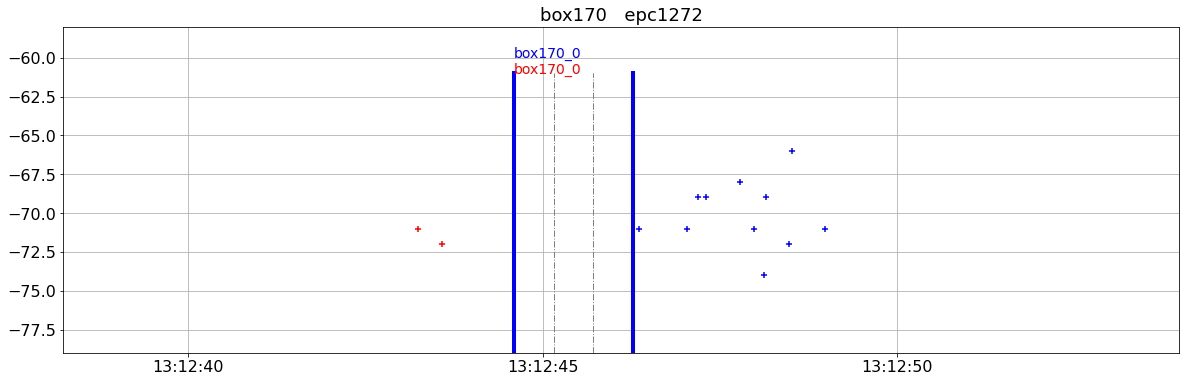

15


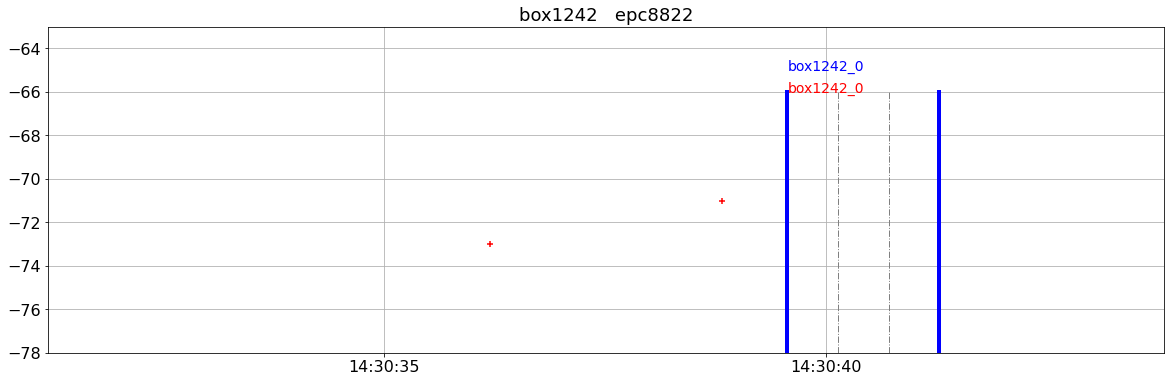

15


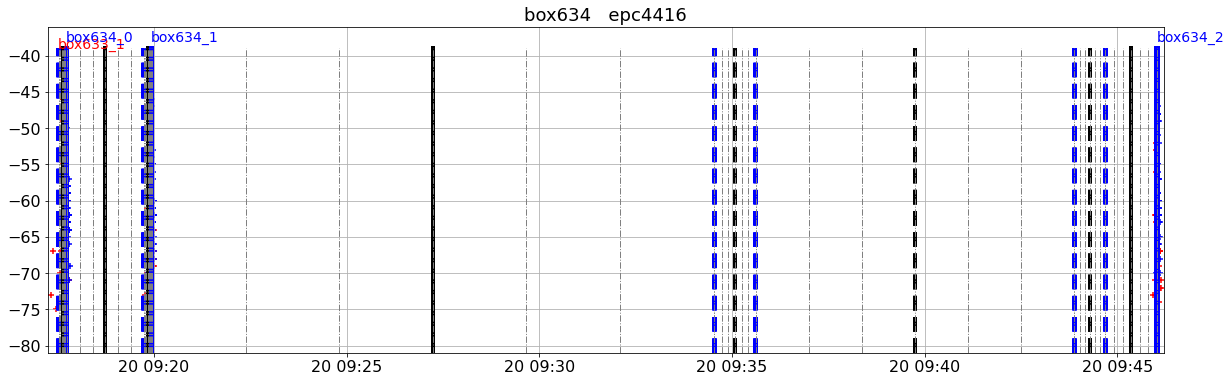

13


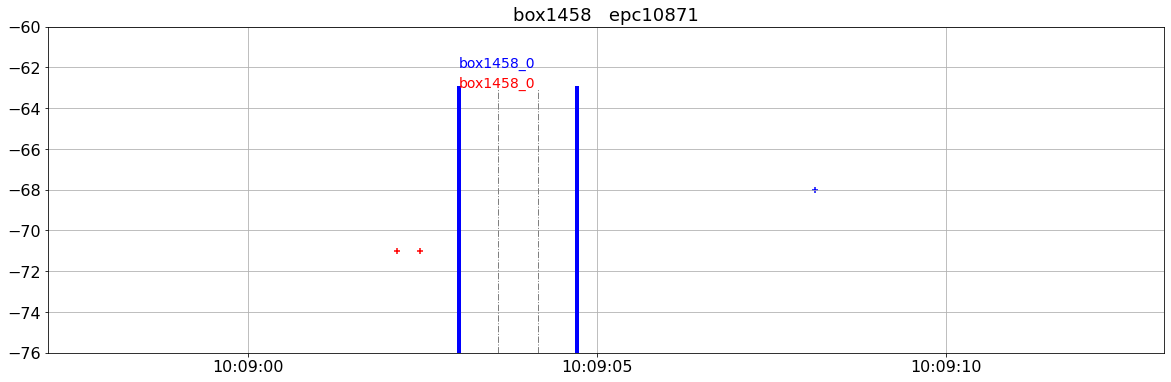

12


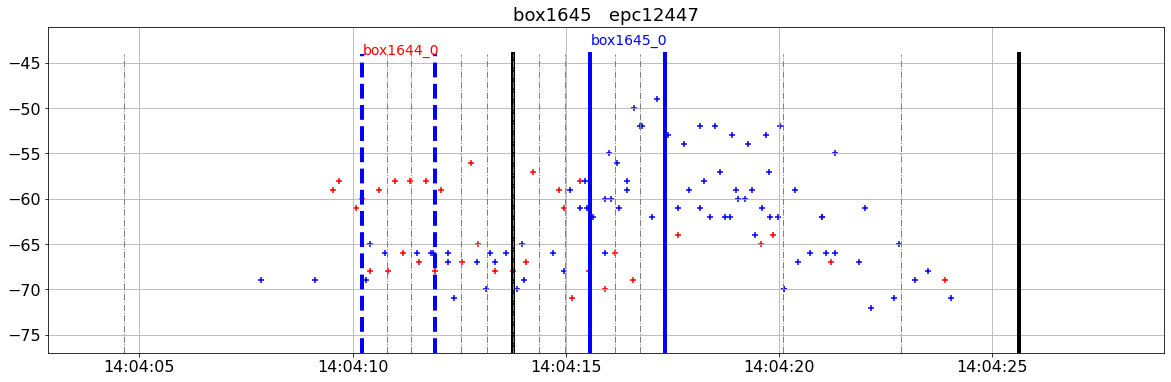

12


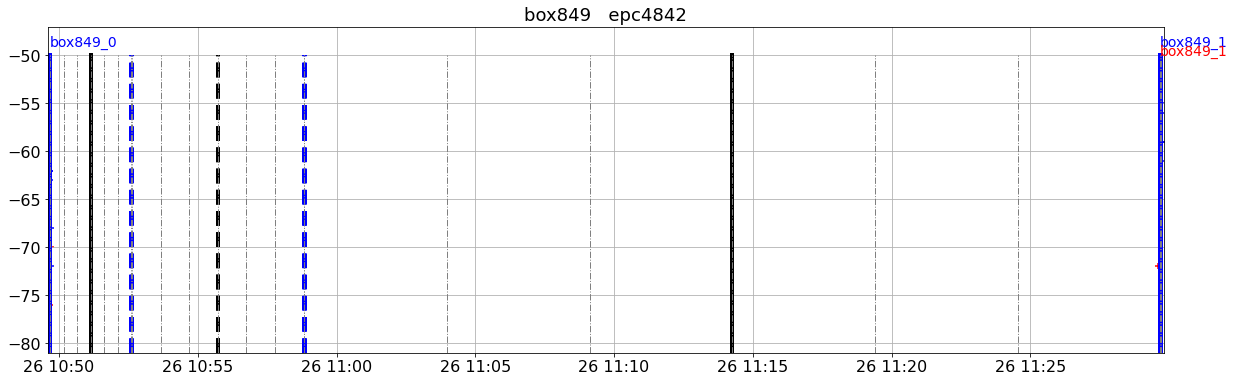

11


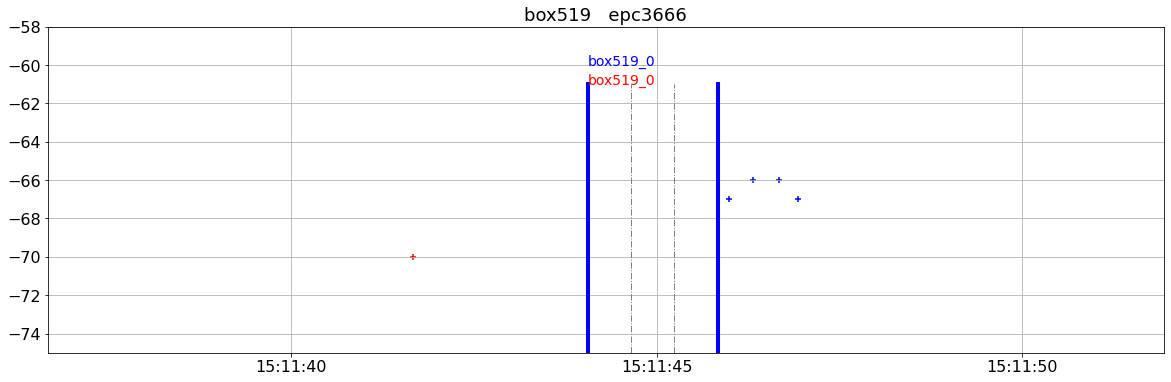

10


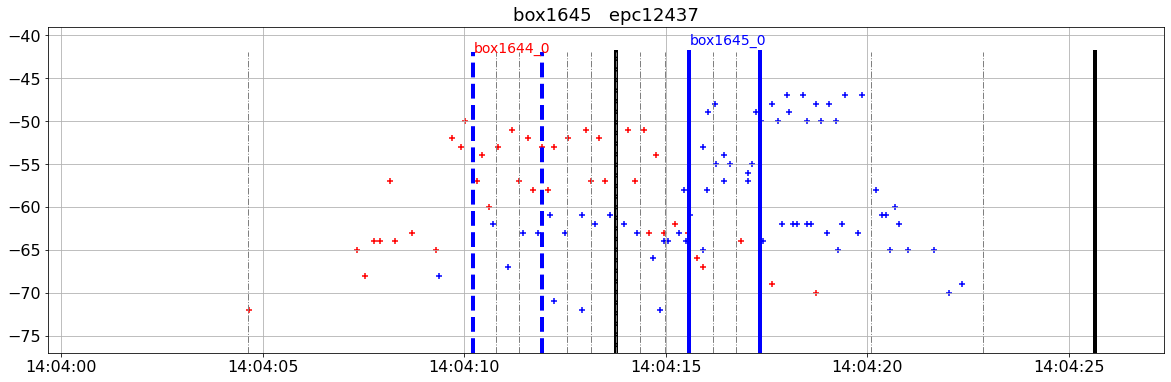

10


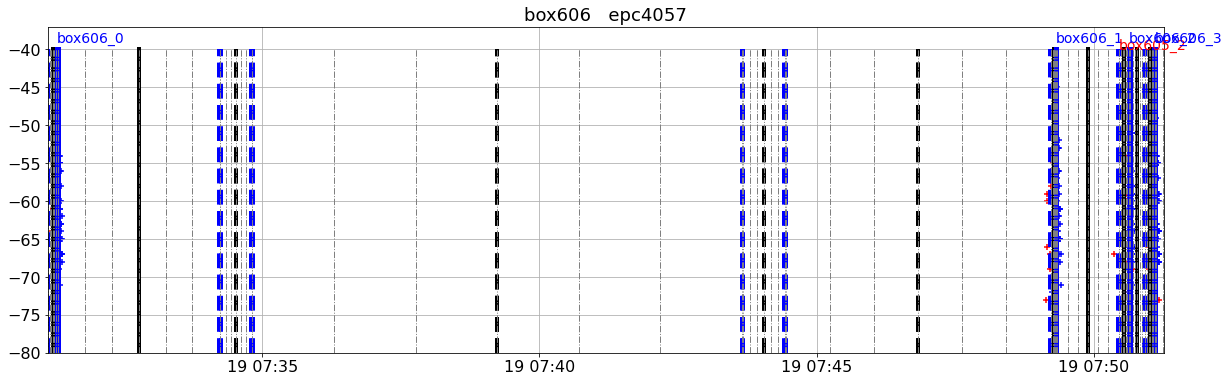

10


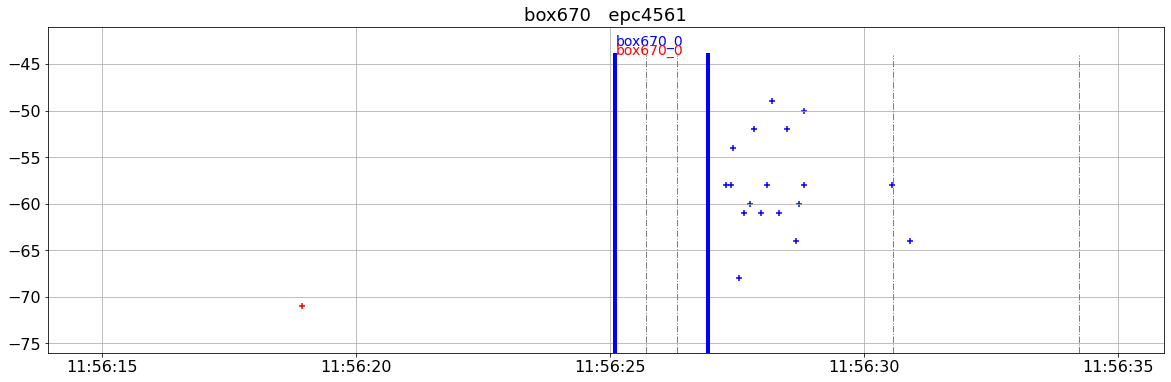

10


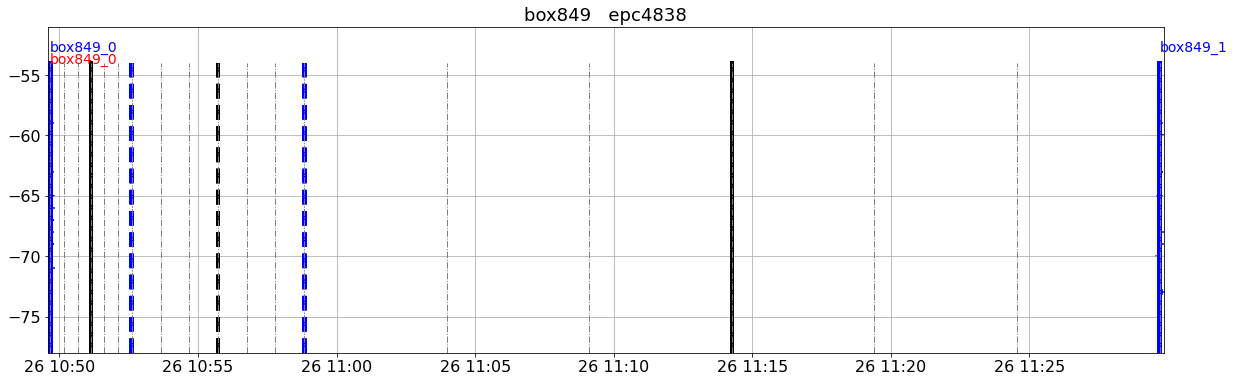

10


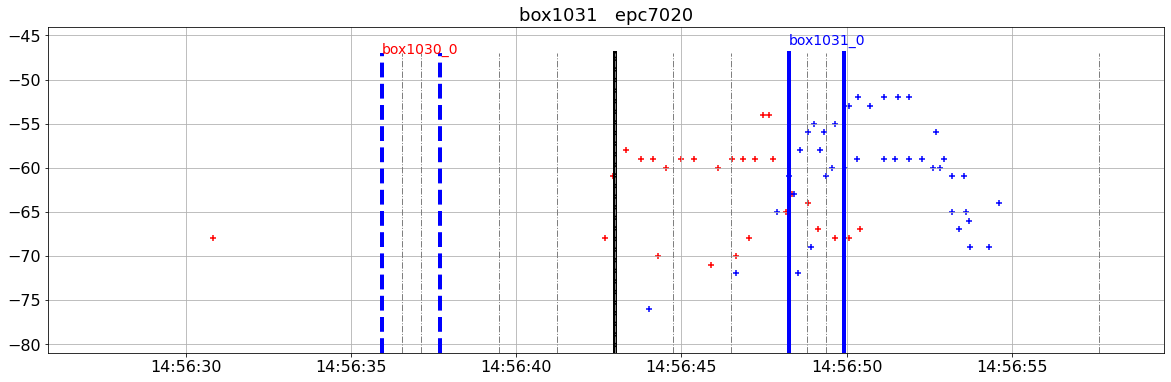

10


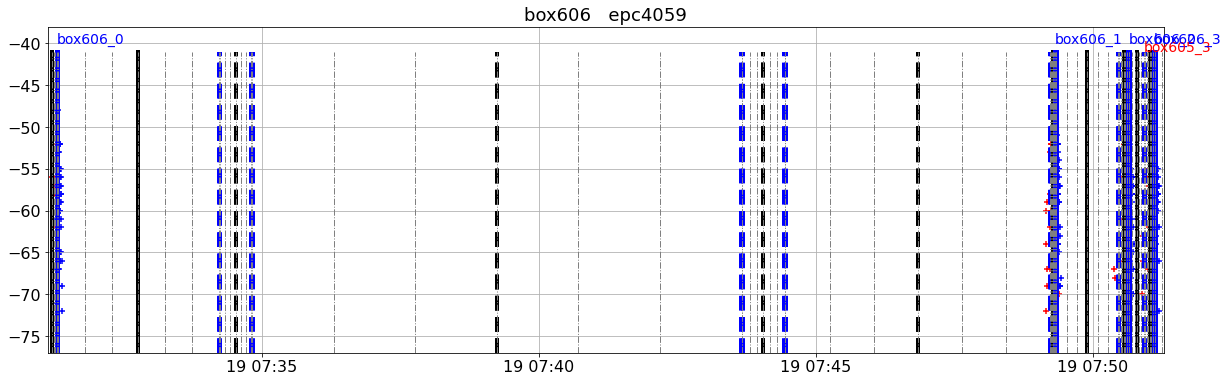

9


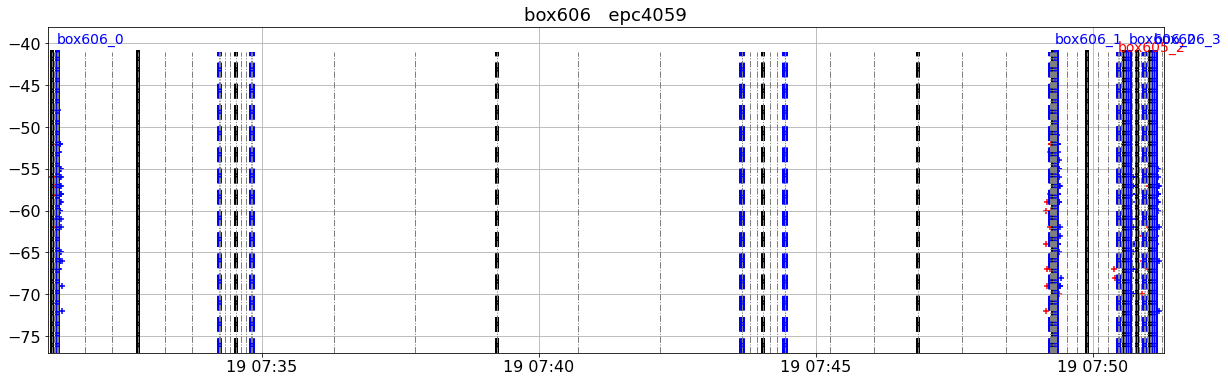

9


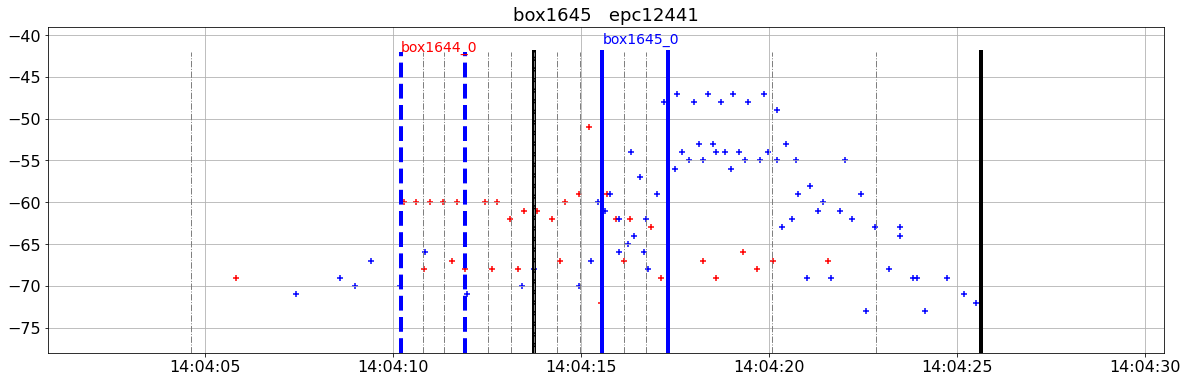

9


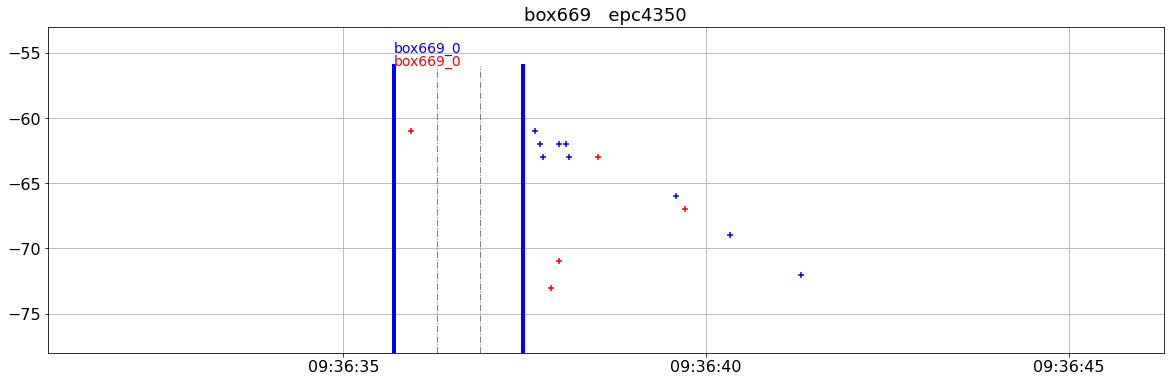

9


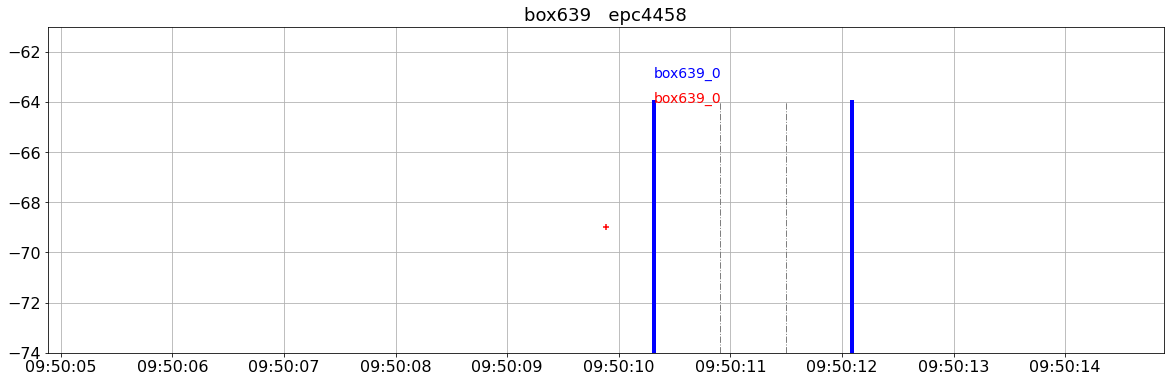

9


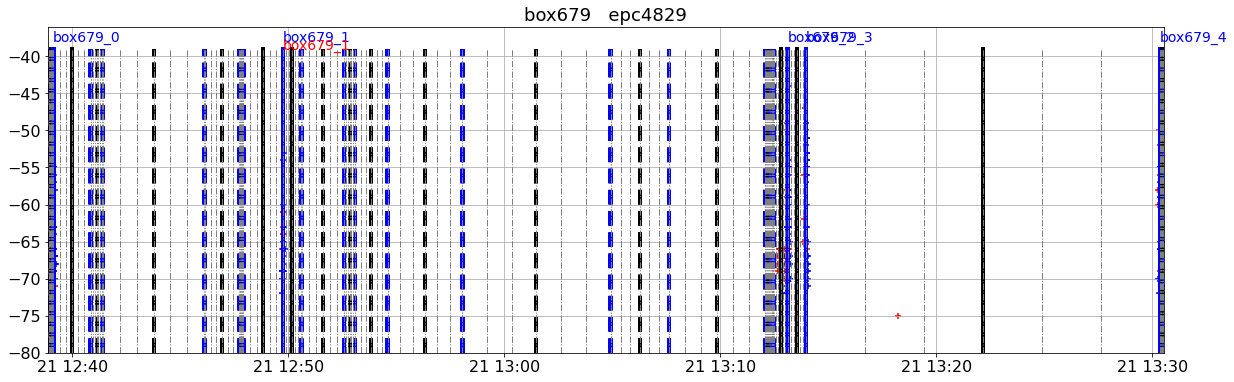

9


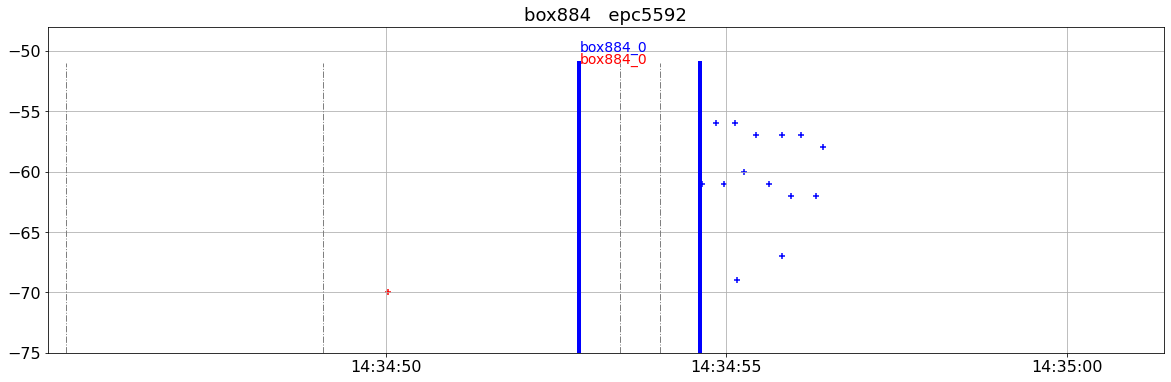

9


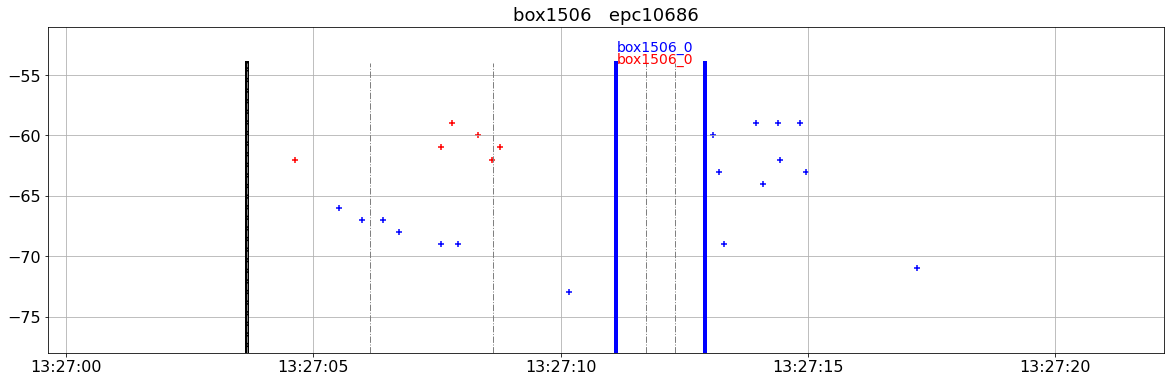

In [66]:
# 
# pred_ml visualization
# 
epc_bool=True
box_bool=False
window_bool=False
subslice_bool=False
windows_displayed=[]
subslices_displayed=[]
# 
for i, row in error_pred_ml[:20].iterrows():
    epc=row['Epc']
    window_run_id=row['window_run_id']
    Q=row['Q']
# tags
    tags_epc=tags_windows [(tags_windows['Epc']==epc)]
    Tmin=tags_epc['LogTime'].min()
    Tmax=tags_epc['LogTime'].max()
    rssi_min=tags_epc['Rssi'].min() -5
    rssi_max=tags_epc['Rssi'].max() +5
# windows
    Startup_min=windows[windows['Startup']<Tmin]['Startup'].max()
    Stopdown_max=windows[windows['Stopdown']>Tmax]['Stopdown'].min()
    windows_epc=windows[(windows['Startup']>=Startup_min)&(windows['Stopdown']<=Stopdown_max)]
    windows_displayed=[window_run_id]
# subslices
    subslices_epc=subslices[subslices['window_run_id'].isin(windows_epc['window_run_id'])]
# Tmin, Tmax
#     Tmin_displayed=pd.Series([Tmin, Startup_min]).min()
#     Tmax_displayed=pd.Series([Tmax, Stopdown_max]).max()
    Tmin_displayed=Tmin
    Tmax_displayed=Tmax
#     print(Tmin_displayed, Tmax_displayed)
#     print(subslices_epc)
    print(Q)
 
    visu_new (tags_epc, Tmin_displayed, Tmax_displayed, rssi_min, rssi_max, windows_epc, windows_displayed, subslices_epc, \
             epc_bool, box_bool, window_bool)

In [ ]:
# 
# parametric analysis
# 

In [48]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

param_svc ={\
           'C':[0.1, 1, 10, 100],\
           'kernel':['linear', 'poly', 'rbf', 'sigmoid'],\
            'gamma':['scale', 'auto'],\
           }
param_lr ={\
           'penalty':['l1', 'l2', 'elasticnet', 'none'],\
           'C':[0.1, 1, 10, 100],\
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\
           }
param_rf ={\
           'n_estimators':[0.1, 1, 10, 100],\
           'max_depth':[1, 5, 10, 20, 100],\
           }
param_knn ={\
             'algorithm': ['auto'],
             'metric': ['manhattan'],
             'n_neighbors': [3, 5, 7],
             'weights': ['uniform', 'distance']\
            }

# champion values


# param_svc ={\
#            'C':[10],\
#            'kernel':['rbf'],\
#             'gamma':['scale'],\
#            }
# param_lr ={\
#            'penalty':['l1'],\
#            'C':[10],\
#             'solver':['liblinear'],\
#            }
# param_rf ={\
#            'n_estimators':[100],\
#            'max_depth':[10],\
#            }
# param_knn ={\
#              'algorithm': ['auto'],
#              'metric': ['manhattan'],
#              'n_neighbors': [3],
#              'weights': ['distance']\
#             }

Classifiers_gs=pd.DataFrame([\
                                 ['SVC', SVC(), param_svc],\
                                 ['LogisticRegression', LogisticRegression(), param_lr],\
                                 ['RandomForest', RandomForestClassifier(), param_rf],\
                                  ['knn', KNeighborsClassifier(), param_knn],\
                                 ], columns=['classifier', 'clf', 'params_gs'])
Classifiers_gs

classifier                       clf  \
0                 SVC                     SVC()   
1  LogisticRegression      LogisticRegression()   
2        RandomForest  RandomForestClassifier()   
3                 knn    KNeighborsClassifier()   

                                           params_gs  
0  {'C': [0.1, 1, 10, 100], 'kernel': ['linear', ...  
1  {'penalty': ['l1', 'l2', 'elasticnet', 'none']...  
2  {'n_estimators': [0.1, 1, 10, 100], 'max_depth...  
3  {'algorithm': ['auto'], 'metric': ['manhattan'...

In [49]:
Features_rf=pd.DataFrame([\
                      ['rssi_all & rc_all', True, 'all', True, 'all'],\
                      ['rssi_all & rc_mid', True, 'all', True, 'mid'],\
                      ['rssi_all', True, 'all', False, np.nan],\
                      ['rc_all', False, np.nan, True, 'all'],\
                     ], columns=['features_rf', 'rssi', 'rssi_windows', 'rc', 'rc_windows'])
Features_rf

features_rf   rssi rssi_windows     rc rc_windows
0  rssi_all & rc_all   True          all   True        all
1  rssi_all & rc_mid   True          all   True        mid
2           rssi_all   True          all  False        NaN
3             rc_all  False          NaN   True        all

In [50]:
Observations=['restricted', 'full']
Observations

['restricted', 'full']

In [51]:
Windows_names={'restricted':['up', 'mid'], 'full':['up', 'mid', 'down'], 'all':['up', 'mid', 'down'], 'mid':['mid'], np.nan:[]}
Windows_names

{'restricted': ['up', 'mid'],
 'full': ['up', 'mid', 'down'],
 'all': ['up', 'mid', 'down'],
 'mid': ['mid'],
 nan: []}

In [85]:
ds_obs_1 = dataset(tags_obs)
Xcols_obs=ds_obs_1.columns[2:]
Xcols_feat = Xcols_func('rssi_all', Xcols_obs)
ds_obs_1 = pd.merge(ds_obs_1, reflist, on='Epc', how='left')
ds_obs_1.loc[:, 'actual'] = (ds_obs_1.loc[:, 'window_run_id'].apply(lambda x:x.split('_')[0]) == ds_obs_1.loc[:, 'box'])\
                            .map({True:'in', False:'out'})

X_feat = ds_obs_1.loc[:, Xcols_feat]
y_feat = ds_obs_1.loc[:, 'actual']
X_std_feat = scaler.fit_transform(X_feat)
print(X_std_feat)


[[0.50666667 0.62650602 0.80246914 0.5890411  0.69620253 0.53947368]
 [0.56       0.6746988  0.72839506 0.60273973 0.72151899 0.52631579]
 [0.61333333 0.55421687 0.66666667 0.60273973 0.55696203 0.        ]
 ...
 [0.         0.63855422 0.         0.57534247 0.60759494 0.        ]
 [0.         0.57831325 0.         0.         0.59493671 0.        ]
 [0.49333333 0.6746988  0.         0.         0.70886076 0.        ]]


In [78]:
print(y_feat)

0        in
1        in
2        in
3        in
4        in
         ..
14333    in
14334    in
14335    in
14336    in
14337    in
Name: actual, Length: 14338, dtype: object


In [81]:
# 
# WARNING: 5000sec
# 
# 
# parameters scanning: window_size, steps
# 
start=time.time()
Results = pd.DataFrame()
scaler = MinMaxScaler()
# 
pred_ana_all = pd.DataFrame()
# Steps, Observations, Features_rf, Classifiers, gs_param
Steps = [2, 3, 4, 5]
for steps in Steps:
#     
    print(steps)
    tags_windows_steps, subslices_steps = TagsWindows (tags_reflist, steps)
    print('tags_windows_steps')
# observations
    for observation in Observations: 
        print(observation)
        subslices_obs = Windows_names[observation]
        tags_obs = tags_windows_steps [tags_windows_steps['subslice_id']\
                                                   .apply(lambda x:x.split('_')[0] in subslices_obs)]
#       analytical
        ana_obs = analytical(tags_obs, subslices_steps)        
        Q_detected = tags_obs['Epc'].nunique()
        ana_perf = ana_obs [ana_obs['pred_ana_bool']]['Epc'].nunique()/ Q_detected
        ana_obs.loc[:,'steps'] = steps
        ana_obs.loc[:,'observation'] = observation
        ana_obs.loc[:,'Q_detected'] = Q_detected
        ana_obs.loc[:,'ana_perf'] = ana_perf
        pred_ana_all = pred_ana_all.append(ana_obs)
#         
#       ML:ds_steps
        ds_obs = dataset(tags_obs)
        Xcols_obs=ds_obs.columns[2:]
        ds_obs = pd.merge(ds_obs, reflist, on='Epc', how='left')
        ds_obs.loc[:, 'actual'] = (ds_obs.loc[:, 'window_run_id'].apply(lambda x:x.split('_')[0]) == ds_obs.loc[:, 'box'])\
                            .map({True:'in', False:'out'})
#       ds features: restriction to Features_rf
        for i, row  in Features_rf.iterrows():
            features_rf = row['features_rf']
            print(features_rf)
            Xcols_feat = Xcols_func(features_rf, Xcols_obs)
#     
            X_feat = ds_obs.loc[:, Xcols_feat]
            y_feat = ds_obs.loc[:, 'actual']
            X_std_feat = scaler.fit_transform(X_feat)
#         
            for i, row in Classifiers_gs.iterrows():
                classifier = row['classifier']
                print(classifier)
                clf = row['clf']
                params_gs = row['params_gs']
                print(classifier)
                gs_clf = GridSearchCV(\
                     clf,\
                     param_grid=params_gs,\
                     cv=5)
                gs_clf.fit(X_std_feat, y_feat)
                print (gs_clf.best_score_, gs_clf.best_params_)
                temp = pd.DataFrame(columns=['steps', 'observation', 'features_rf',\
                                     'classifier', 'gs_best_score', 'gs_best_params', 'Q_detected', 'ana_perf'])
                temp.loc[0,'steps']=steps
                temp.loc[0,'observation']=observation
                temp.loc[0,'features_rf']=features_rf
                temp.loc[0,'classifier']=classifier
                temp.loc[0,'gs_best_score']=gs_clf.best_score_
                temp.at[0, 'gs_best_params'] = gs_clf.best_params_
                temp.loc[0:,'Q_detected'] = Q_detected
                temp.loc[0:,'ana_perf'] = ana_perf
#             
                Results = Results.append(temp)
#         
time.time()-start

2
tags_windows_steps
restricted
rssi_all & rc_all
SVC
SVC


<ipython-input-53-6dffe10cbbb6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rssi=pd.Series()
<ipython-input-53-6dffe10cbbb6>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rssi*'rssi' in x.split('_')) and (wind in x.split('_')) ) ]
<ipython-input-53-6dffe10cbbb6>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rc=pd.Series()
<ipython-input-53-6dffe10cbbb6>:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rc*'rc' in x.split('_')) and (wind in x.split('_')) ) ]


0.9956062567406047 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
LogisticRegression
LogisticRegression


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise 

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fi

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mea

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise 

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_

0.9887710098903553 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
RandomForest
RandomForest


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

0.9956063053872786 {'max_depth': 10, 'n_estimators': 100}
knn
knn
0.9952575573824003 {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
rssi_all & rc_mid
SVC
SVC


<ipython-input-53-6dffe10cbbb6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rssi=pd.Series()
<ipython-input-53-6dffe10cbbb6>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rssi*'rssi' in x.split('_')) and (wind in x.split('_')) ) ]
<ipython-input-53-6dffe10cbbb6>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rc=pd.Series()
<ipython-input-53-6dffe10cbbb6>:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rc*'rc' in x.split('_')) and (wind in x.split('_')) ) ]


0.9956759917475783 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
LogisticRegression
LogisticRegression


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\li

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\a

0.9884223348554876 {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
RandomForest
RandomForest


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

0.9956760647175891 {'max_depth': 10, 'n_estimators': 100}
knn
knn
0.9956062810639417 {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
rssi_all
SVC
SVC


<ipython-input-53-6dffe10cbbb6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rssi=pd.Series()
<ipython-input-53-6dffe10cbbb6>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rssi*'rssi' in x.split('_')) and (wind in x.split('_')) ) ]
<ipython-input-53-6dffe10cbbb6>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rc=pd.Series()


0.9953970517196844 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
LogisticRegression
LogisticRegression


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise 

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\a

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\a

0.9863299197962287 {'C': 0.1, 'penalty': 'none', 'solver': 'sag'}
RandomForest
RandomForest


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

0.9953971246896952 {'max_depth': 100, 'n_estimators': 100}
knn
knn
0.9954668353733316 {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
rc_all
SVC
SVC


<ipython-input-53-6dffe10cbbb6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rssi=pd.Series()
<ipython-input-53-6dffe10cbbb6>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rc=pd.Series()
<ipython-input-53-6dffe10cbbb6>:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rc*'rc' in x.split('_')) and (wind in x.split('_')) ) ]


0.9850744707606733 {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
LogisticRegression
LogisticRegression


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise 

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fi

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, *

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_

0.9845163474715161 {'C': 0.1, 'penalty': 'none', 'solver': 'sag'}
RandomForest
RandomForest


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

0.9906543415453782 {'max_depth': 10, 'n_estimators': 100}
knn
knn
0.9892592035858436 {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
full
rssi_all & rc_all
SVC
SVC


<ipython-input-53-6dffe10cbbb6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rssi=pd.Series()
<ipython-input-53-6dffe10cbbb6>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rssi*'rssi' in x.split('_')) and (wind in x.split('_')) ) ]
<ipython-input-53-6dffe10cbbb6>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rc=pd.Series()
<ipython-input-53-6dffe10cbbb6>:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rc*'rc' in x.split('_')) and (wind in x.split('_')) ) ]


0.998813881961221 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
LogisticRegression
LogisticRegression


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penal

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


0.9973642159001374 {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
RandomForest
RandomForest


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

0.998418625044225 {'max_depth': 10, 'n_estimators': 10}
knn
knn
0.9980232161888203 {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
rssi_all & rc_mid
SVC
SVC


<ipython-input-53-6dffe10cbbb6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rssi=pd.Series()
<ipython-input-53-6dffe10cbbb6>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rssi*'rssi' in x.split('_')) and (wind in x.split('_')) ) ]
<ipython-input-53-6dffe10cbbb6>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rc=pd.Series()
<ipython-input-53-6dffe10cbbb6>:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rc*'rc' in x.split('_')) and (wind in x.split('_')) ) ]


0.9988797798195407 {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
LogisticRegression
LogisticRegression


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise 

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter wa

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\a

D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1

0.9969689372776545 {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
RandomForest
RandomForest


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

KeyboardInterrupt: 

In [ ]:
Results[:40]

In [ ]:
Results.sort_values(['observation', 'gs_best_score'], ascending=False).drop_duplicates(['observation'])

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

parameter_space = {
    'hidden_layer_sizes': [(10,30,10)],
    'activation': ['tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [57]:
from sklearn.model_selection import GridSearchCV
scaler = MinMaxScaler()
# CNN for iteration: 100, steps : 4, features_rf : rssi&rc 
tags_windows_steps, subslices_steps = TagsWindows (tags_reflist, 4)
subslices_obs = Windows_names['full']
tags_obs = tags_windows_steps [tags_windows_steps['subslice_id']\
                                                   .apply(lambda x:x.split('_')[0] in subslices_obs)]
mlp_gs = MLPClassifier(max_iter=100)
ds_obs = dataset(tags_obs)
Xcols_obs=ds_obs.columns[2:]
Xcols_feat = Xcols_func('rssi_all & rc_all', Xcols_obs)
ds_obs = pd.merge(ds_obs, reflist, on='Epc', how='left')
ds_obs.loc[:, 'actual'] = (ds_obs.loc[:, 'window_run_id'].apply(lambda x:x.split('_')[0]) == ds_obs.loc[:, 'box'])\
                            .map({True:'in', False:'out'})
X = ds_obs.loc[:, Xcols_feat]
y = ds_obs.loc[:, 'actual']
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, stratify=y, random_state=1)
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Best parameters found:\n', clf.best_params_)
print('Best score\n:',clf.best_score_)
     

<ipython-input-46-6dffe10cbbb6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rssi=pd.Series()
<ipython-input-46-6dffe10cbbb6>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rssi*'rssi' in x.split('_')) and (wind in x.split('_')) ) ]
<ipython-input-46-6dffe10cbbb6>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_rc=pd.Series()
<ipython-input-46-6dffe10cbbb6>:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  temp = Xcols_s [ Xcols_s.apply(lambda x:(rc*'rc' in x.split('_')) and (wind in x.split('_')) ) ]


Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Best score
: 0.9992971280775972


In [ ]:
plt.figure(figsize=(20,10))
y=Results.groupby(['observation']) ['gs_best_score'].max()
Bars=plt.bar(np.arange(len(y)), y)
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar+0.3, yvar+0.0001, round(100*yvar,2), size=14)
plt.xticks(np.arange(len(y)), y.index, rotation=90, size=14)
plt.ylim([0.99, 1.0])
plt.title ('Perf versus observation', size=18)
plt.show()

In [ ]:
y=Results.groupby(['observation', 'steps']) ['gs_best_score'].max()\
    .reset_index(drop=False).sort_values(['observation', 'gs_best_score'], ascending=False)\
    .set_index(['observation', 'steps'])
y

In [ ]:
plt.figure(figsize=(20,10))
y=Results.groupby(['observation', 'steps']) ['gs_best_score'].max()\
    .reset_index(drop=False).sort_values(['observation', 'gs_best_score'], ascending=False)\
    .set_index(['observation', 'steps'])

Bars=plt.bar(np.arange(len(y)), y['gs_best_score'] )
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar+0.3, yvar+0.0001, round(100*yvar,2), size=14)
plt.xticks(np.arange(len(y)), y.index, rotation=90, size=14)
plt.ylim([0.99, 1.0])
plt.title ('Perf versus observation/steps', size=18)
plt.show()

In [ ]:
y=Results.groupby(['observation', 'features_rf']) ['gs_best_score'].max()\
    .reset_index(drop=False).sort_values(['observation', 'gs_best_score'], ascending=False)\
    .set_index(['observation', 'features_rf'])
y

In [ ]:
plt.figure(figsize=(20,10))
y=Results.groupby(['observation', 'features_rf']) ['gs_best_score'].max()\
    .reset_index(drop=False).sort_values(['observation', 'gs_best_score'], ascending=False)\
    .set_index(['observation', 'features_rf'])

Bars=plt.bar(np.arange(len(y)), y['gs_best_score'] )
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar+0.3, yvar+0.0001, round(100*yvar,2), size=14)
plt.xticks(np.arange(len(y)), y.index, rotation=90, size=14)
plt.ylim([0.99, 1.0])
plt.title ('Perf versus observation/features_rf', size=18)
plt.show()

In [ ]:
y=Results.groupby(['observation', 'classifier']) ['gs_best_score'].max()\
    .reset_index(drop=False).sort_values(['observation', 'gs_best_score'], ascending=False)\
    .set_index(['observation', 'classifier'])
y

In [ ]:
plt.figure(figsize=(20,10))
y=Results.groupby(['observation', 'classifier']) ['gs_best_score'].max()\
    .reset_index(drop=False).sort_values(['observation', 'gs_best_score'], ascending=False)\
    .set_index(['observation', 'classifier'])

Bars=plt.bar(np.arange(len(y)), y['gs_best_score'] )
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar+0.3, yvar+0.0001, round(100*yvar,2), size=14)
plt.xticks(np.arange(len(y)), y.index, rotation=90, size=14)
plt.ylim([0.99, 1.0])
plt.title ('Perf versus observation/classifier', size=18)
plt.show()

In [ ]:
Results[:1]

In [ ]:
Results [Results['observation']=='restricted']\
                    .sort_values(['observation', 'gs_best_score'], ascending=False)\
                    [['observation', 'steps', 'features_rf', 'classifier', 'gs_best_params', 'gs_best_score']]\
                    .reset_index(drop=True).head()

In [ ]:
Results [Results['observation']=='full']\
                    .sort_values(['observation', 'gs_best_score'], ascending=False)\
                    [['observation', 'steps', 'features_rf', 'classifier', 'gs_best_params', 'gs_best_score']]\
                    .reset_index(drop=True).head()

In [ ]:
pred_ana_all[:3]    

In [ ]:
Results[:1]

In [ ]:
Results.groupby(['observation', 'steps']) ['ana_perf'].first()
#     .reset_index(drop=False).sort_values(['observation', 'gs_best_score'], ascending=False)\
#     .set_index(['observation', 'steps'])

In [ ]:
plt.figure(figsize=(20,10))
# 
y1=Results.groupby(['observation', 'steps']) ['ana_perf'].first()
width=0.3
Bars=plt.bar(np.arange(len(y1))-2/3*width, y1, width=width)
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar-2/3*width, yvar+0.0001, round(100*yvar,2), size=14)
plt.xticks(np.arange(len(y1))-2/3*width, y1.index, rotation=90, size=14)
# 
y2=Results.groupby(['observation', 'steps']) ['gs_best_score'].max()
Bars=plt.bar(np.arange(len(y2))+2/3*width, y2, width=width)
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar+2/3*width, yvar+0.0001, round(100*yvar,2), size=14)
plt.xticks(np.arange(len(y2))+2/3*width, y2.index, rotation=90, size=14)

plt.ylim([0.965, 1.01])
plt.title ('Perf analytical versus observation/steps', size=18)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
# 
y1=Results.groupby(['observation']) ['ana_perf'].max()
width=0.2
Bars=plt.bar(np.arange(len(y1))-2/3*width, y1, width=width)
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar+0.06, yvar+0.0005, round(100*yvar,2), size=18)

# 
y2=Results.groupby(['observation']) ['gs_best_score'].max()
Bars=plt.bar(np.arange(len(y2))+2/3*width, y2, width=width)
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar+0.06, yvar+0.0005, round(100*yvar,2), size=18)
    
plt.xticks(np.arange(len(y2)), y2.index, rotation=90, size=22)

plt.ylim([0.965, 1.01])
plt.title ('Machine Learning and Analytical versus observation', size=22)
plt.legend(['Analytical', 'Machine Learning'], fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
y=Results.groupby(['observation', 'steps']) ['gs_best_score'].max()\
    .reset_index(drop=False).sort_values(['observation', 'gs_best_score'], ascending=False)\
    .set_index(['observation', 'steps'])

Bars=plt.bar(np.arange(len(y)), y['gs_best_score'] )
for bar in Bars:
    xvar=bar.get_x()
    yvar=bar.get_height()
    plt.text(xvar+0.3, yvar+0.0001, round(100*yvar,2), size=14)
plt.xticks(np.arange(len(y)), y.index, rotation=90, size=14)
plt.ylim([0.99, 1.0])
plt.title ('Perf versus observation/steps', size=18)
plt.show()

In [9]:
def visu_new (tags, Tmin, Tmax, rssi_min, rssi_max, windows, windows_displayed, subslices, \
              epc_bool, box_bool, window_bool):
# 
    epc=tags['Epc'].unique()[0]
    box=tags['box'].unique()[0]
#     
    plt.figure(figsize=(20,6))
    tags_out=tags[tags['loc']=='out']
    tags_in=tags[tags['loc']=='in']
    plt.scatter(tags_out['LogTime'], tags_out['Rssi'],marker='+',color='r')
    plt.scatter(tags_in['LogTime'], tags_in['Rssi'],marker='+',color='b')
#     
    for i, row in windows.iterrows():
        window_run_id=row['window_run_id']
        window_id=row['window_id']
        Startup=row['Startup']
        Start=row['Start']
        Stop=row['Stop']
        Stopdown=row['Stopdown']
        
        if window_id != box:
            linewidth=4
            linestyle='dashed'
        else:
            linewidth=4
            linestyle='solid'
        
        plt.plot([Startup, Startup],[rssi_min, rssi_max], color='k', linewidth=linewidth, linestyle=linestyle)
        plt.plot([Start, Start],[rssi_min, rssi_max],color='b', linewidth=linewidth, linestyle=linestyle)
        plt.plot([Stop, Stop],[rssi_min, rssi_max],color='b', linewidth=linewidth, linestyle=linestyle)
        plt.plot([Stopdown, Stopdown],[rssi_min, rssi_max], color='k', linewidth=linewidth, linestyle=linestyle)
            
        if epc_bool or box_bool:
            if box == window_id:
                plt.text(Start, rssi_max+1, str(window_run_id),size=14, color='b')
        if window_bool:
            plt.text(Start, rssi_max+1,str(window_run_id),size=14, color='b')       
        if window_run_id in windows_displayed:
            plt.text(Start, rssi_max+0,str(window_run_id),size=14, color='r')
#             
    for i, row in subslices.iterrows():
        subslice_id=row['subslice_id']
        subsliceStart=row['subsliceStart']
        if subslice_id not in ['mid_0', 'down_0']:
            plt.plot([subsliceStart, subsliceStart],[rssi_min, rssi_max], color='grey', linewidth=1, linestyle='dashdot')
            
            
    title=box
    if epc_bool:
        title=title+'   '+ epc
    if window_bool:
        Tmin=Startup-pd.Timedelta(seconds=2)
        Tmax=Stopdown+pd.Timedelta(seconds=2)
        title=title +'    WINDOW: '+window_id
    plt.title(title,size=18)
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlim([Tmin-pd.Timedelta(seconds=5),Tmax+pd.Timedelta(seconds=5)])
    plt.ylim([rssi_min, rssi_max+3])
    plt.grid()
    plt.show()
    return